# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_HOME, "outputs",'preprocessing', 'spd','logs','deltaNLS','no_downsample')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','delta_NLS')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
#sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *


In [4]:
df = log_files_qc(LOGS_PATH)


Total of 7 files were read.
Before dup handeling  (34976, 20)
After duplication removal #1: (34716, 21)
After duplication removal #2: (32277, 21)


## validate folder structure and files existence

In [5]:
# choose batches
batches = [f'batch{i}_16bit_no_downsample' for i in range (2,6)]
#batches=['batch5']

### Raw Files

batch2
Folder structure is valid.
All files exists.
Total Sites:  27000


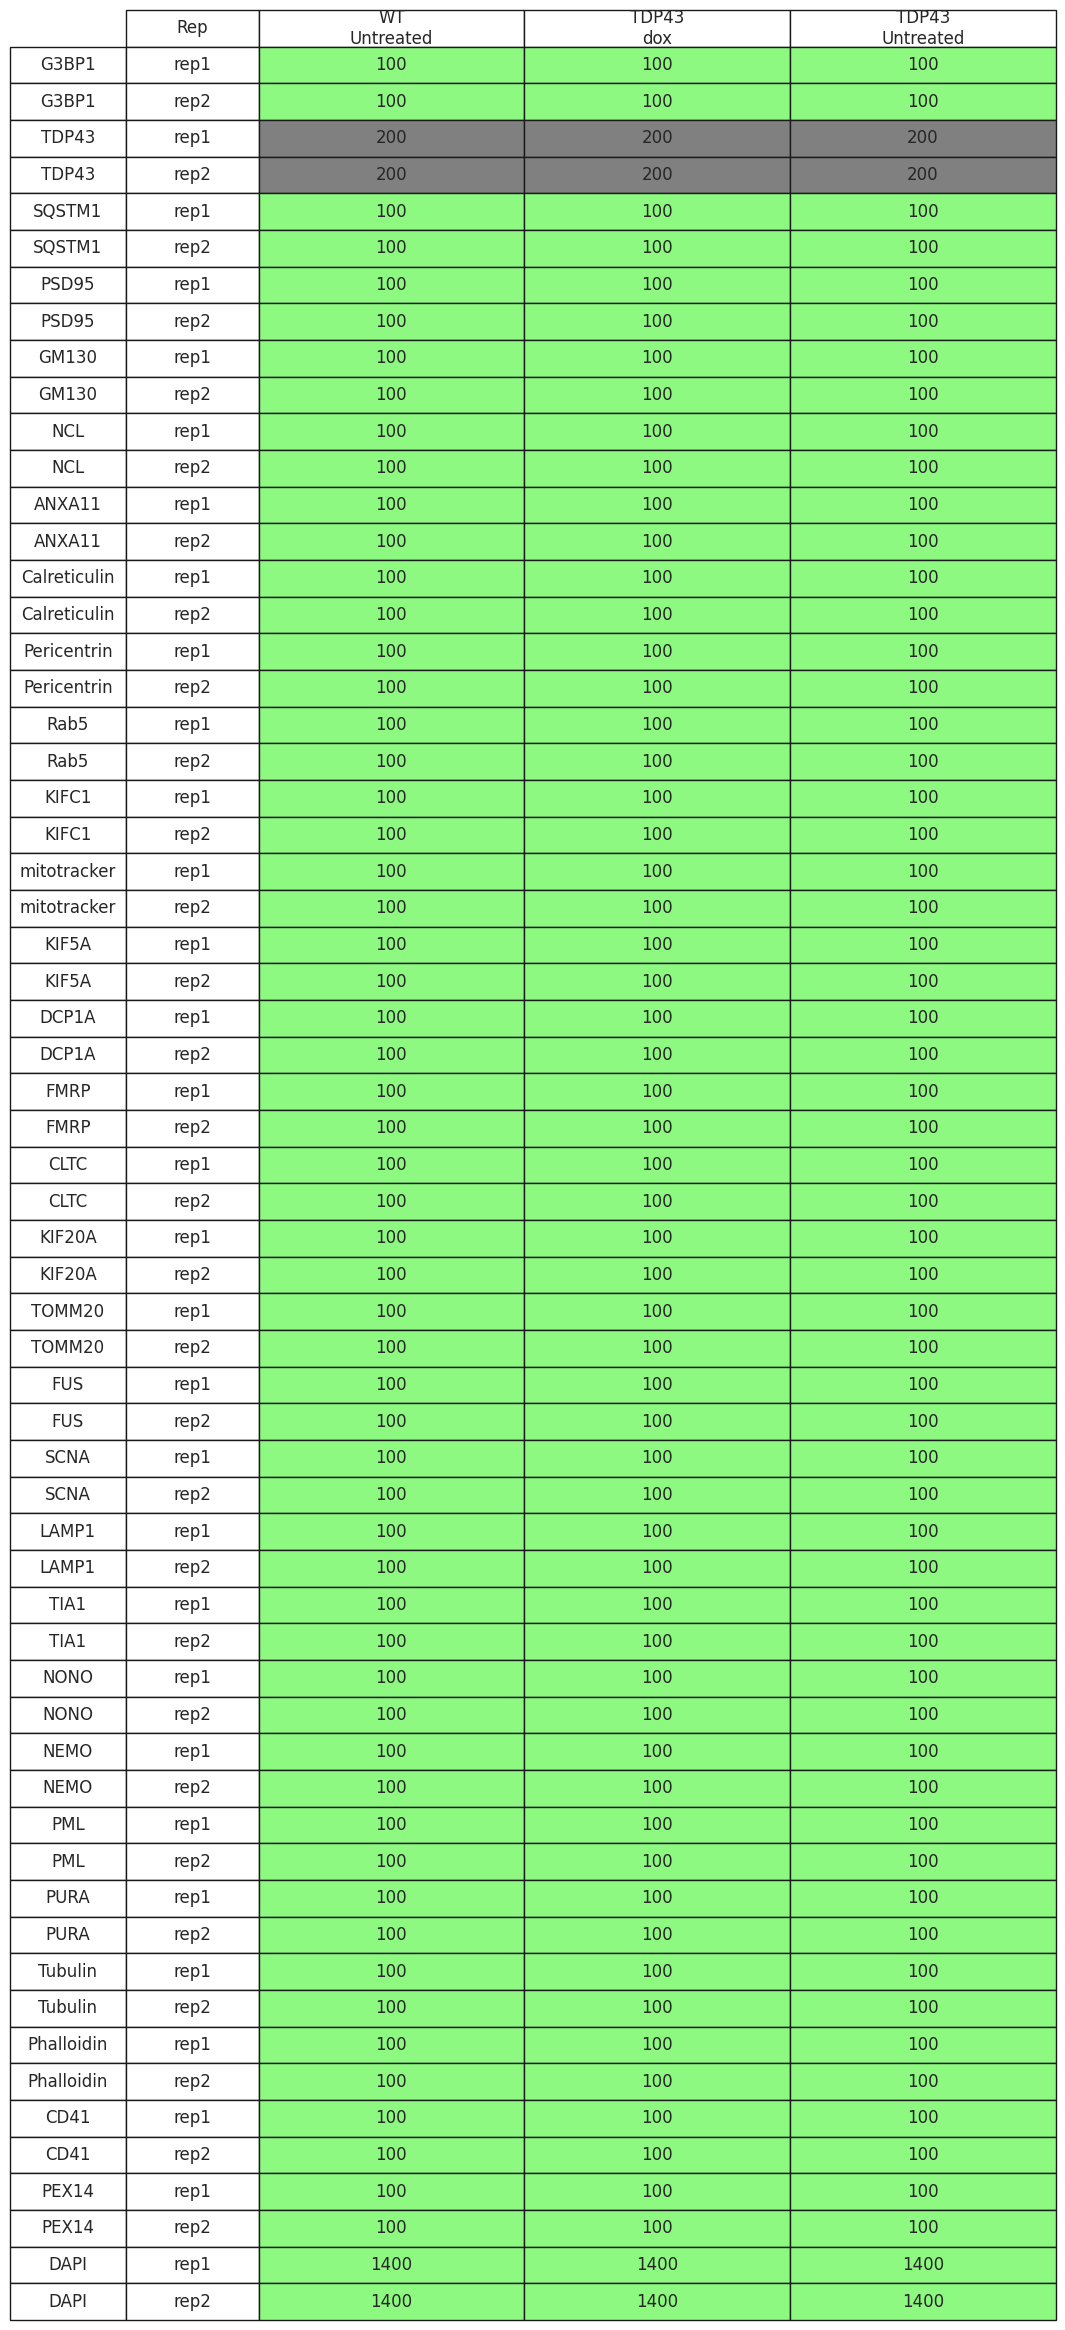

batch3
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/deltaNLS_sort/batch3/WT/panelN
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/deltaNLS_sort/batch3/TDP43/panelN
All files exists.
Total Sites:  25800


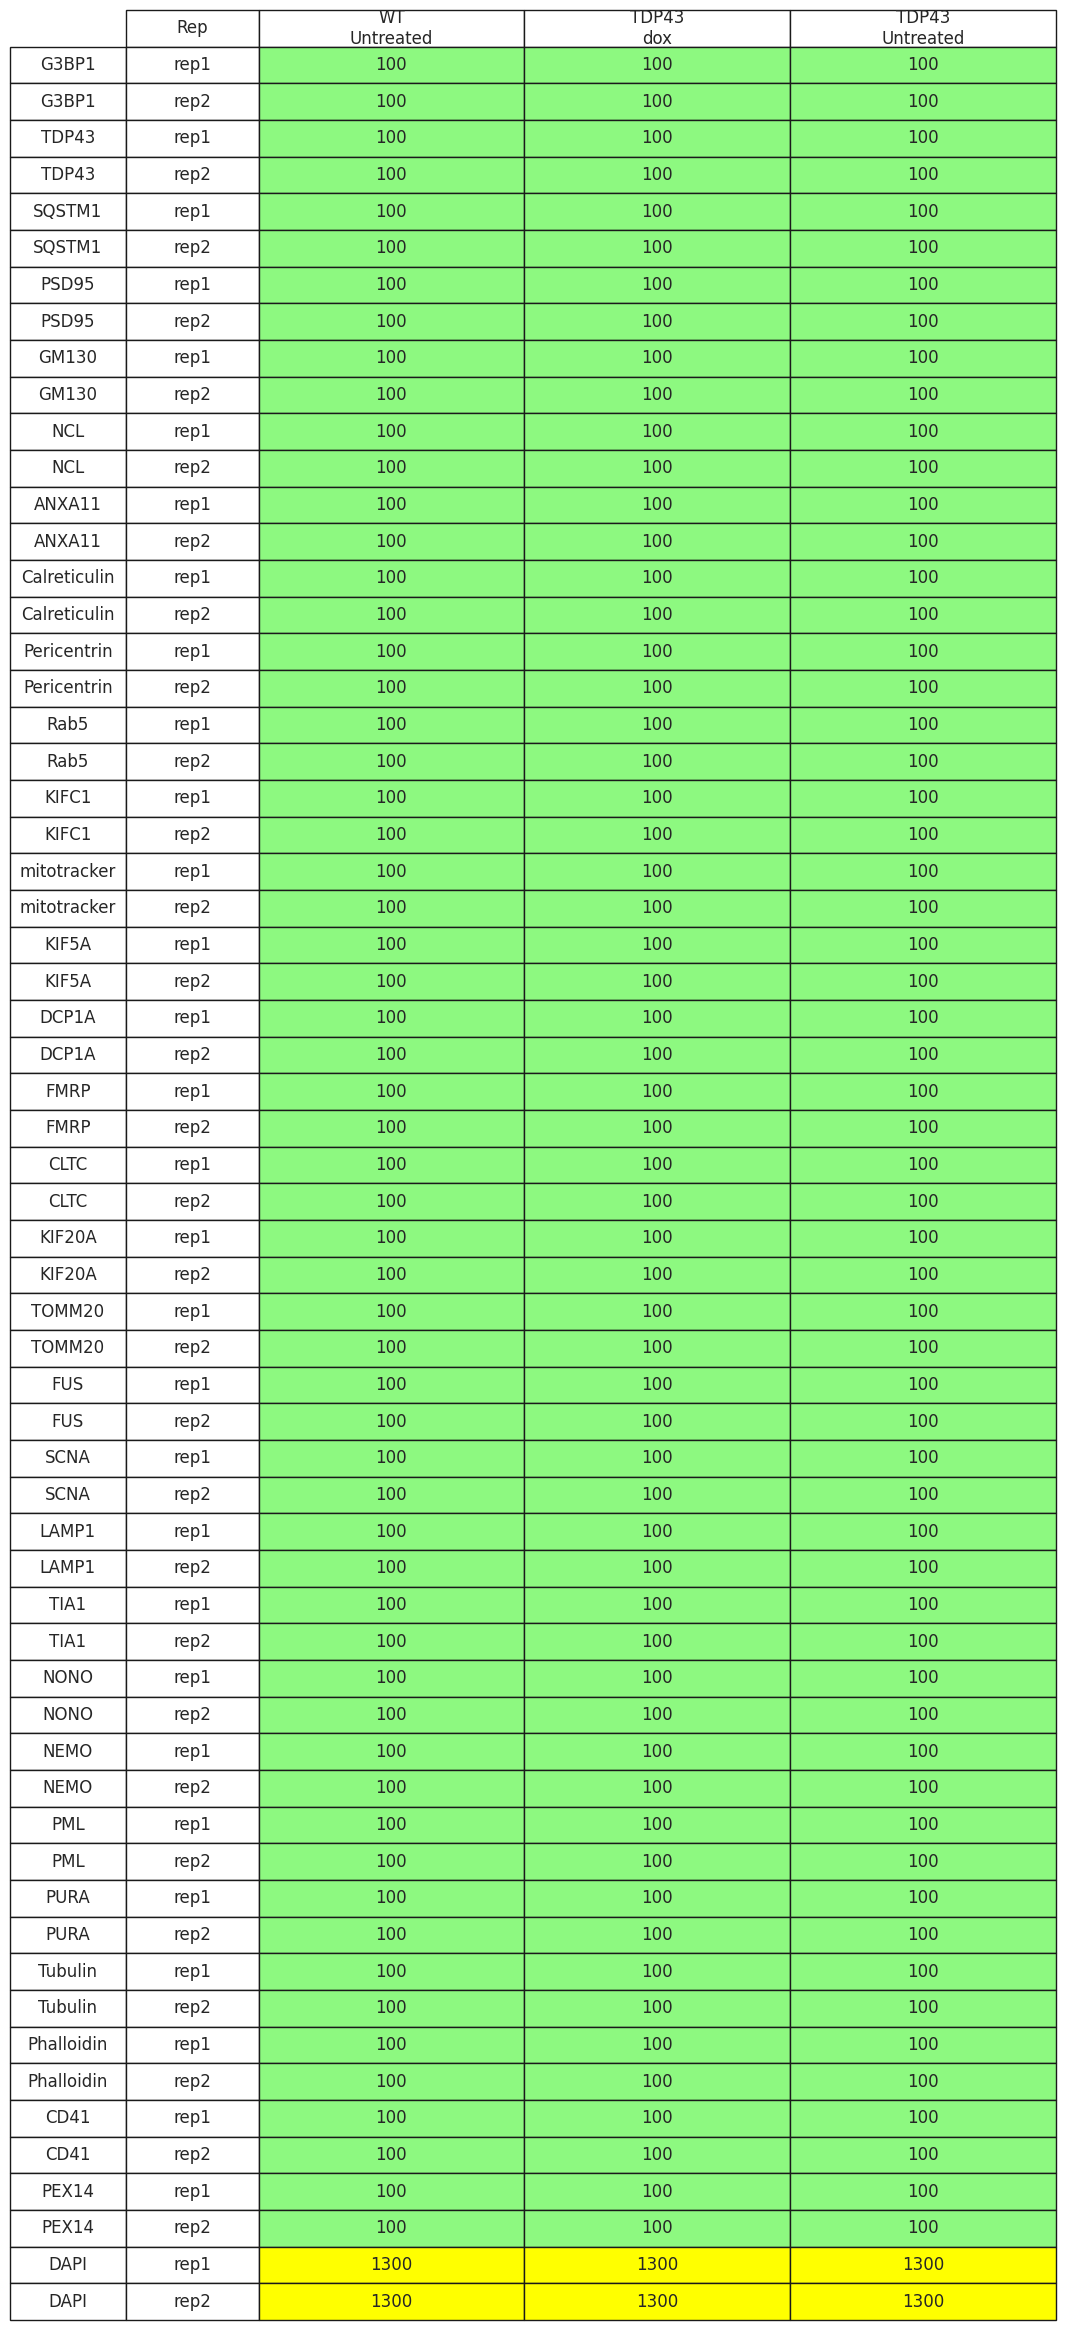

batch4
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/deltaNLS_sort/batch4/WT/panelN
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/deltaNLS_sort/batch4/TDP43/panelN
All files exists.
Total Sites:  25500


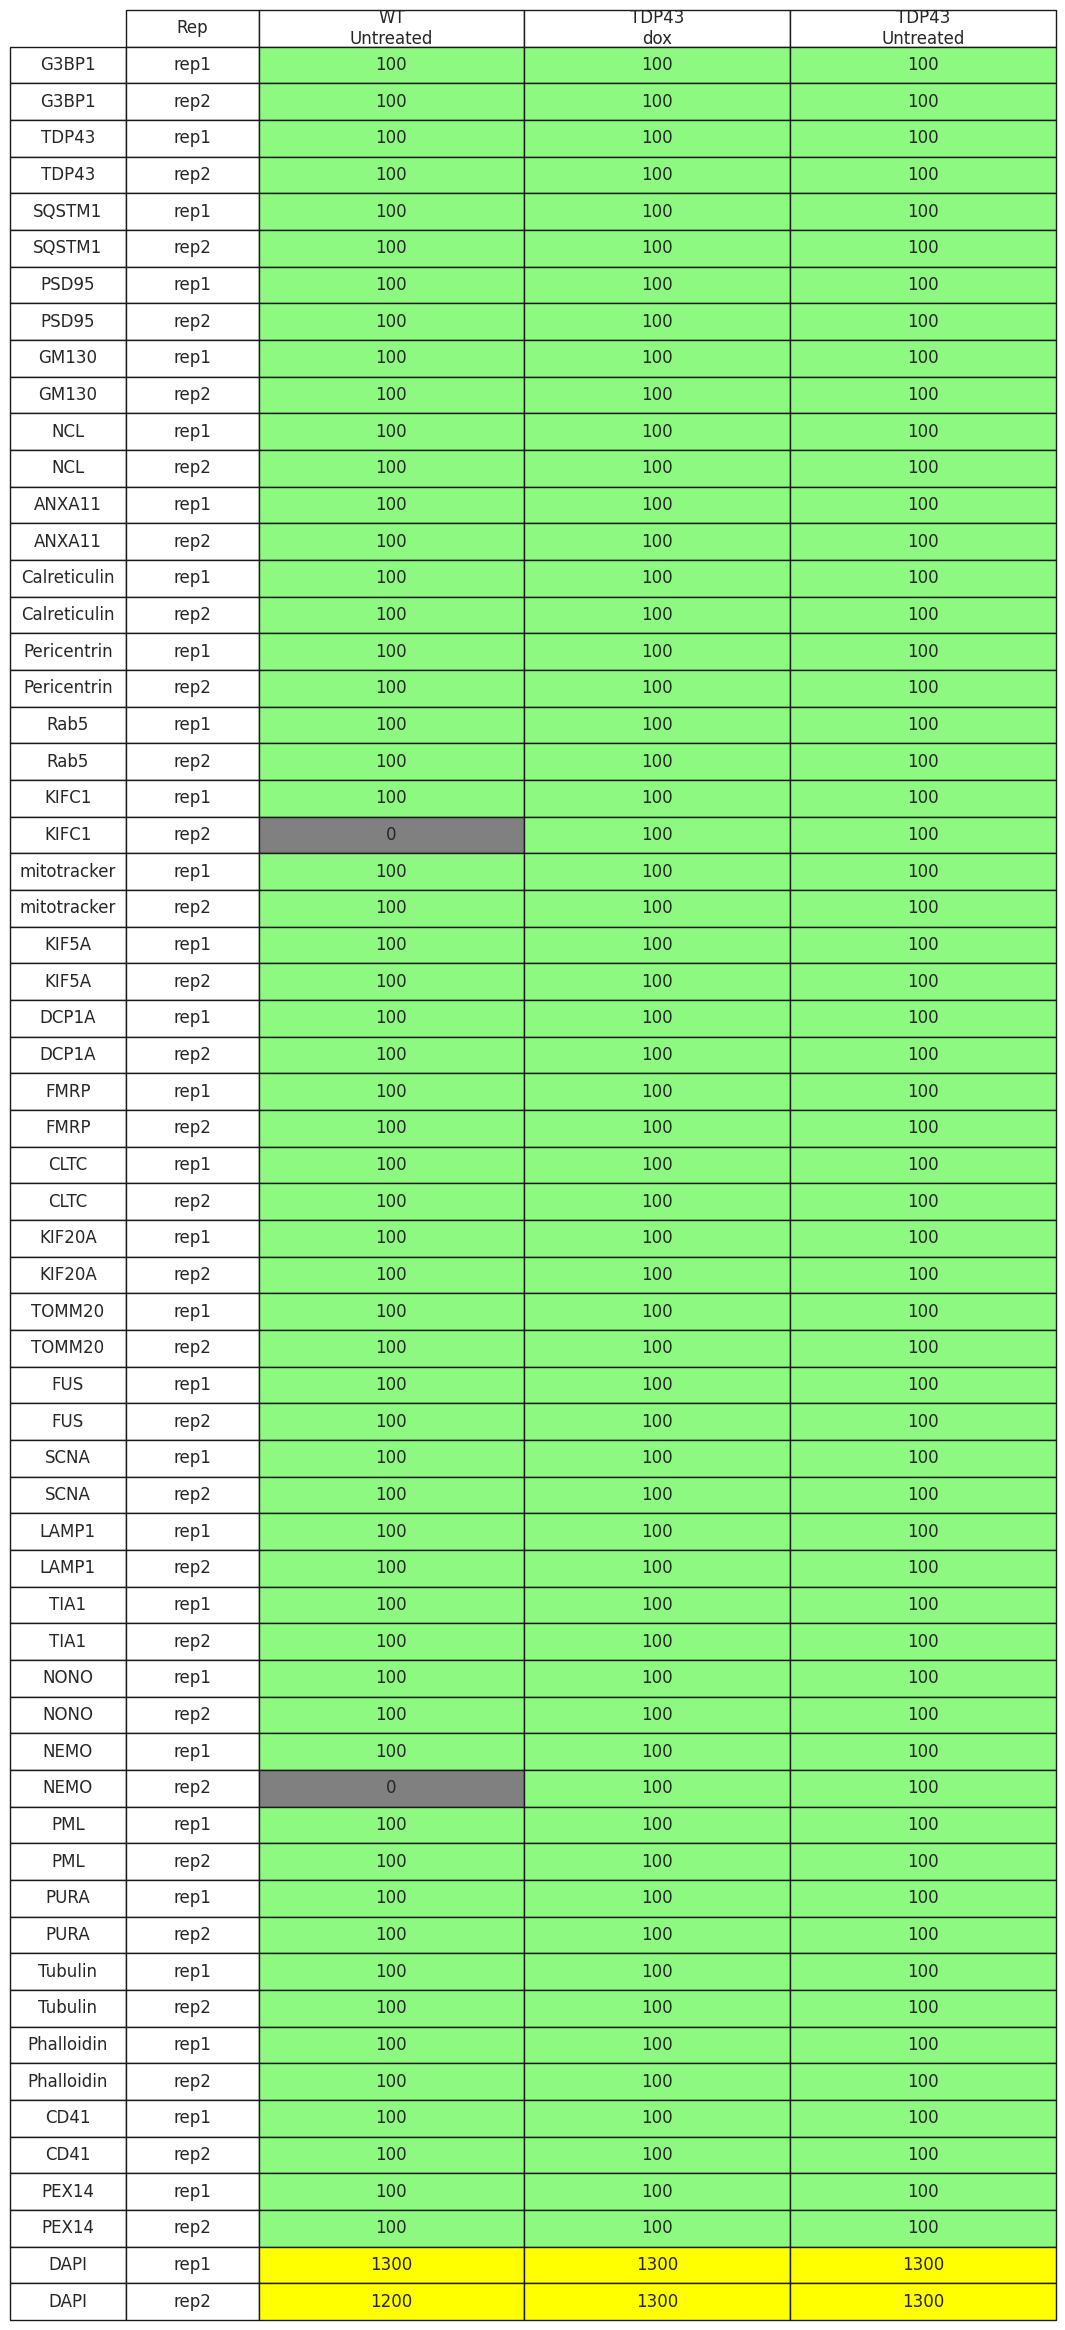

batch5
Folder structure is valid.
All files exists.
Total Sites:  26897


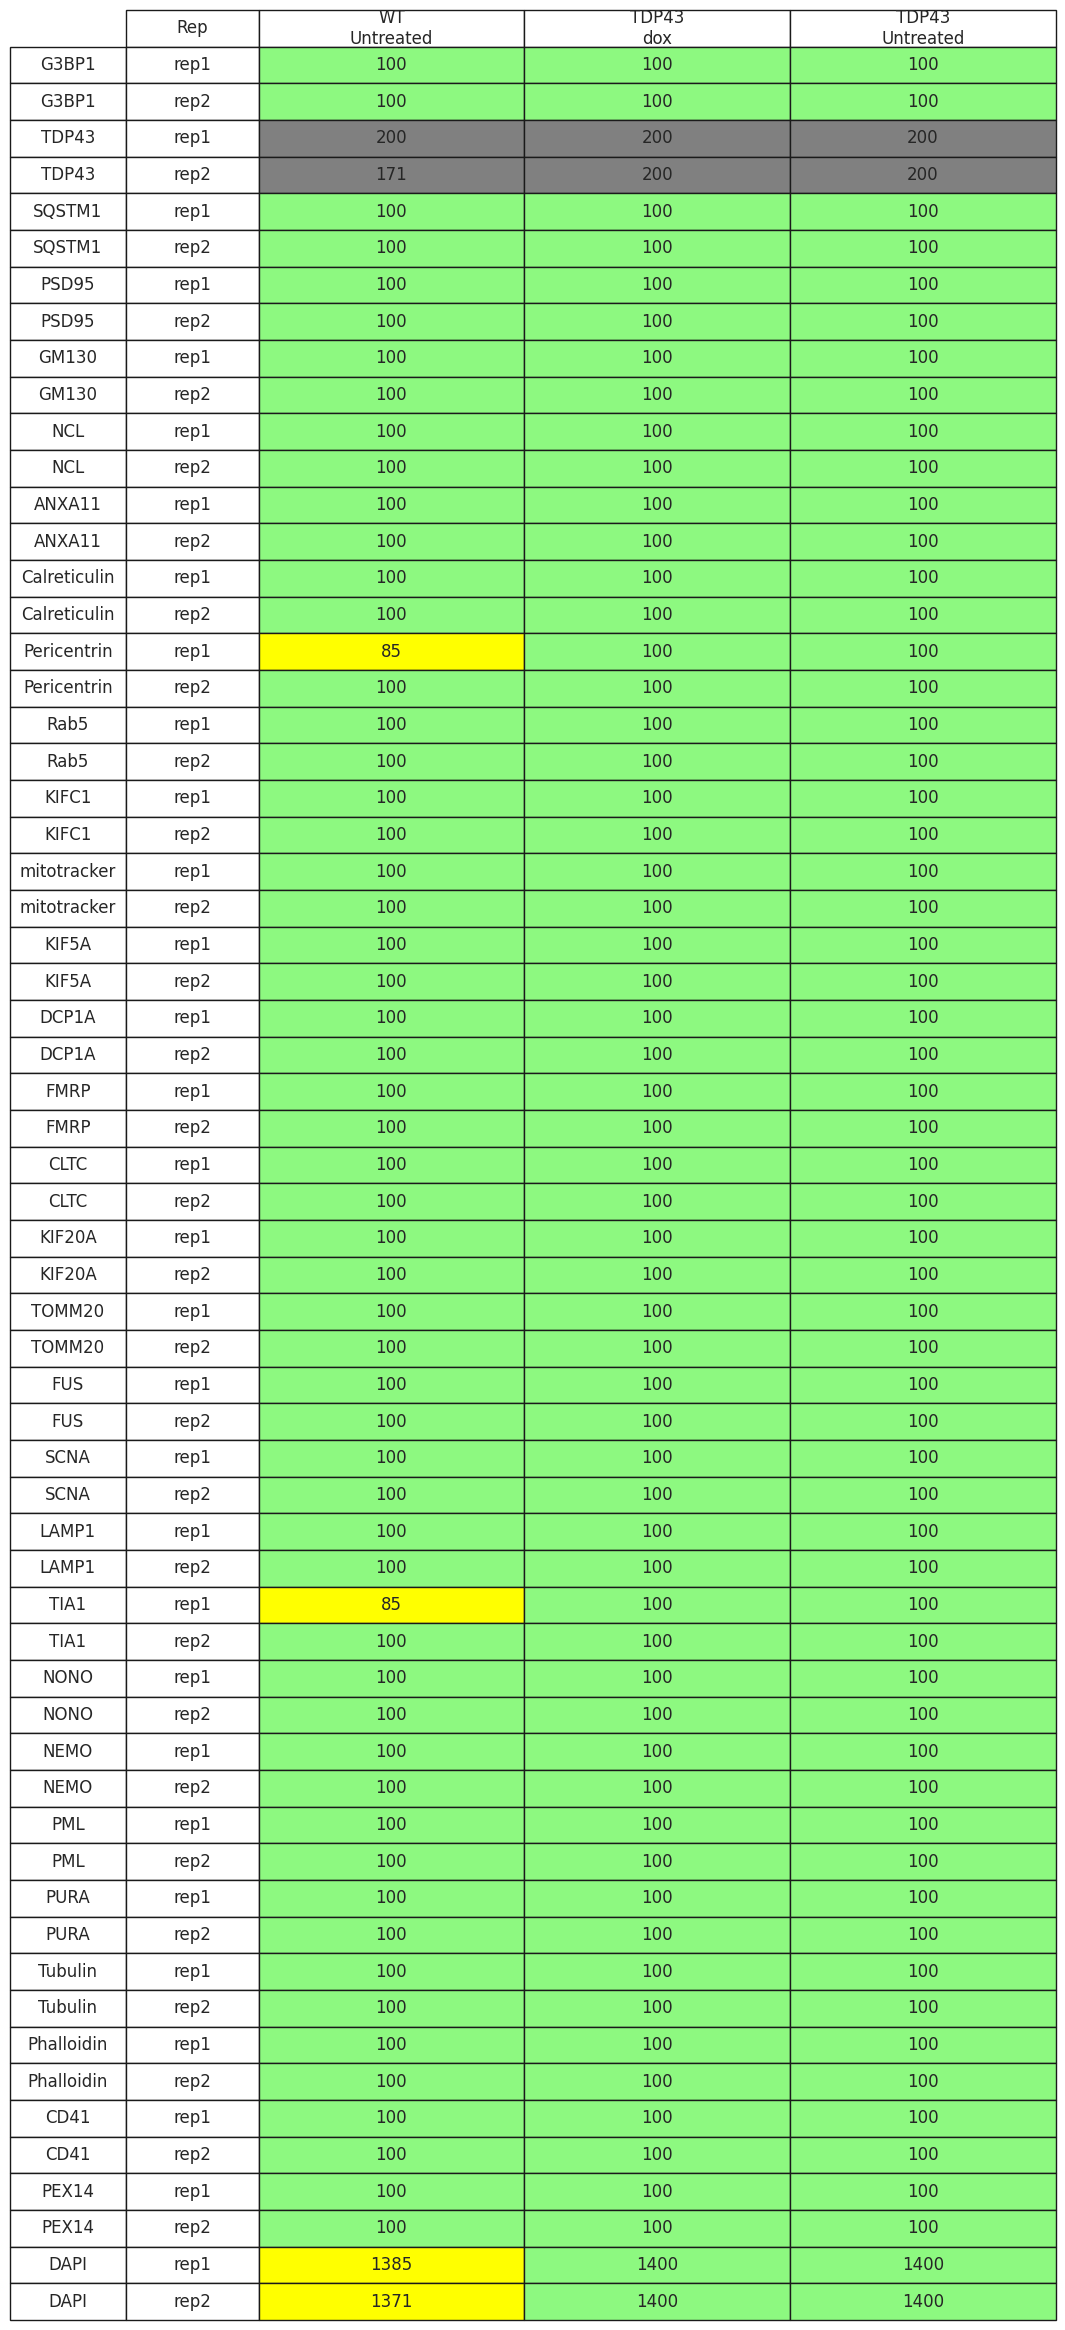

In [6]:

root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw',
                                  'SpinningDisk','deltaNLS_sort')

batches_raw = [batch.replace("_16bit_no_downsample","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, dnls_panels, dnls_markers,PLOT_PATH,
                                     dnls_marker_info,dnls_cell_lines_to_cond, reps, dnls_cell_lines_for_disp,
                                     dnls_expected_dapi_raw, batches=batches_raw,fig_width=4, fig_height=10)

### Processed

batch2
Folder structure is valid.
All files exists.
Total Sites:  26395


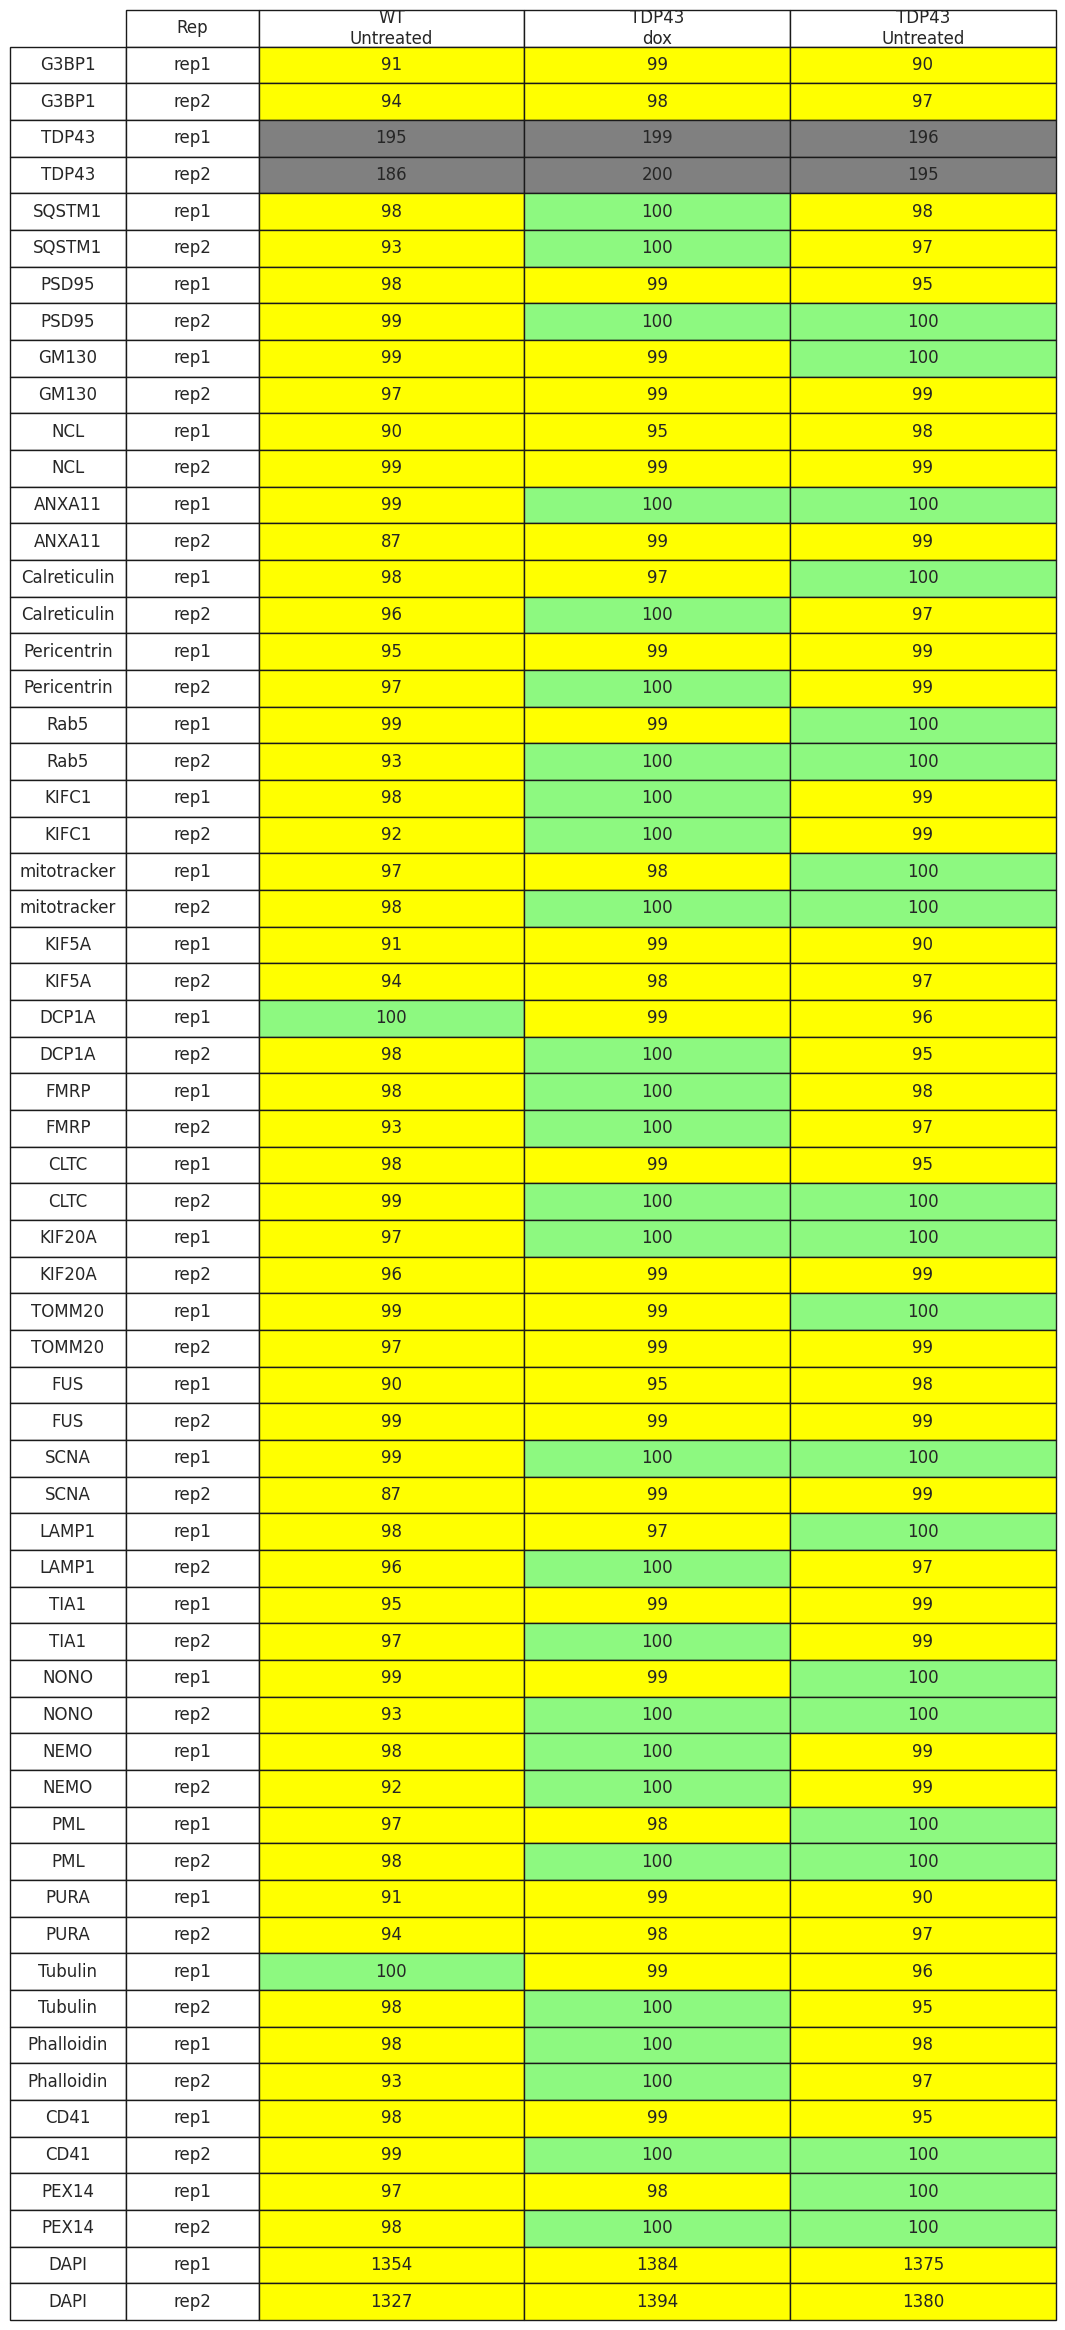

batch3
Folder structure is valid.
All files exists.
Total Sites:  25260


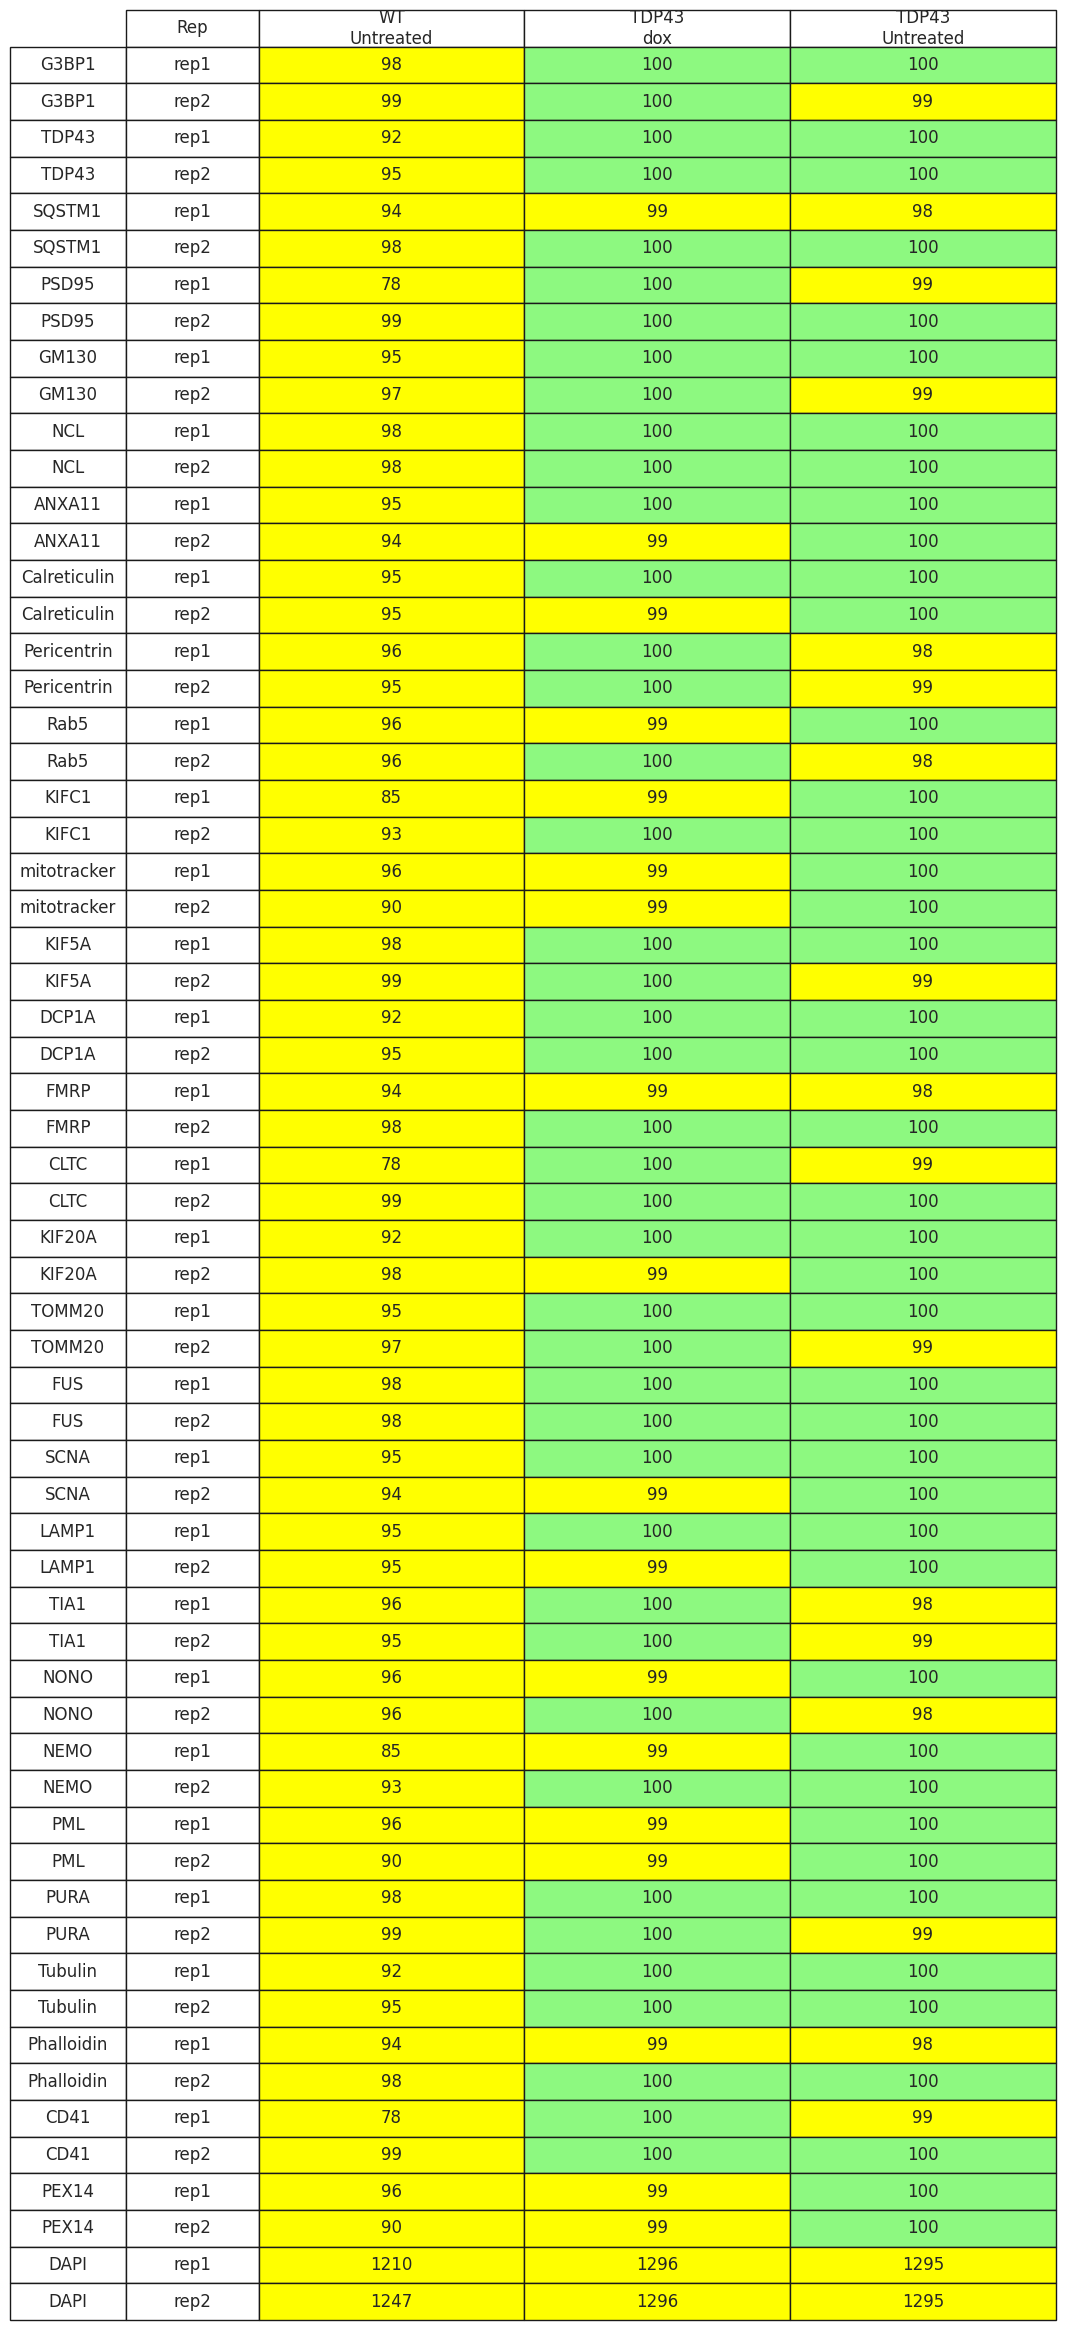

batch4
Folder structure is valid.
All files exists.
Total Sites:  24827


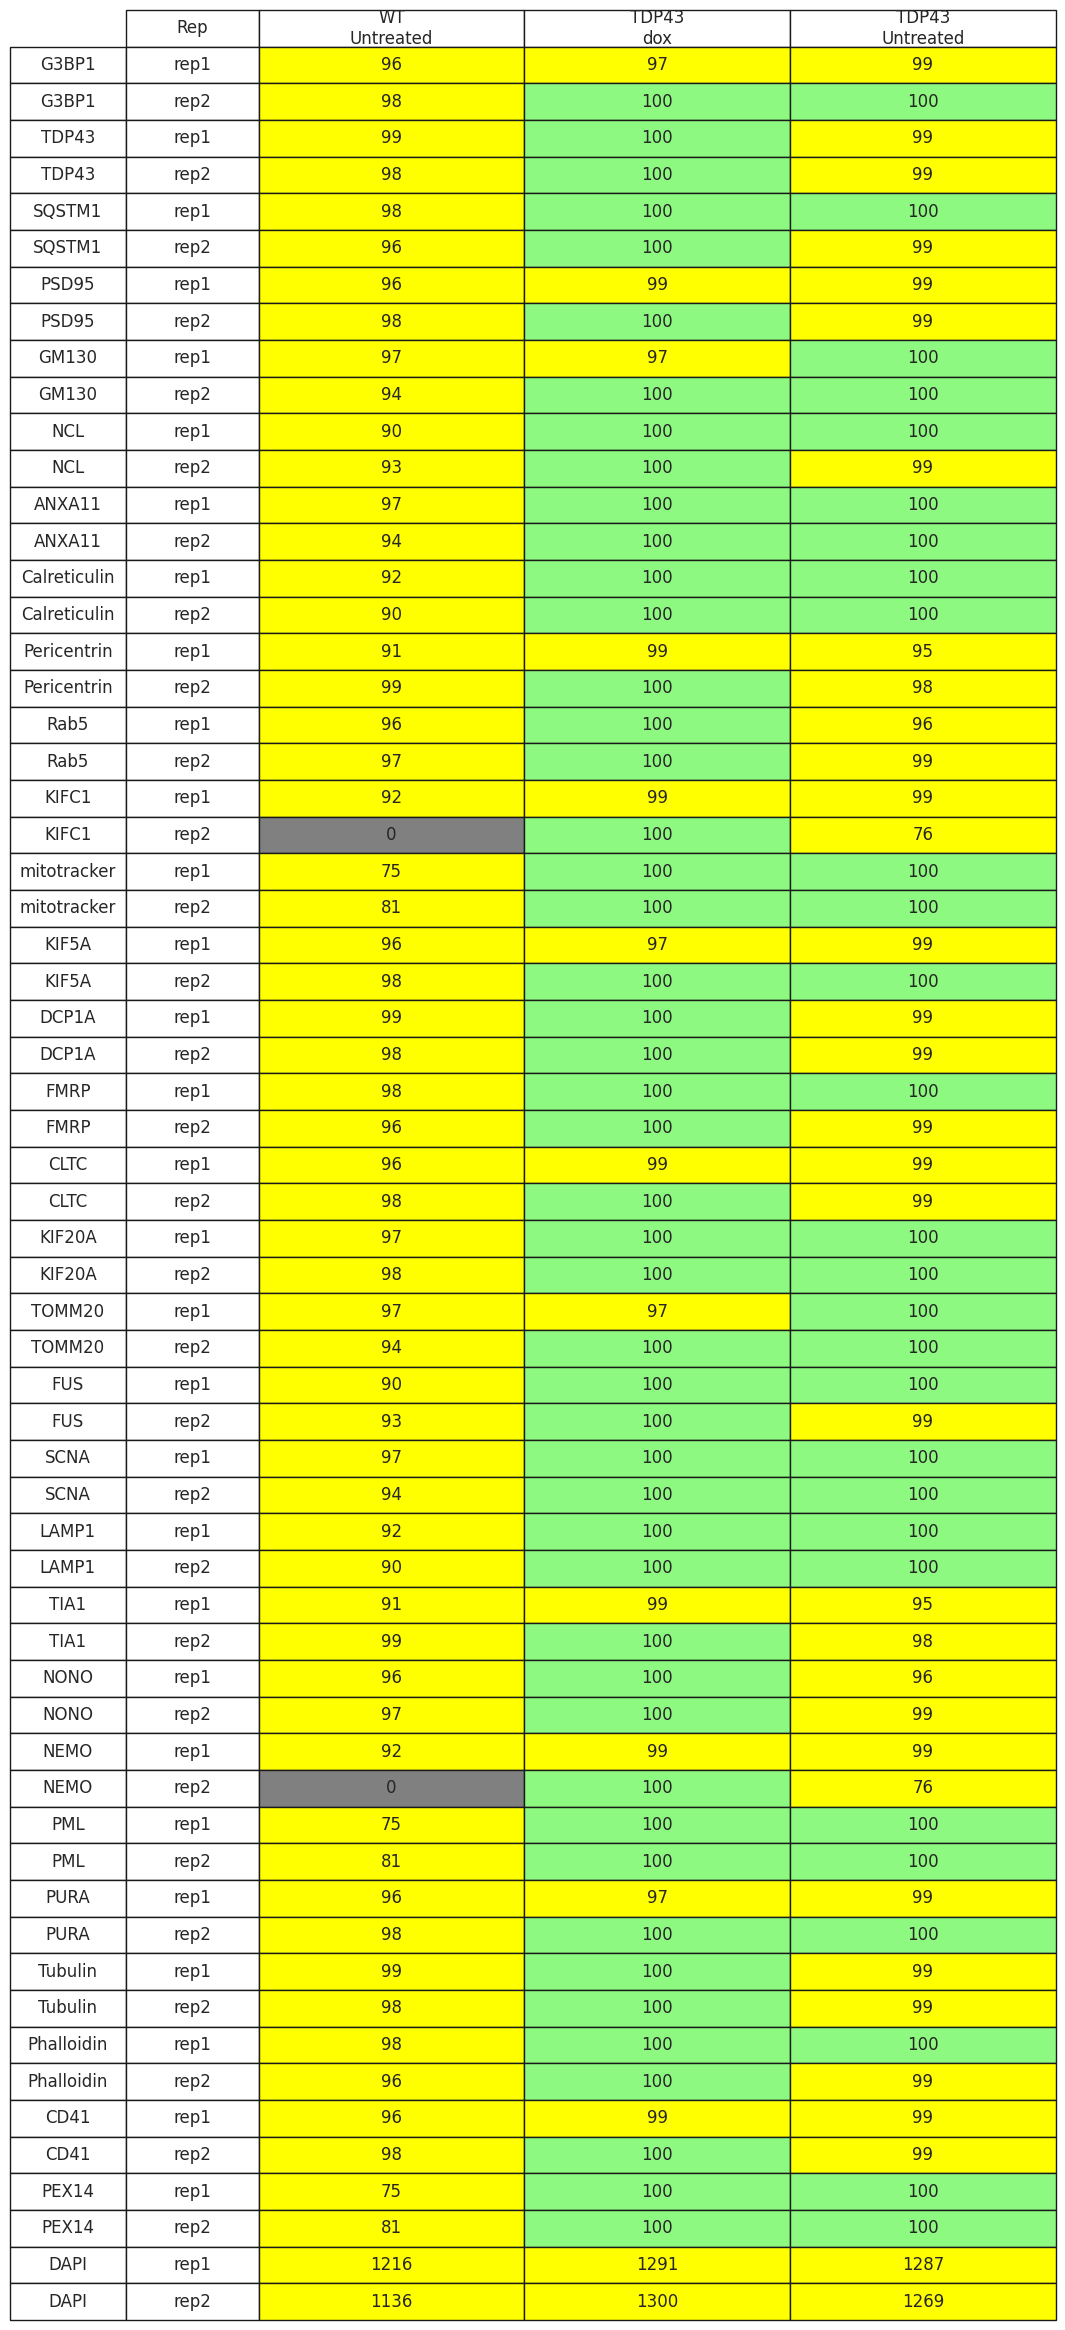

batch5
Folder structure is valid.
All files exists.
Total Sites:  26335


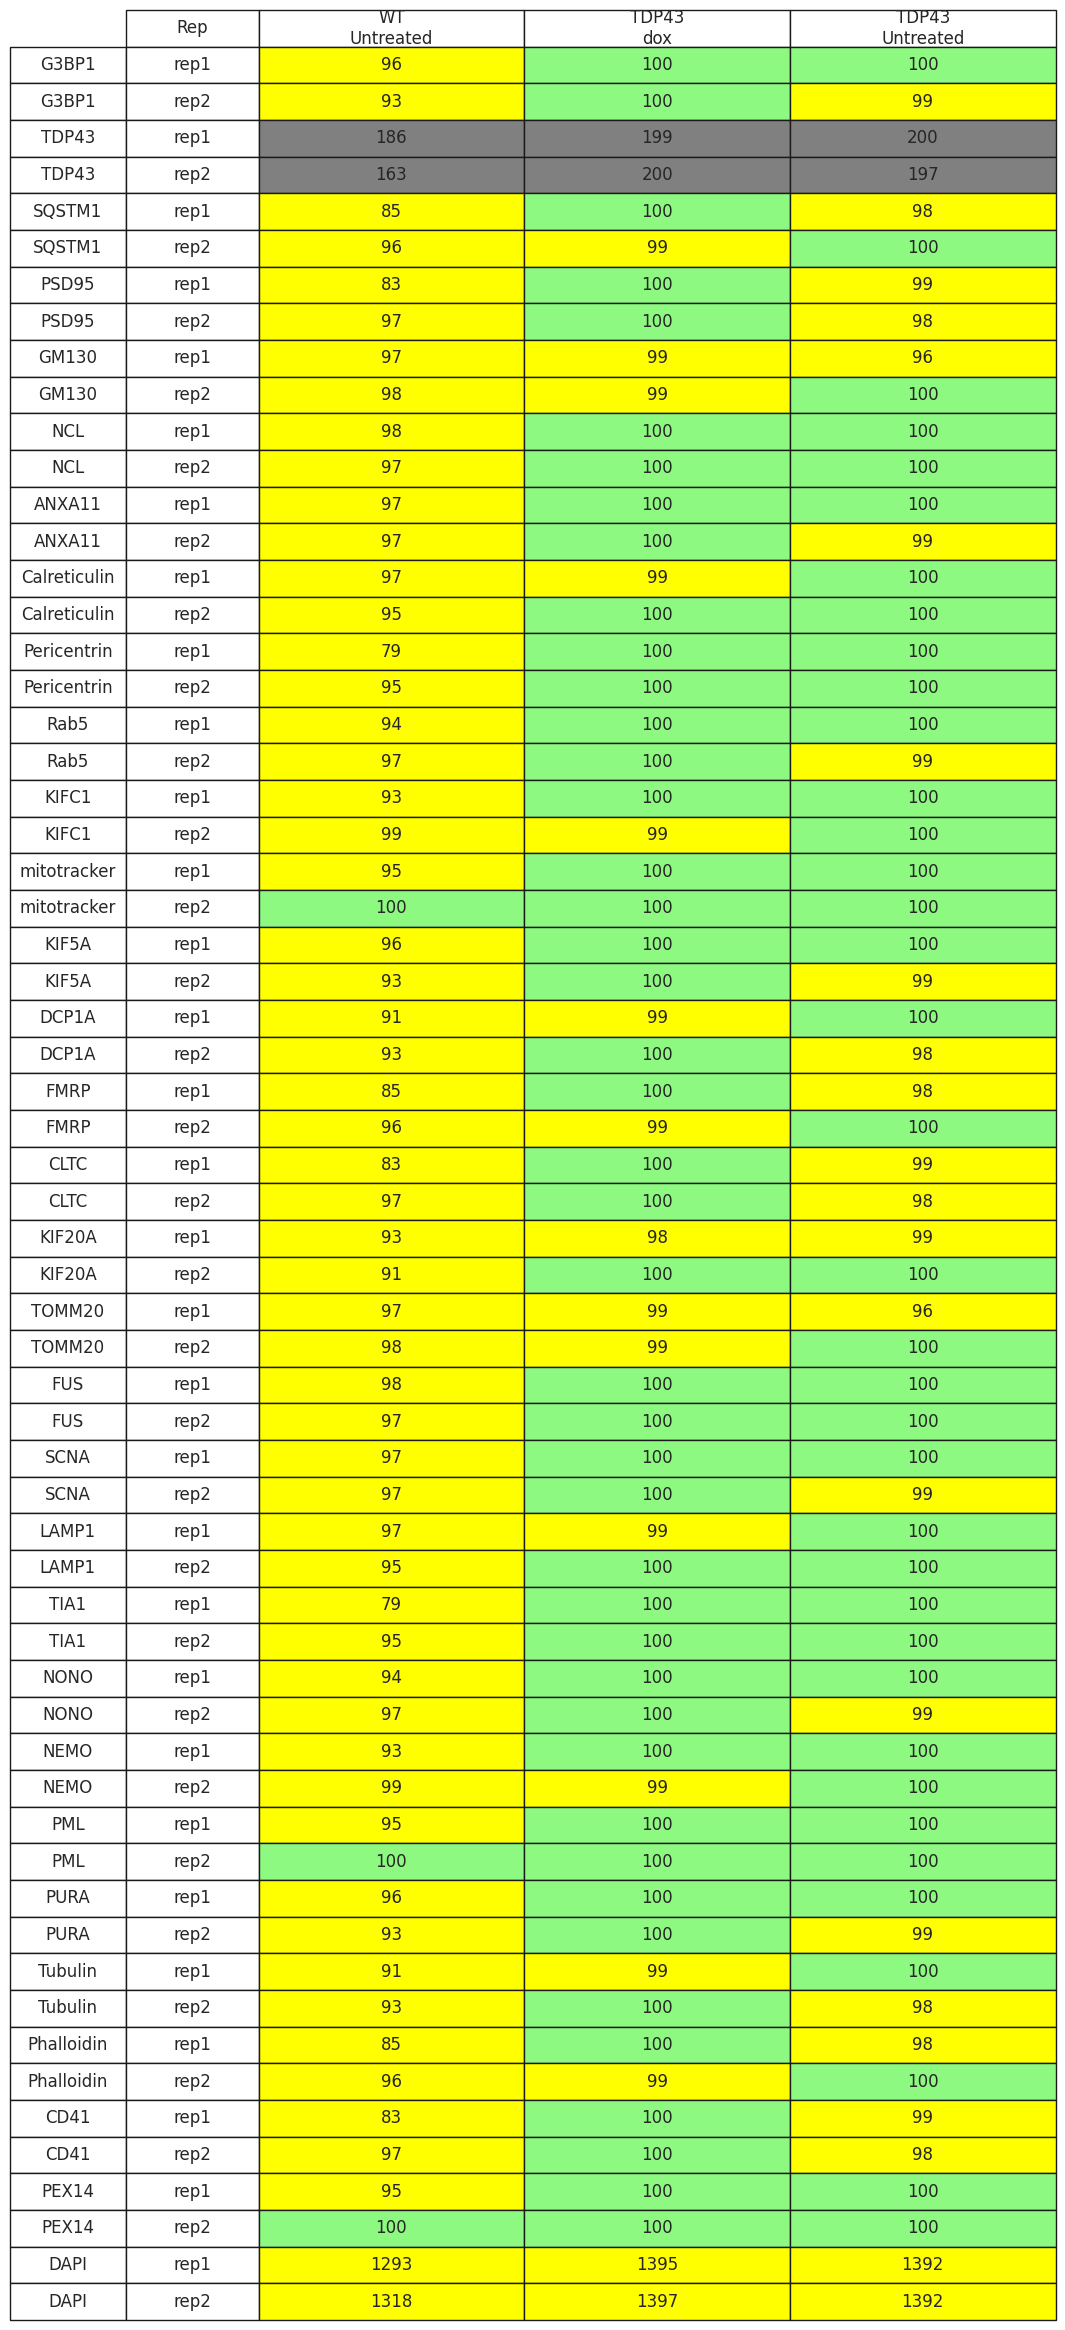

In [7]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk','deltaNLS')
procs = run_validate_folder_structure(root_directory_proc, True, dnls_panels, dnls_markers,PLOT_PATH,
                                     dnls_marker_info,dnls_cell_lines_to_cond, reps, dnls_cell_lines_for_disp,
                                     dnls_expected_dapi_raw, batches=batches_raw, fig_width=4, fig_height=10)

### Difference between Raw and Processed

batch2_16bit_no_downsample


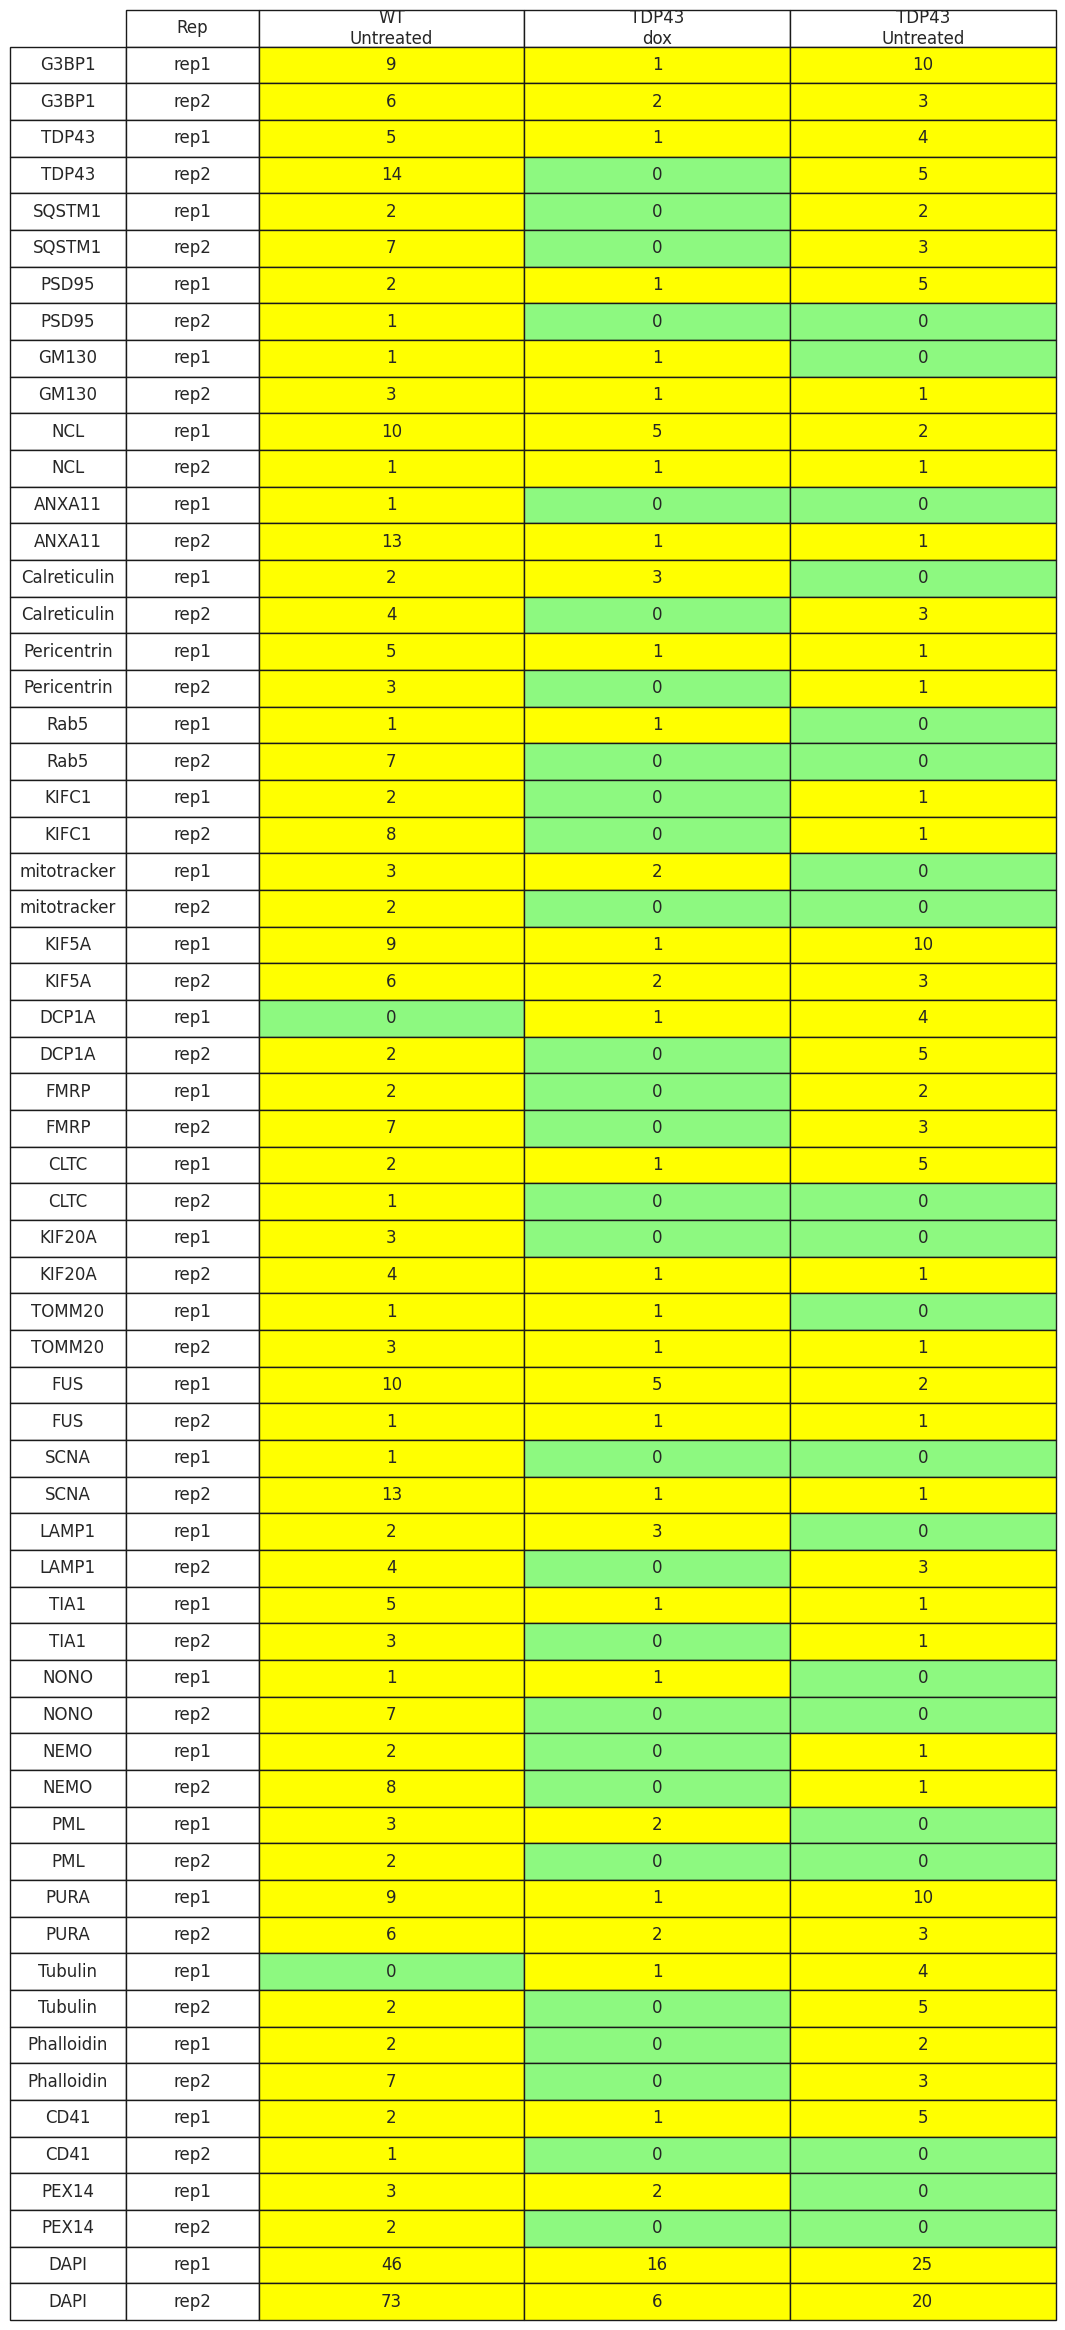

batch3_16bit_no_downsample


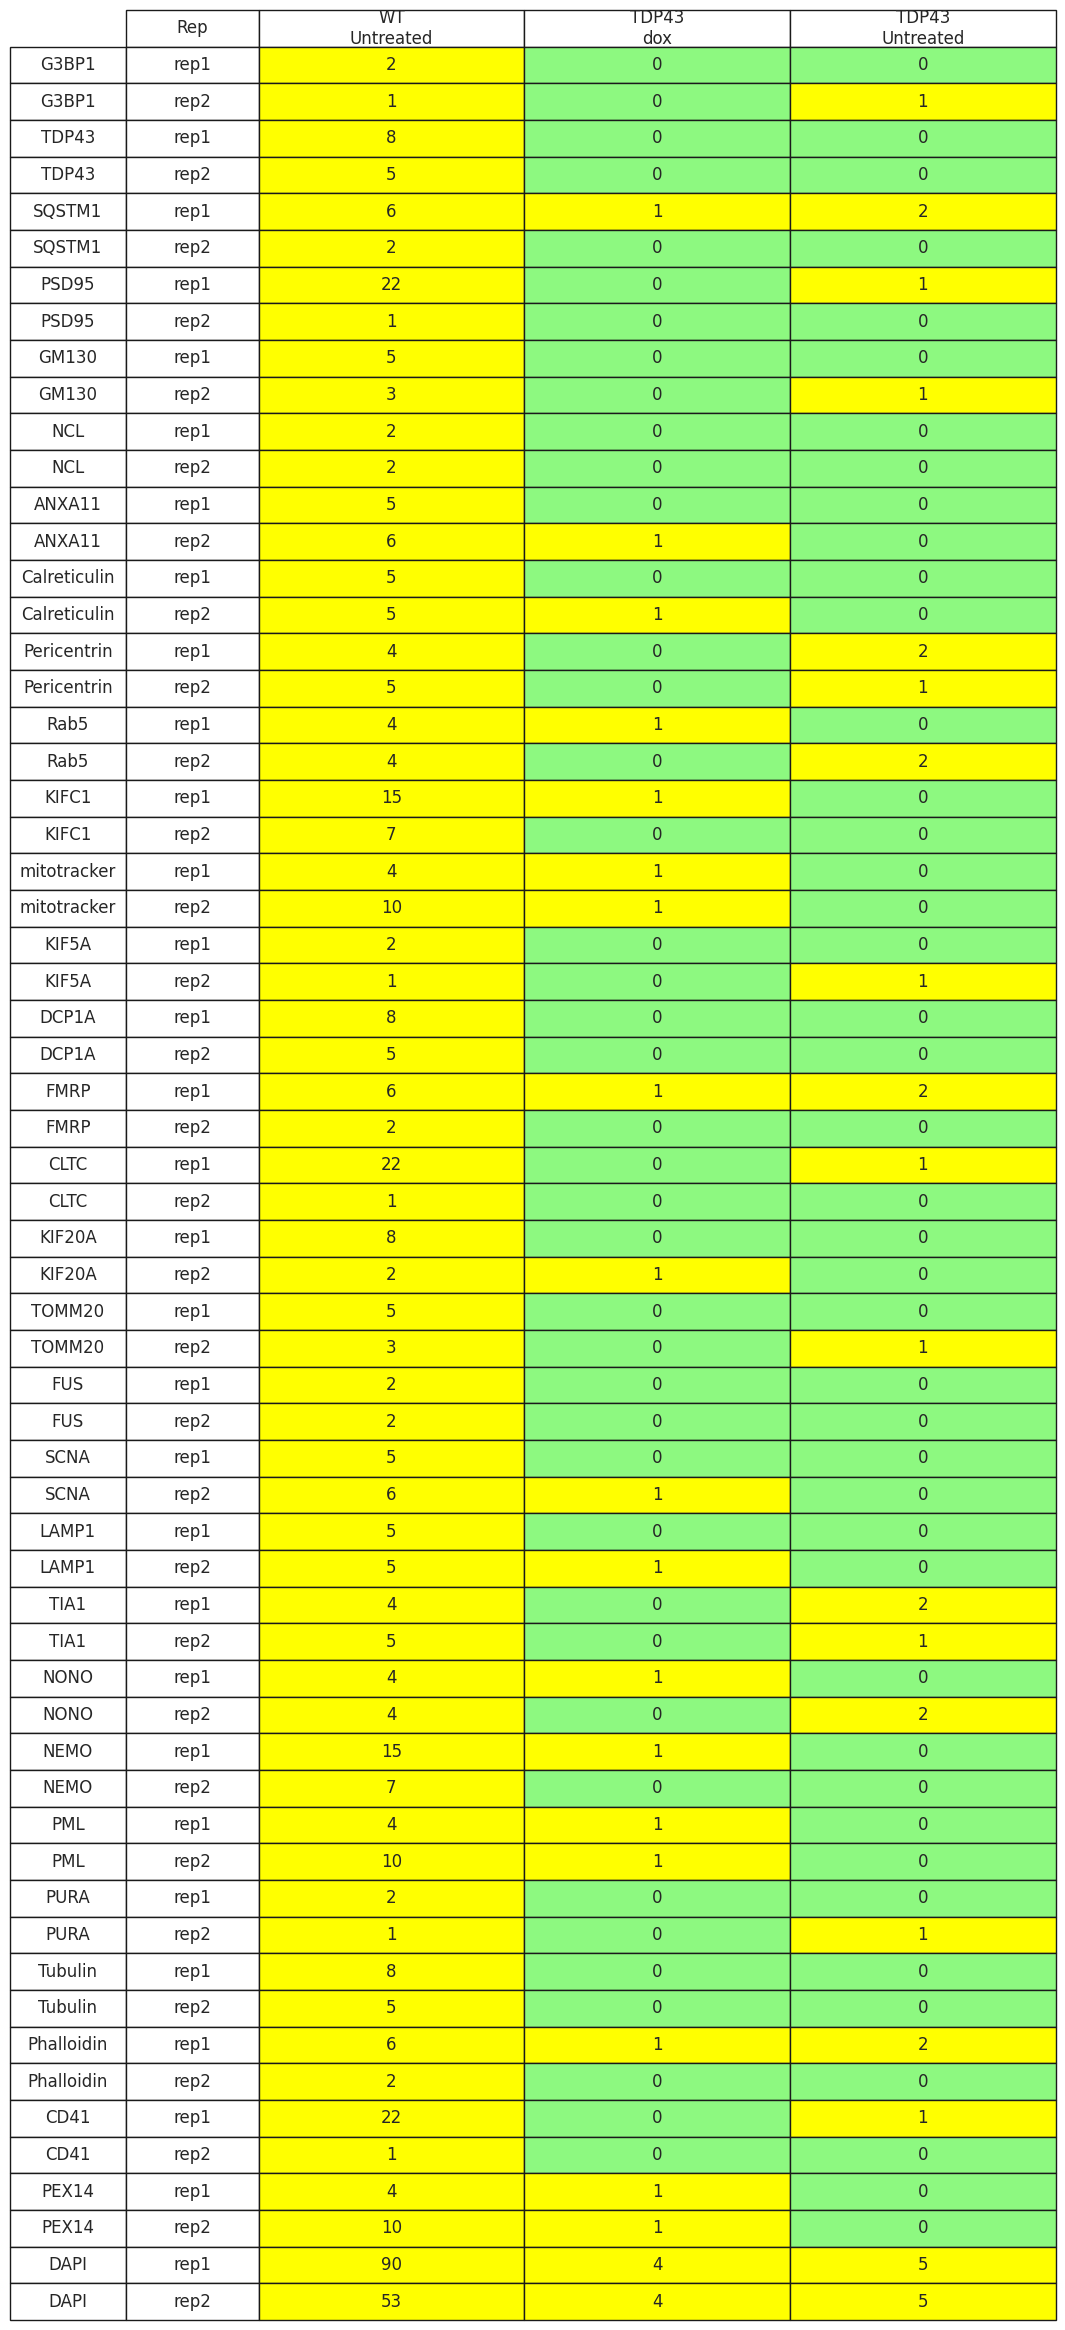

batch4_16bit_no_downsample


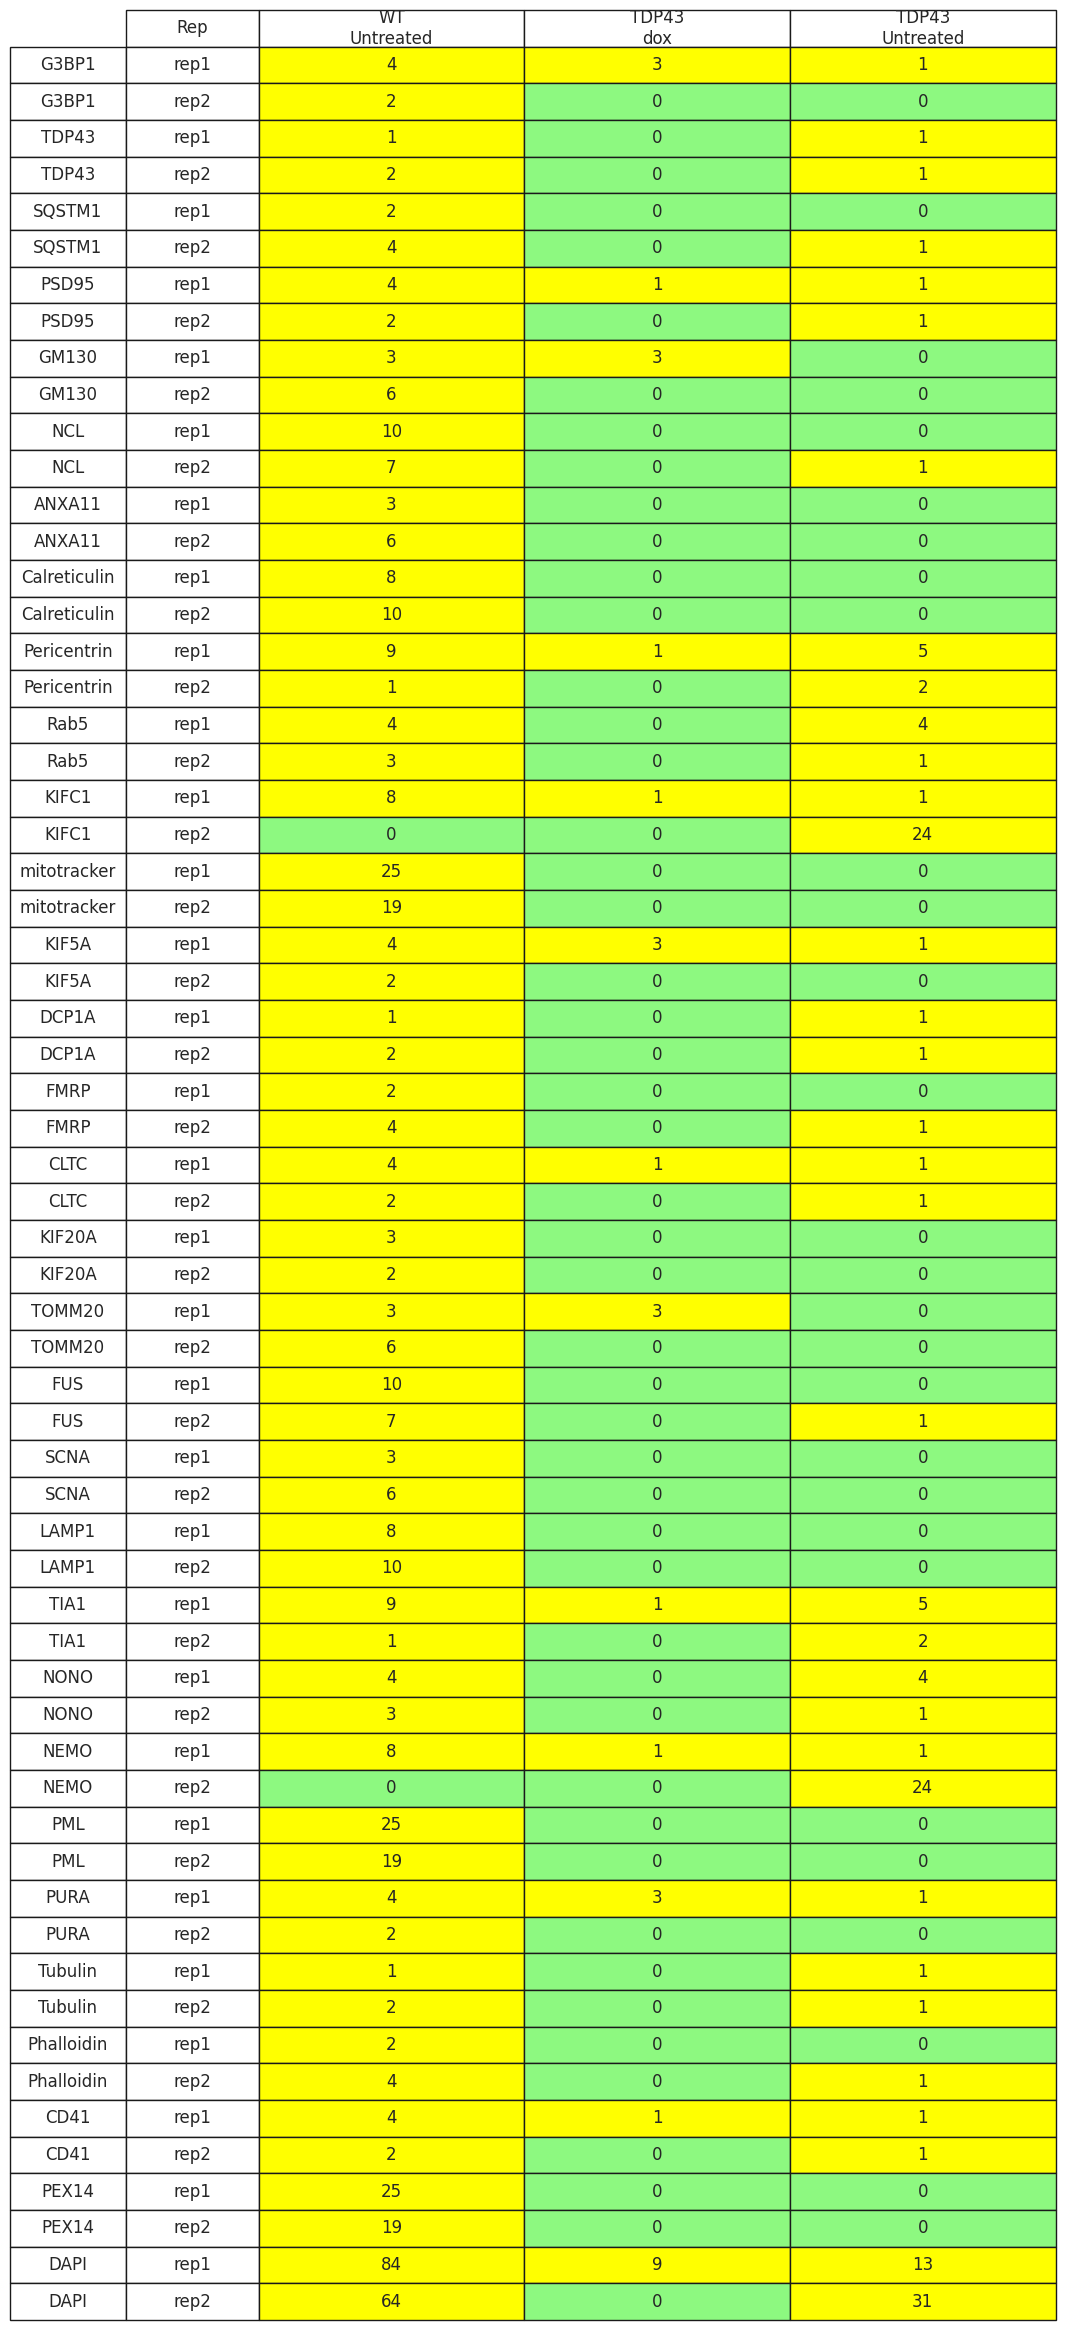

batch5_16bit_no_downsample


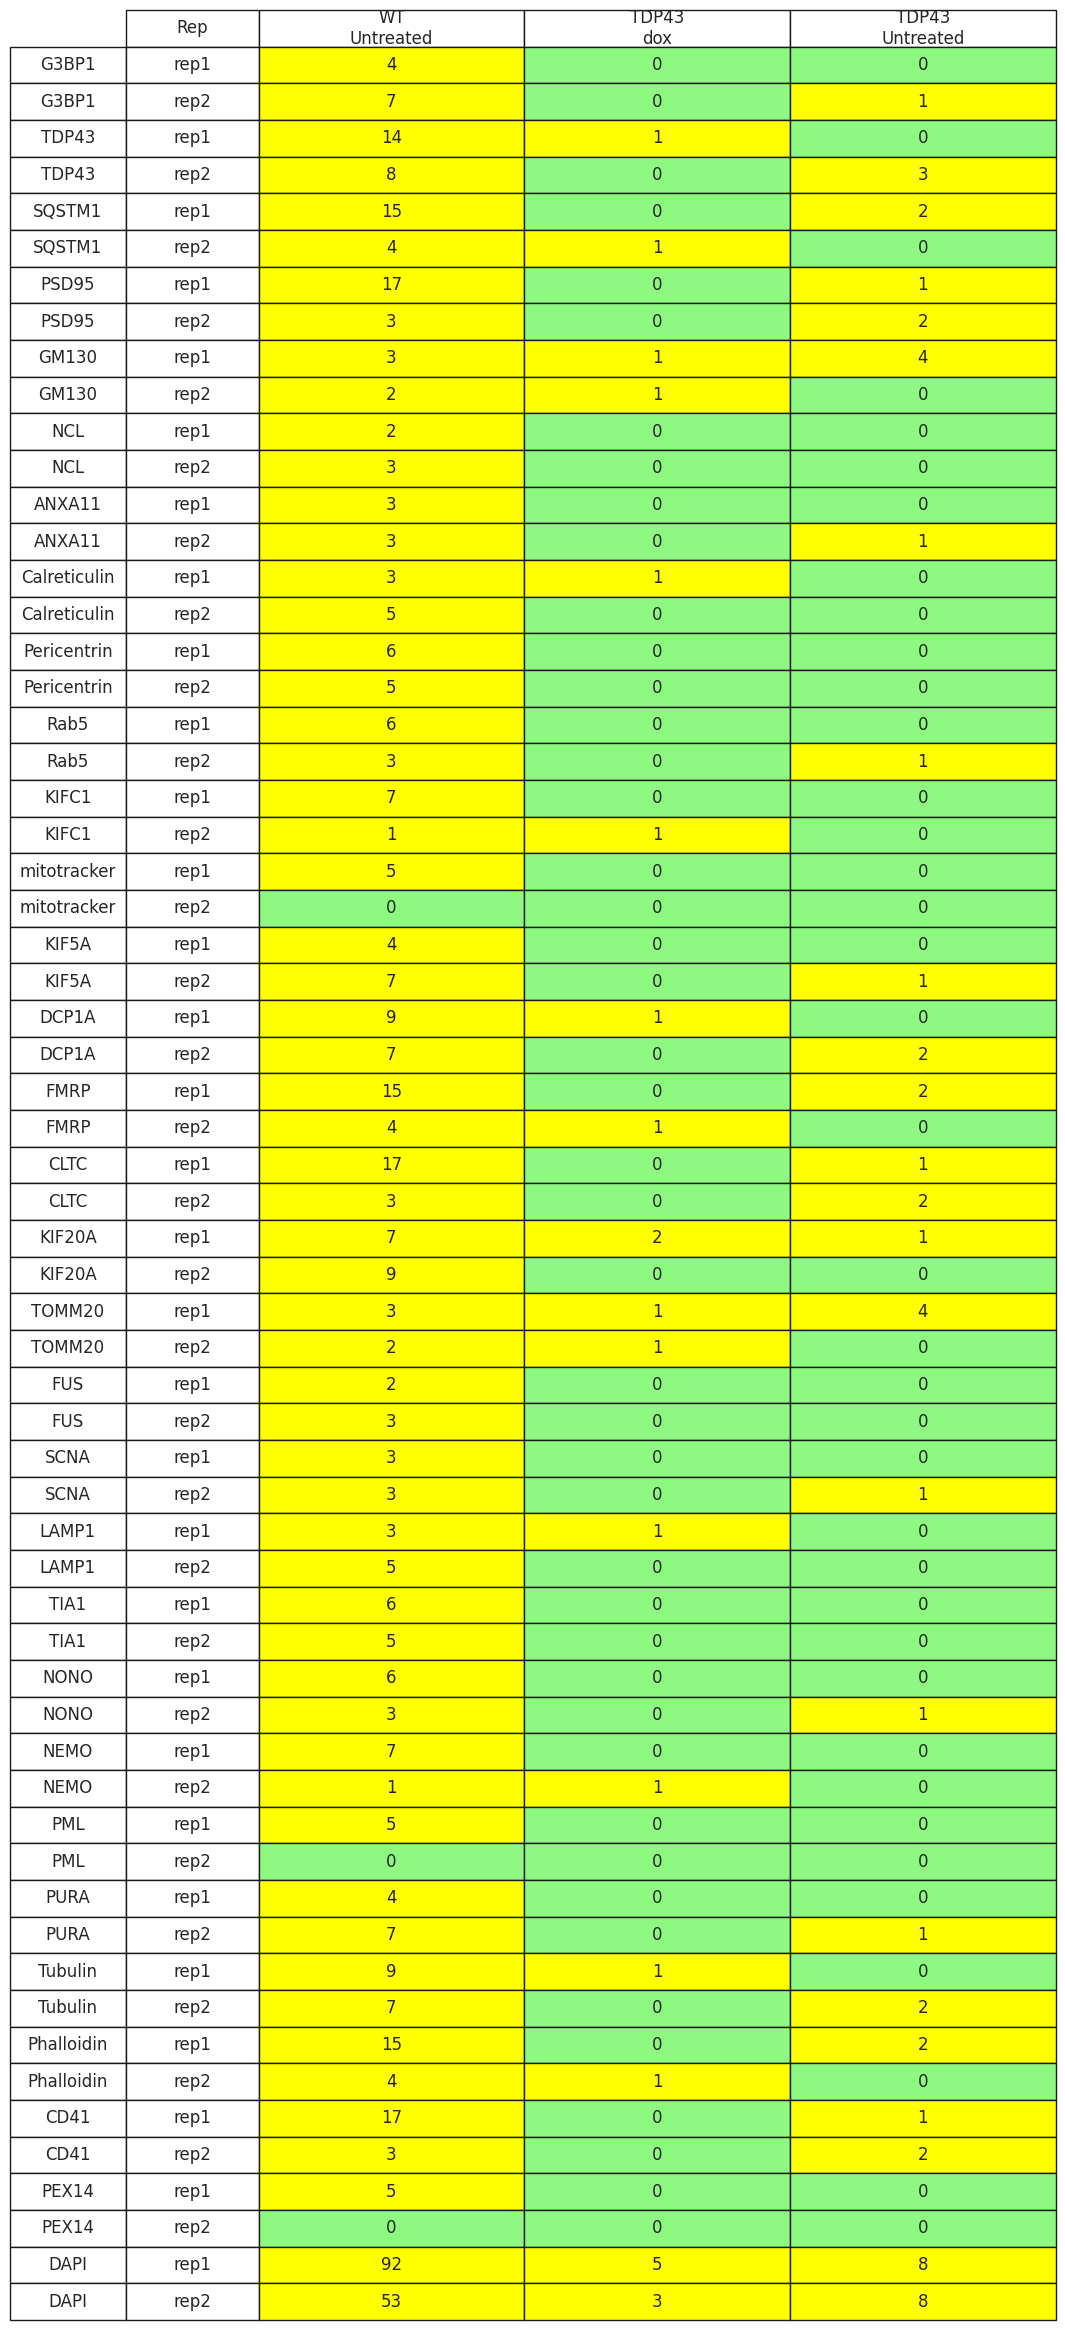

In [10]:
display_diff(batches, raws, procs, PLOT_PATH, 10,4)

In [9]:
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200,
                                       cond_count=2, rep_count=len(reps), 
                                       num_markers=len(dnls_markers))
    print(f'{batch} var: ',var)
    

batch2_16bit_no_downsample var:  0.011599039954410665
batch3_16bit_no_downsample var:  0.010905448435581845
batch4_16bit_no_downsample var:  0.010762633724642413
batch5_16bit_no_downsample var:  0.010552641940747669



# <font color='red'>Number of sites in each batch and cell line </font>


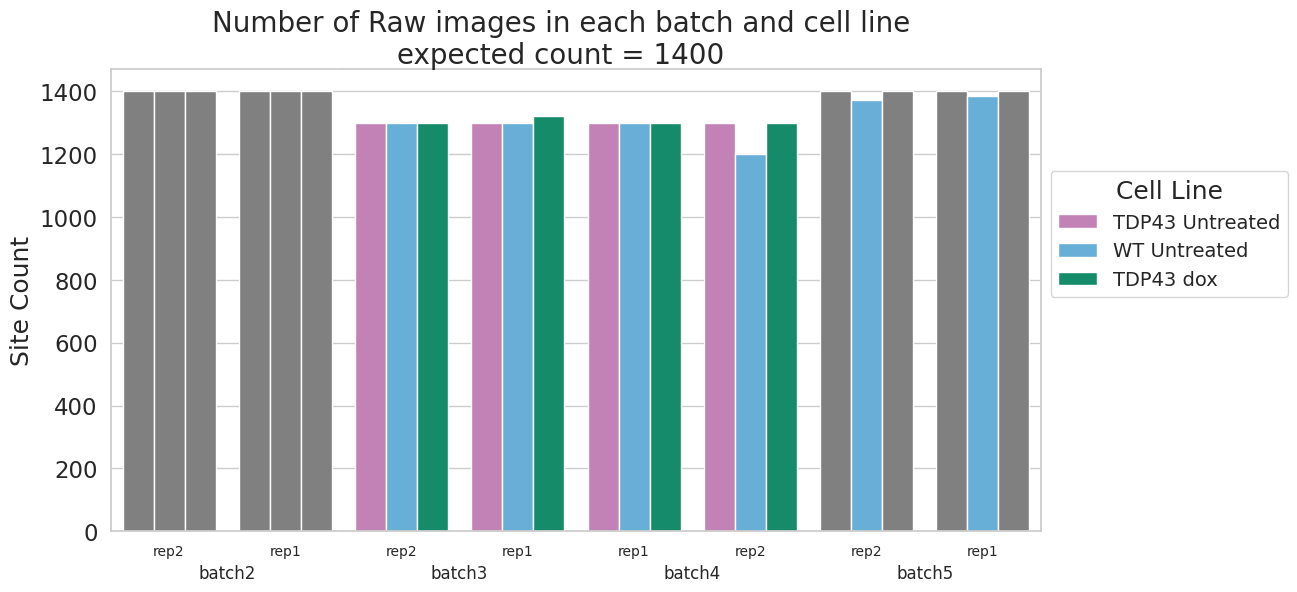

In [11]:
plot_sites_count(df, dnls_expected_raw, dnls_lines_order, dnls_custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

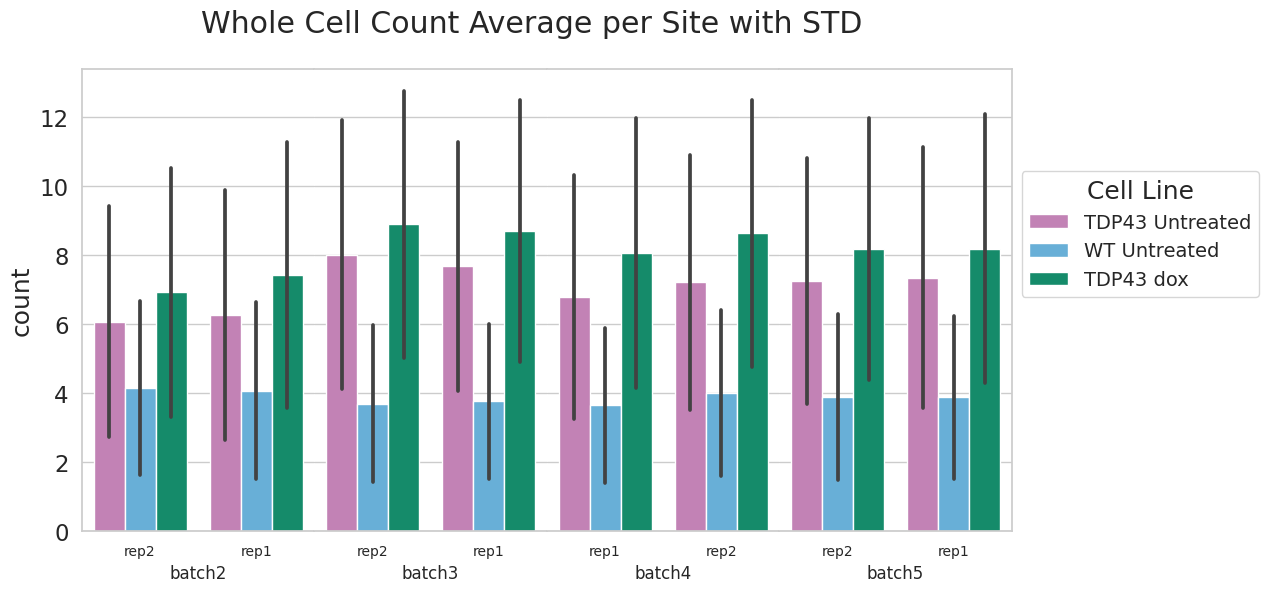

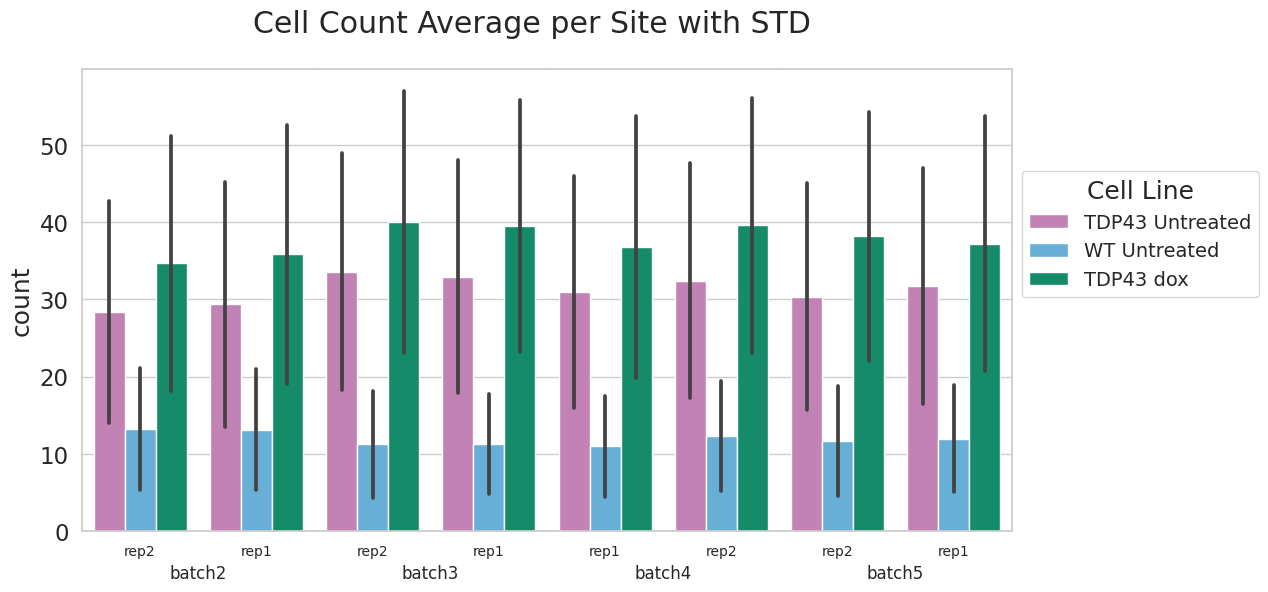

In [12]:
df_no_empty_sites = df[df.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, dnls_lines_order, dnls_custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, dnls_lines_order, dnls_custom_palette, whole_cells=False)

# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


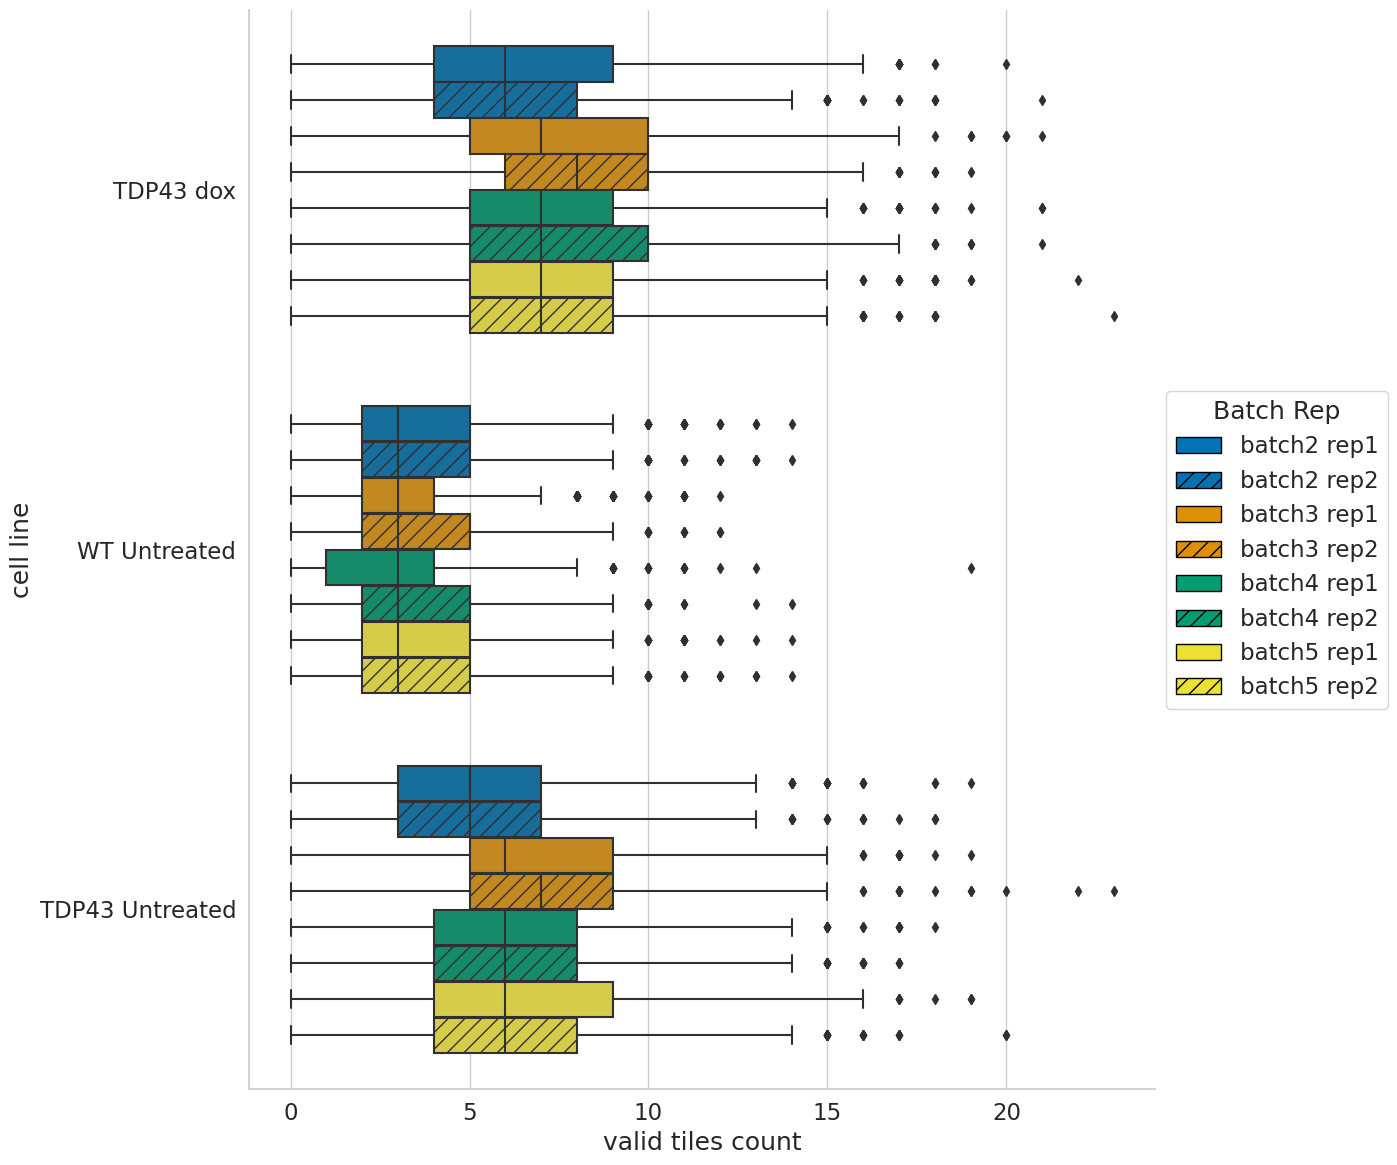

In [13]:
plot_n_valid_tiles_count(df, custom_palette, reps, batch_min=2, batch_max=5)

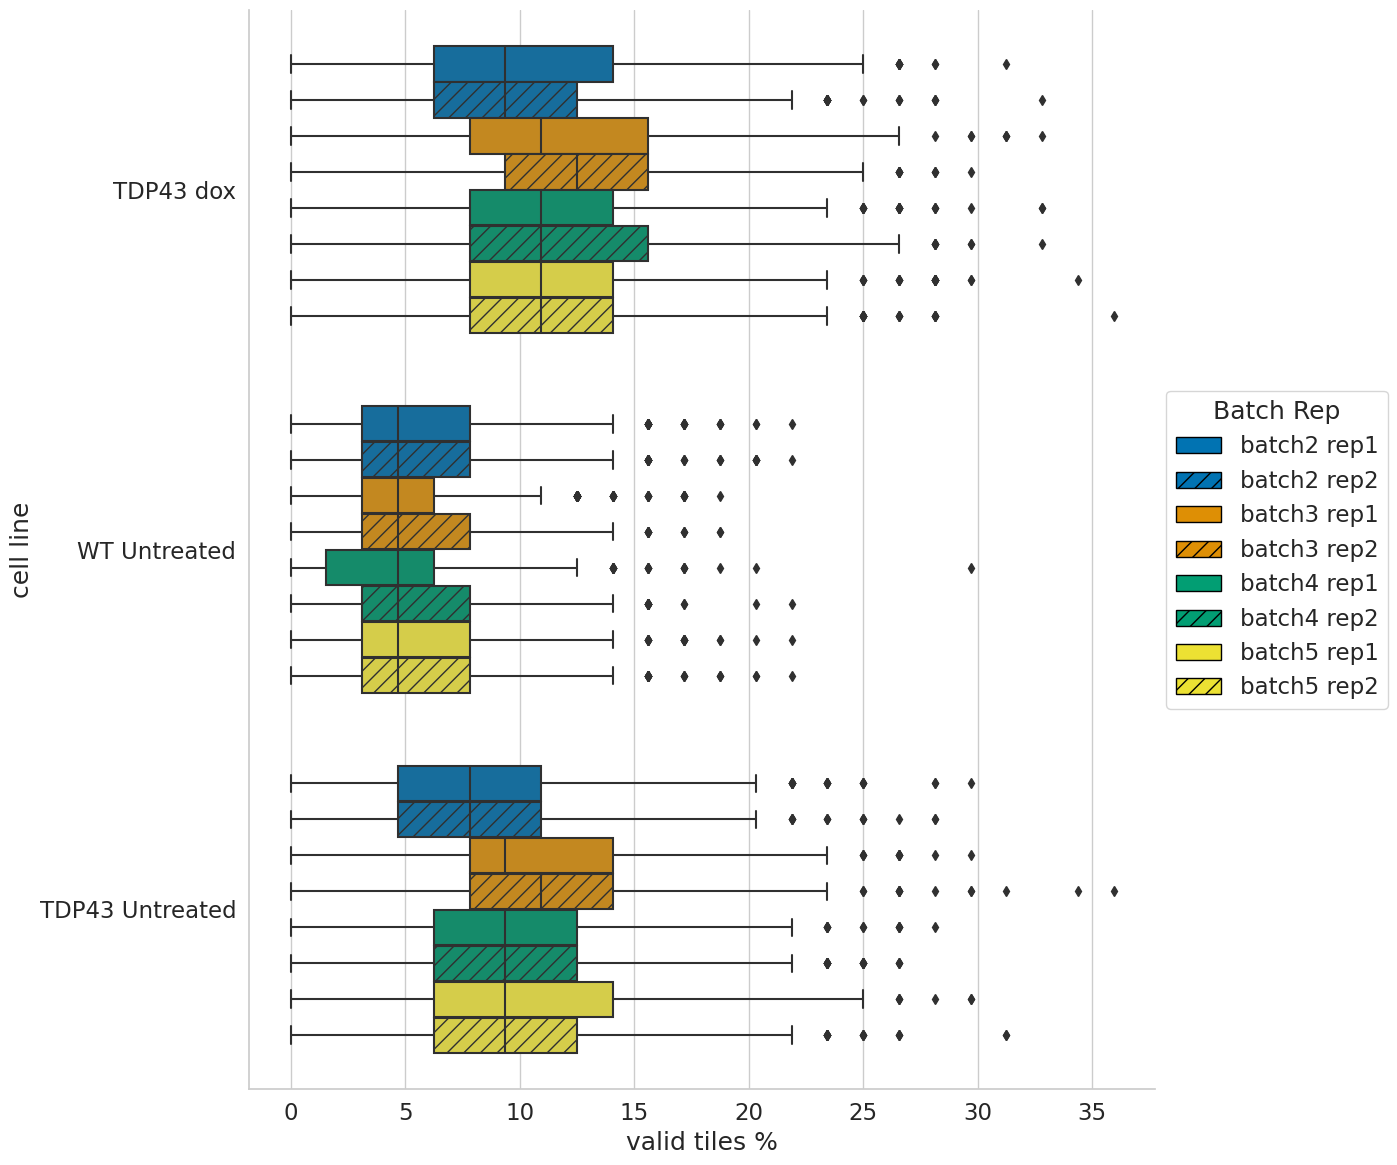

In [14]:
plot_p_valid_tiles_count(df, custom_palette, reps, batch_min=2, batch_max=5)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


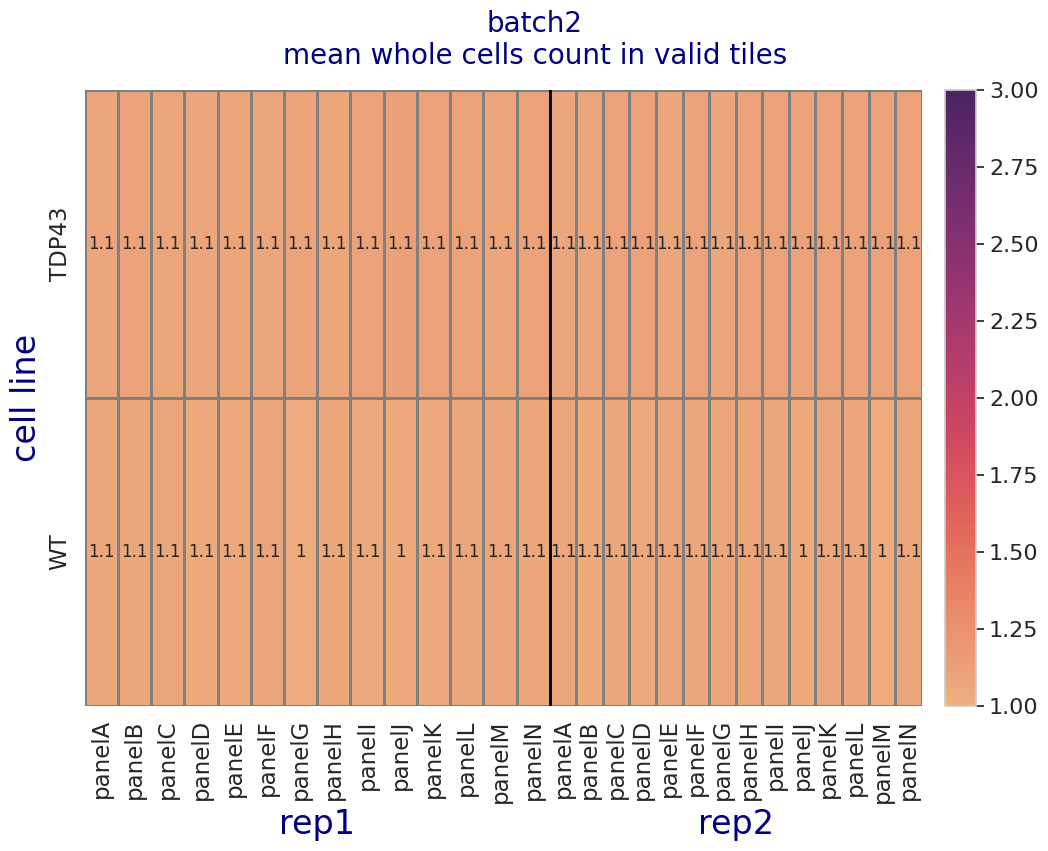

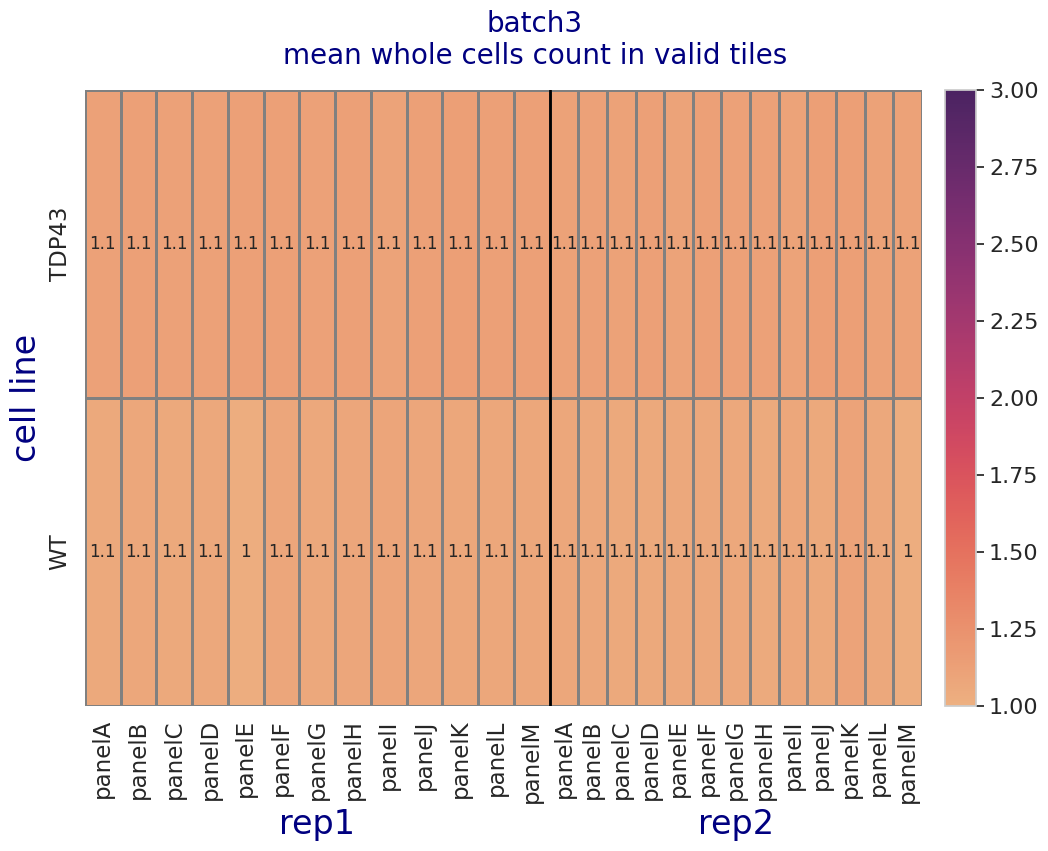

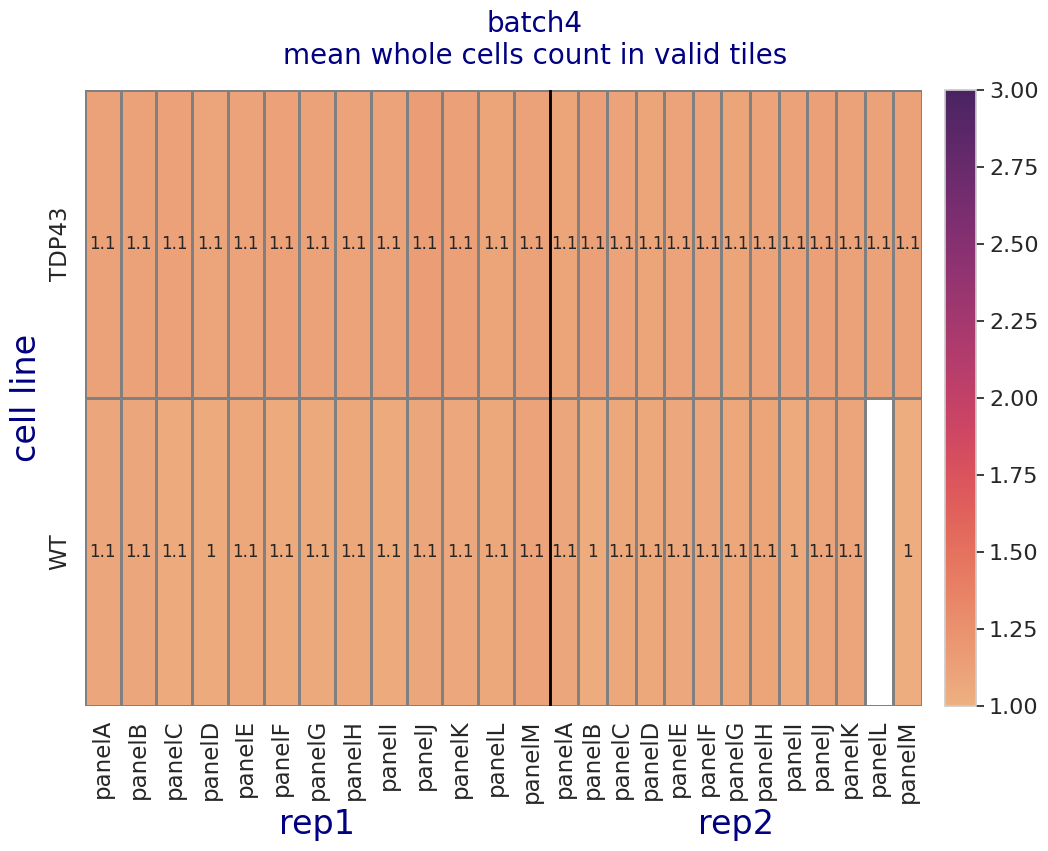

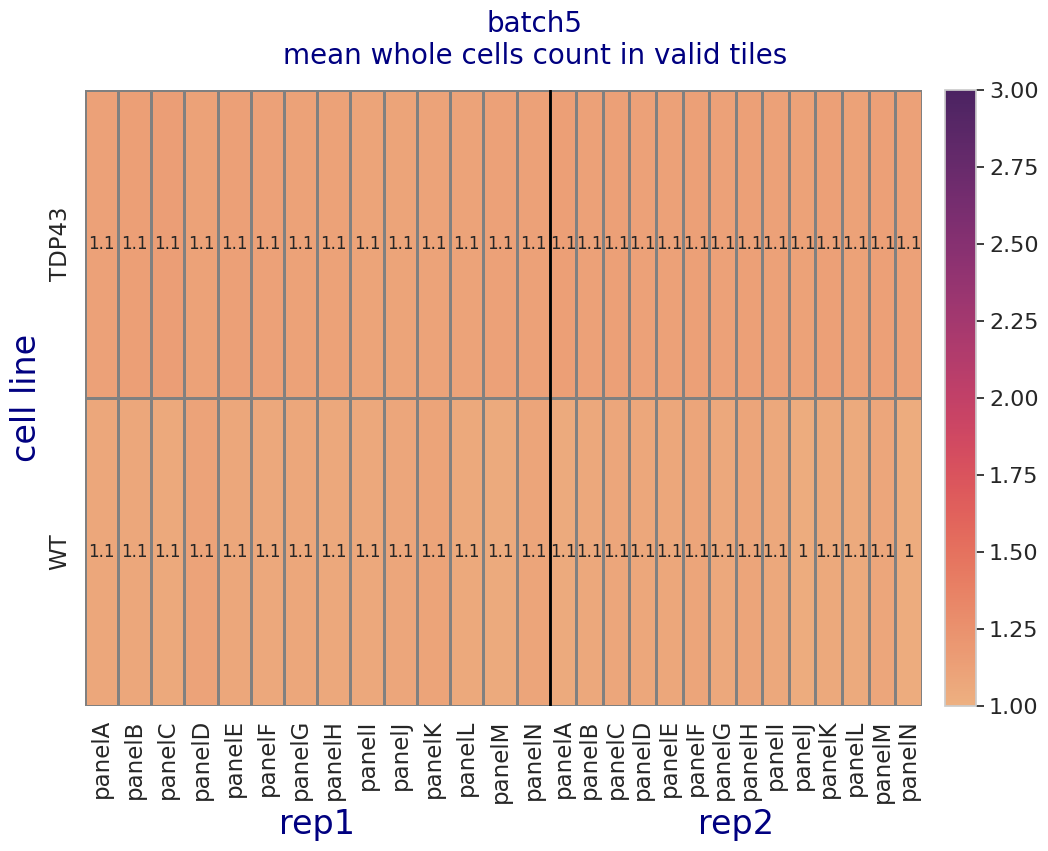

In [15]:
plot_hm(df, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch2_16bit_no_downsample


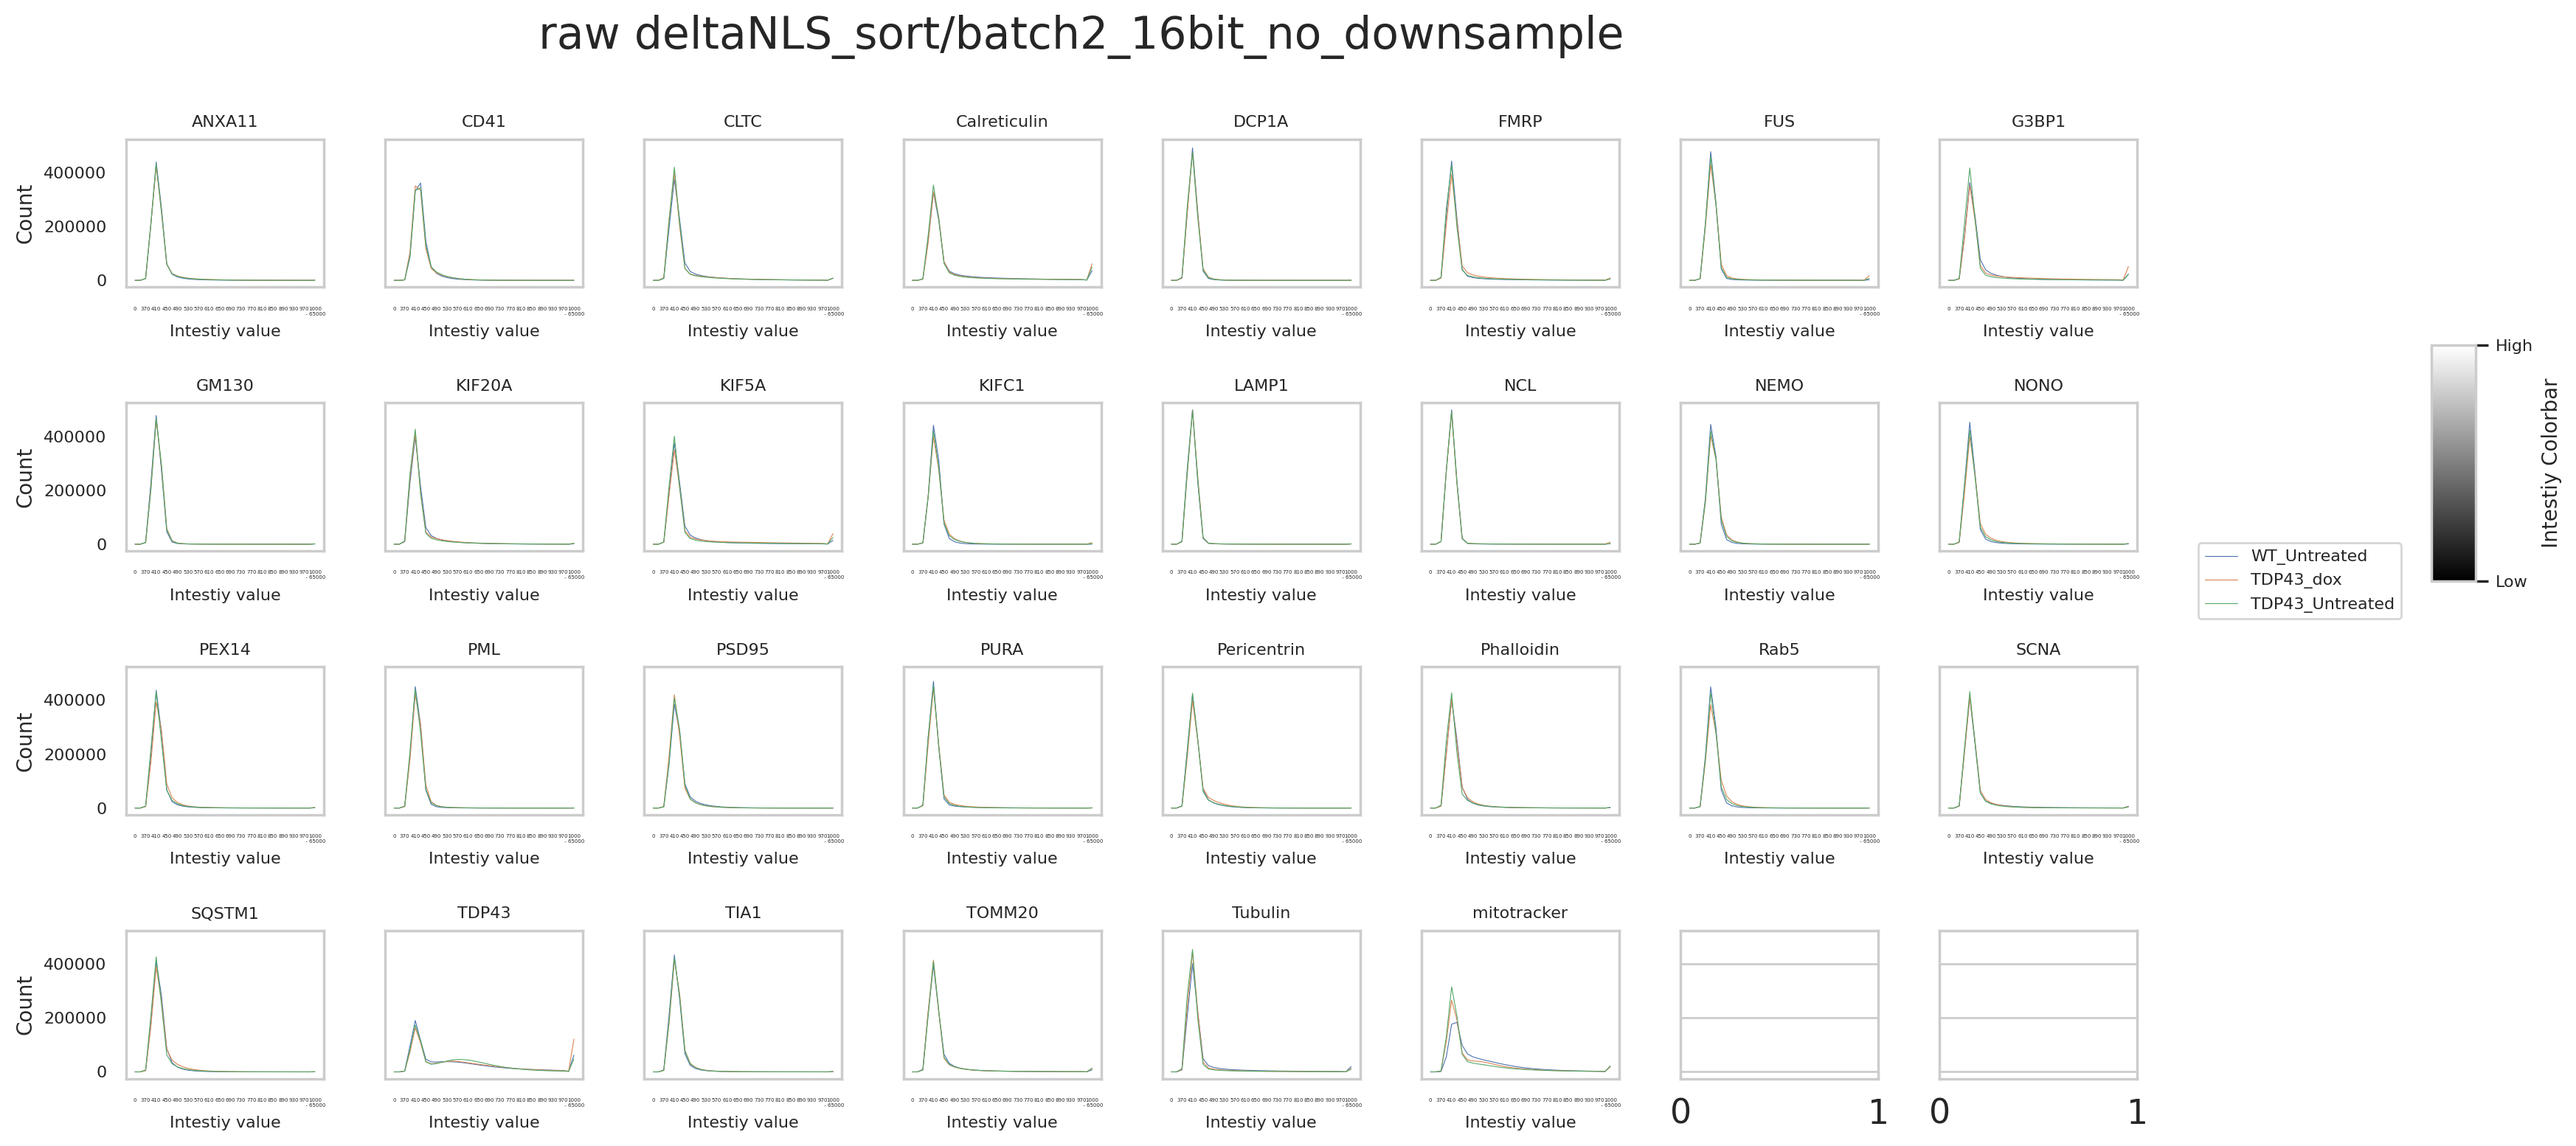

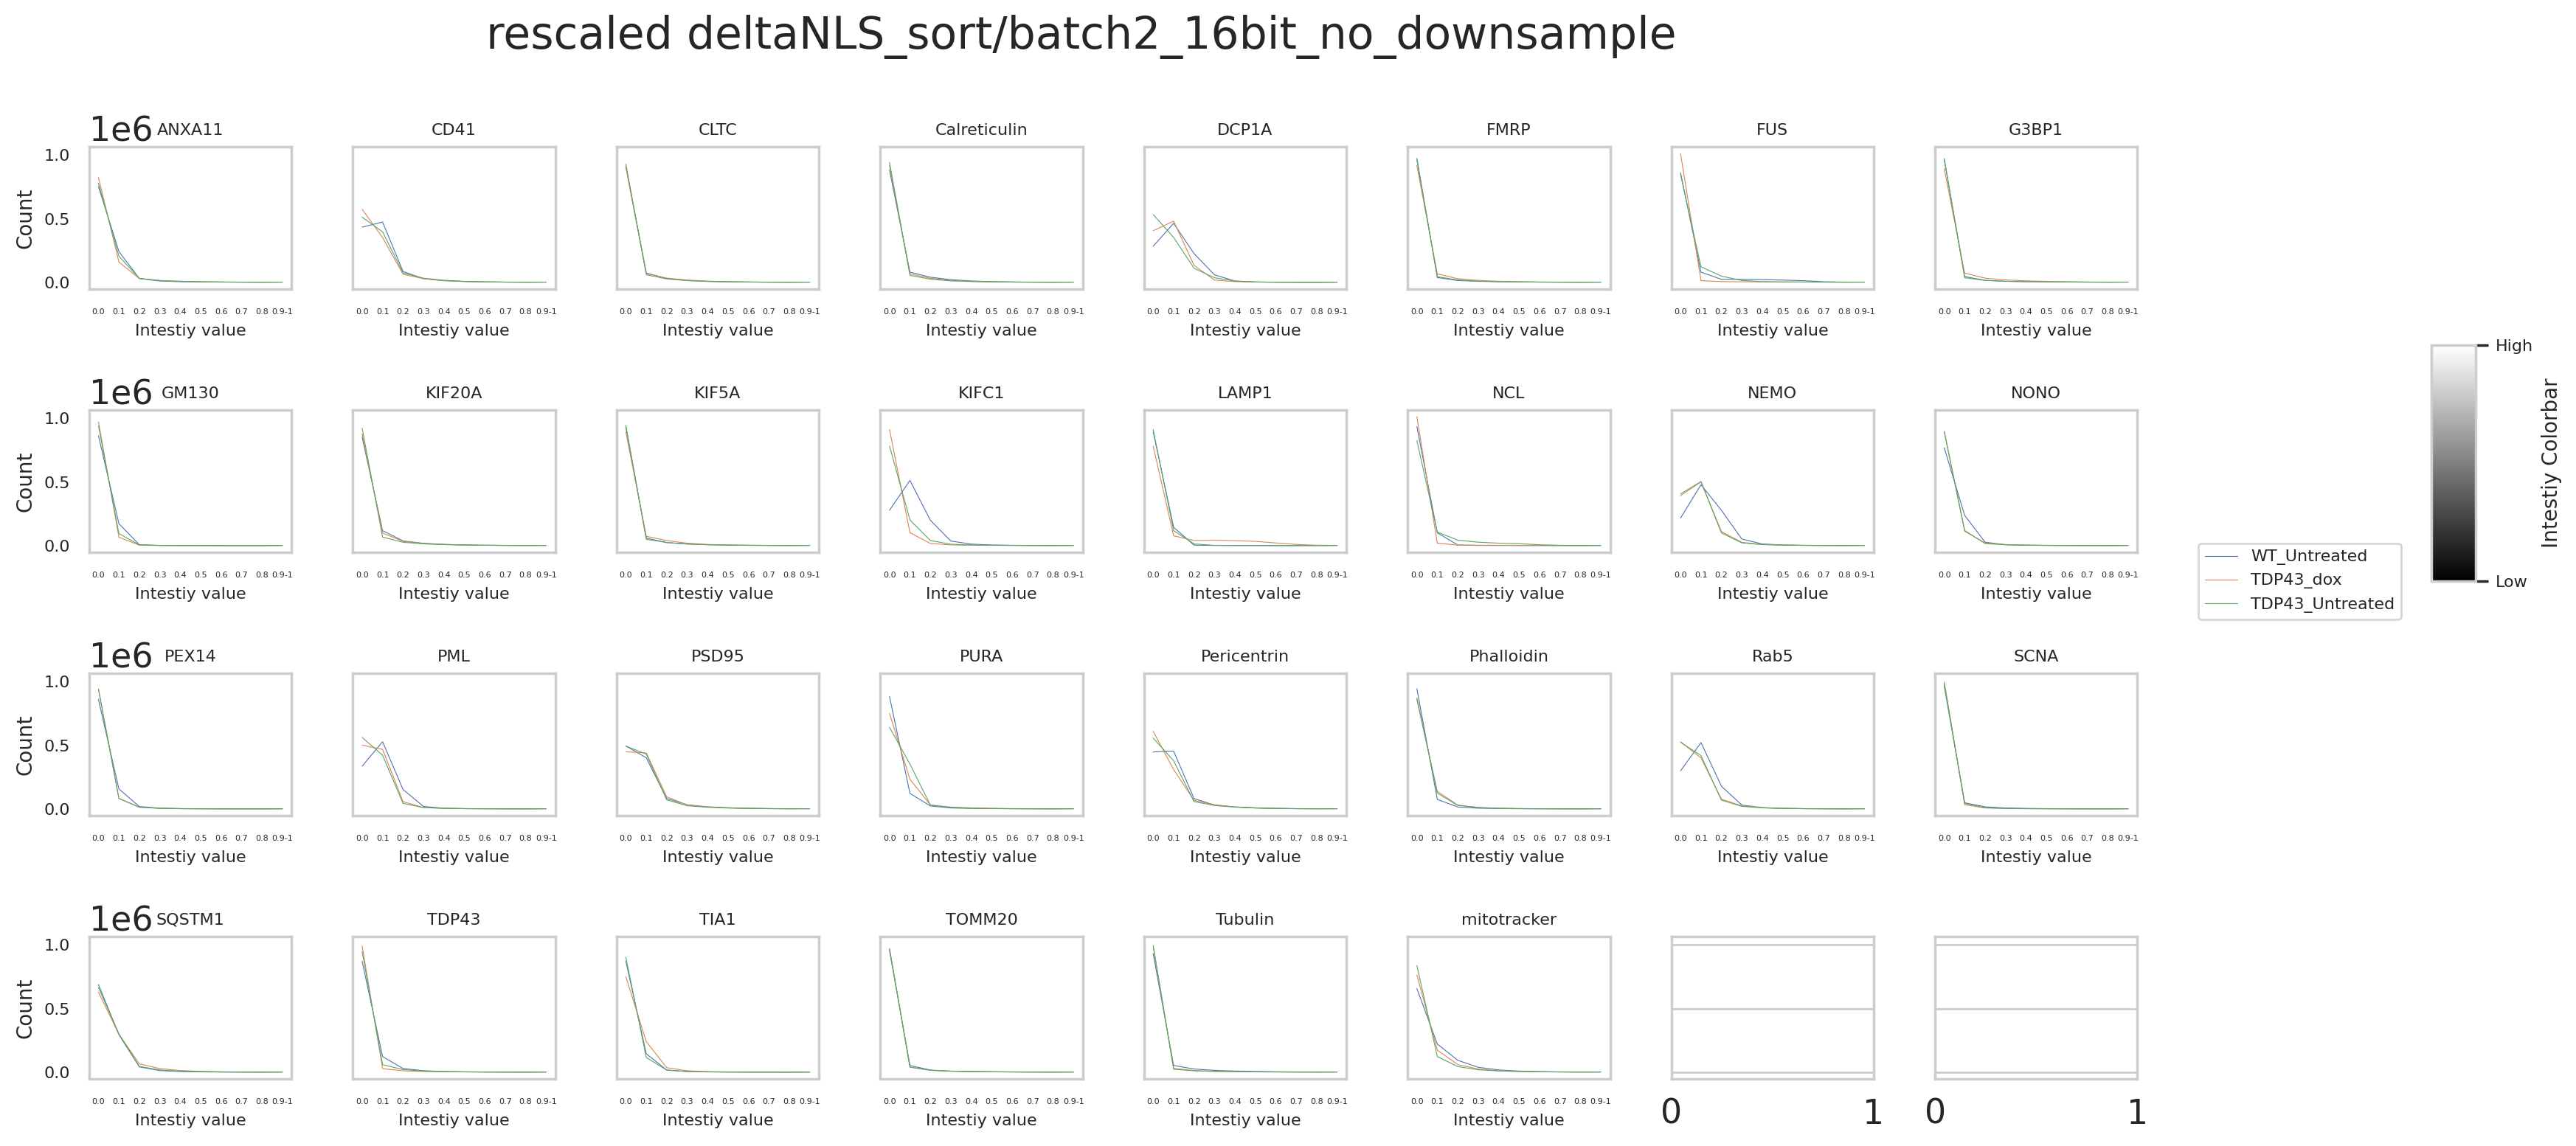

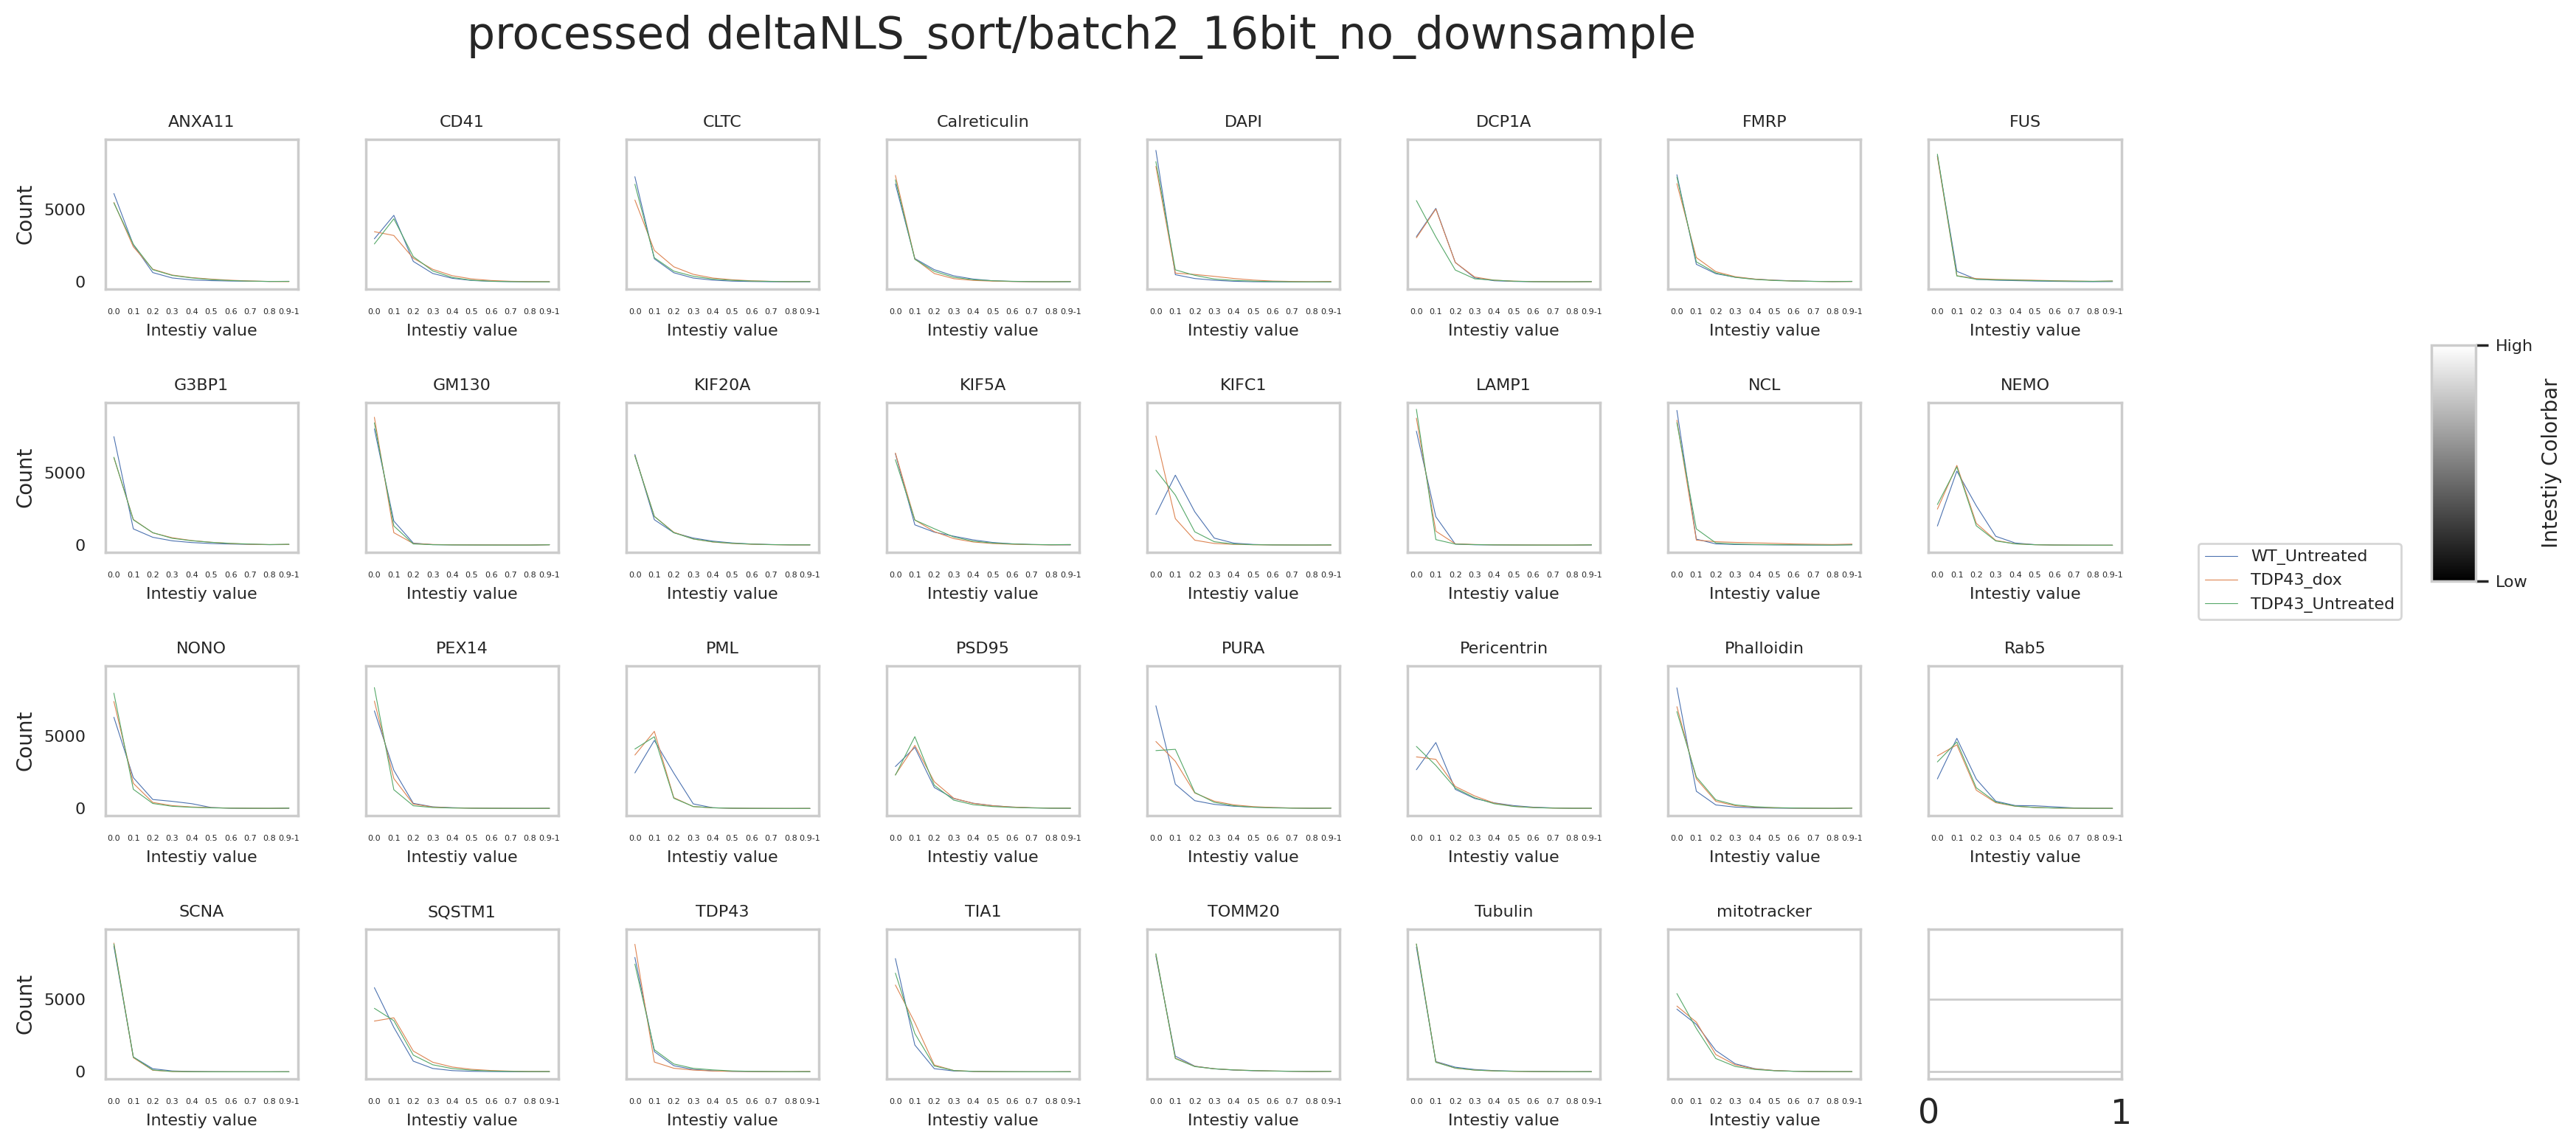

batch3_16bit_no_downsample


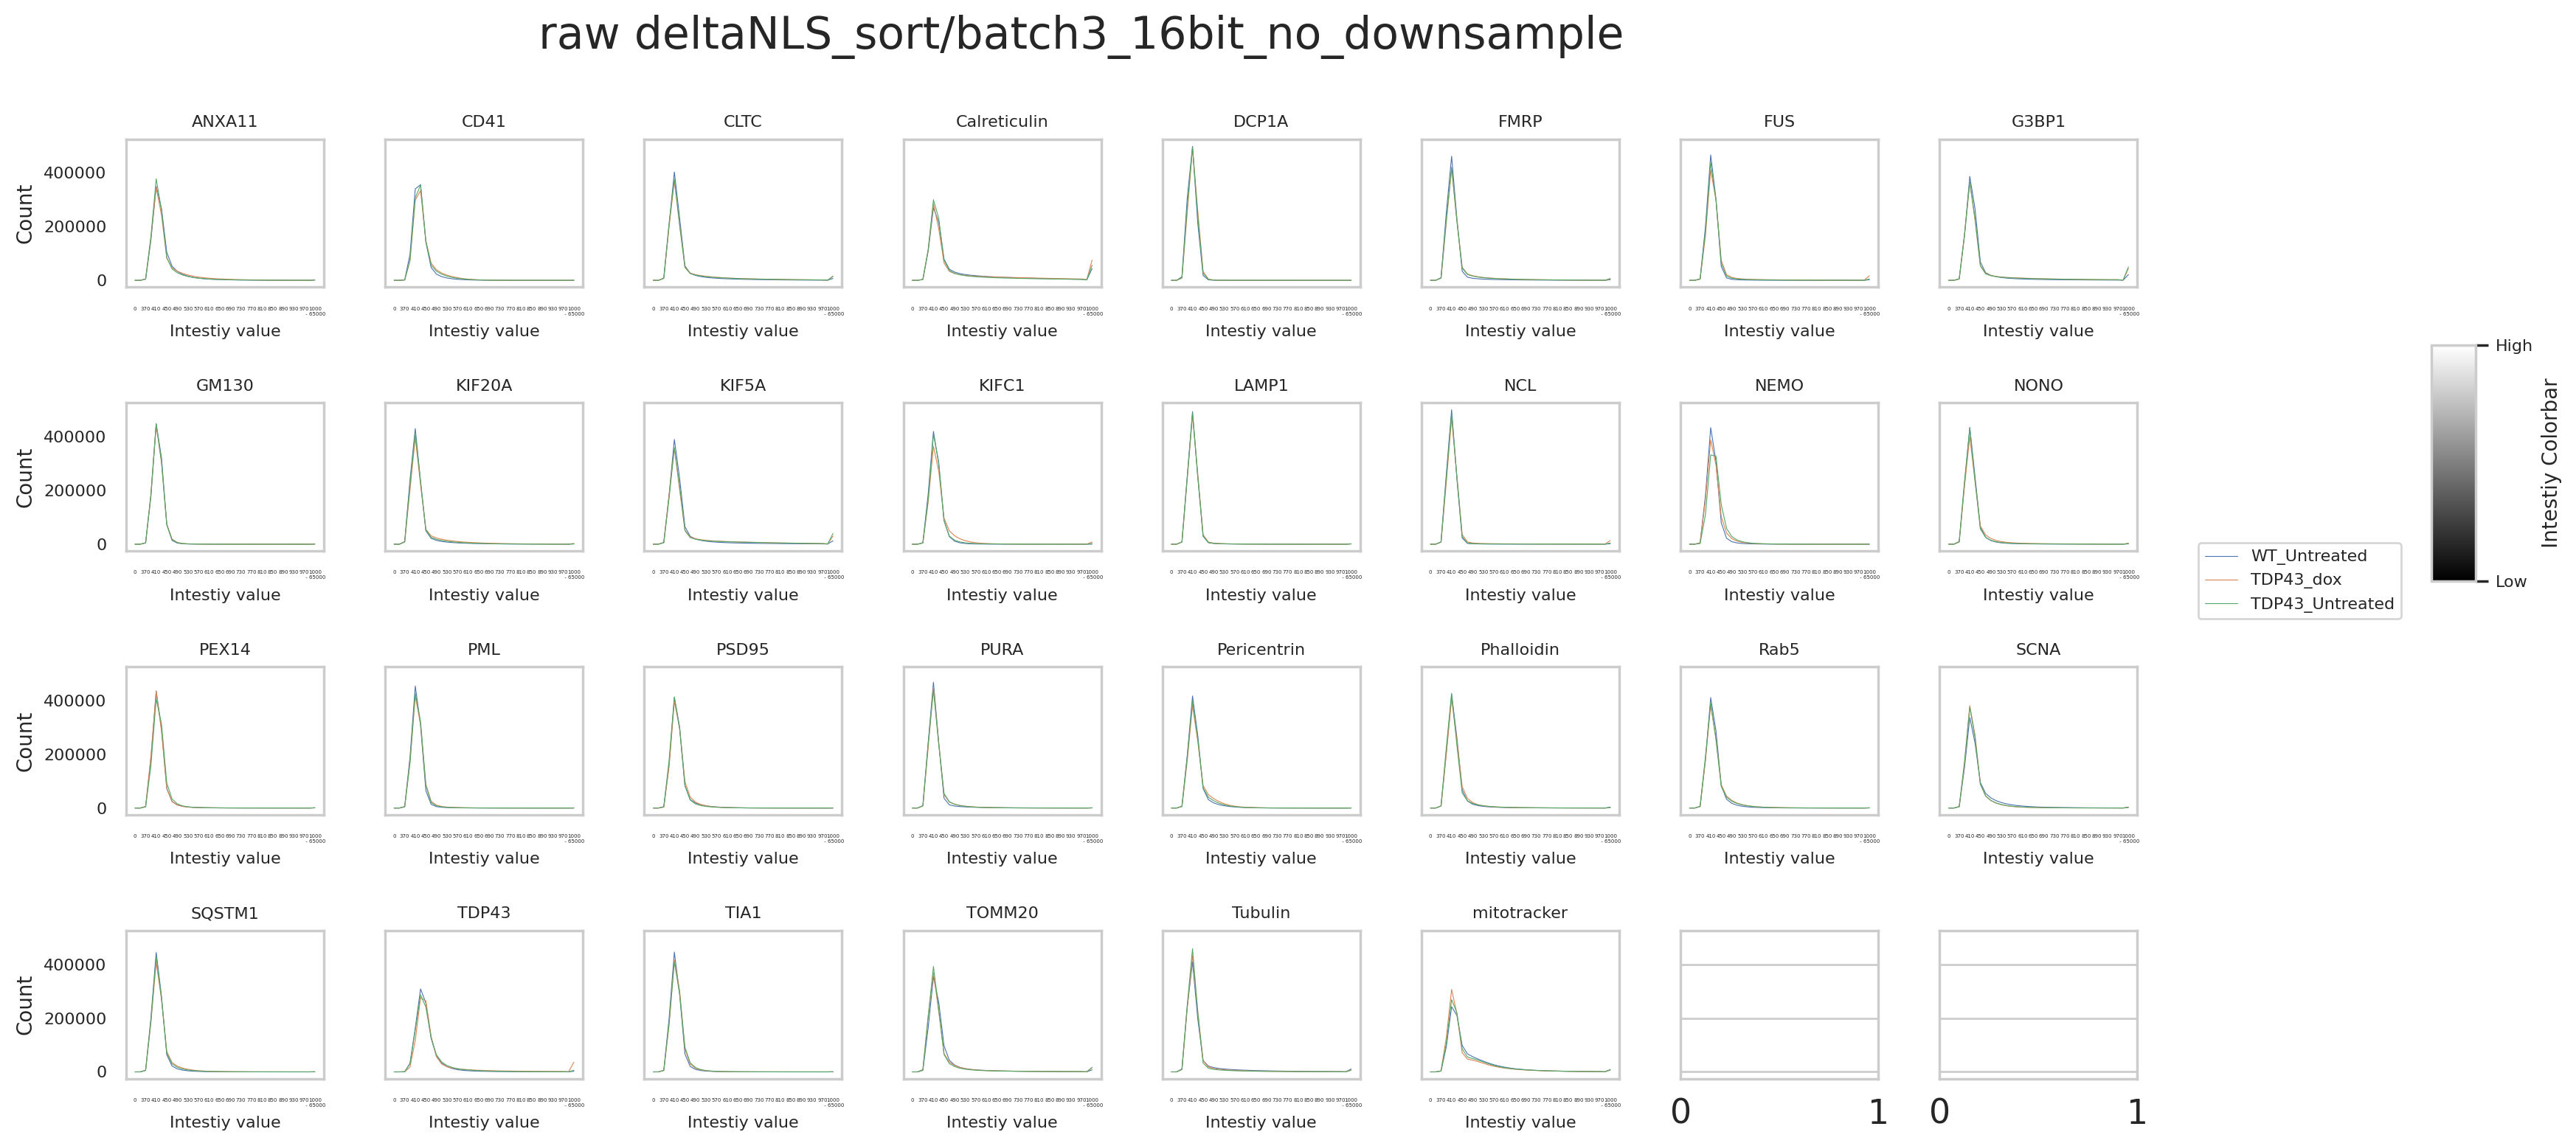

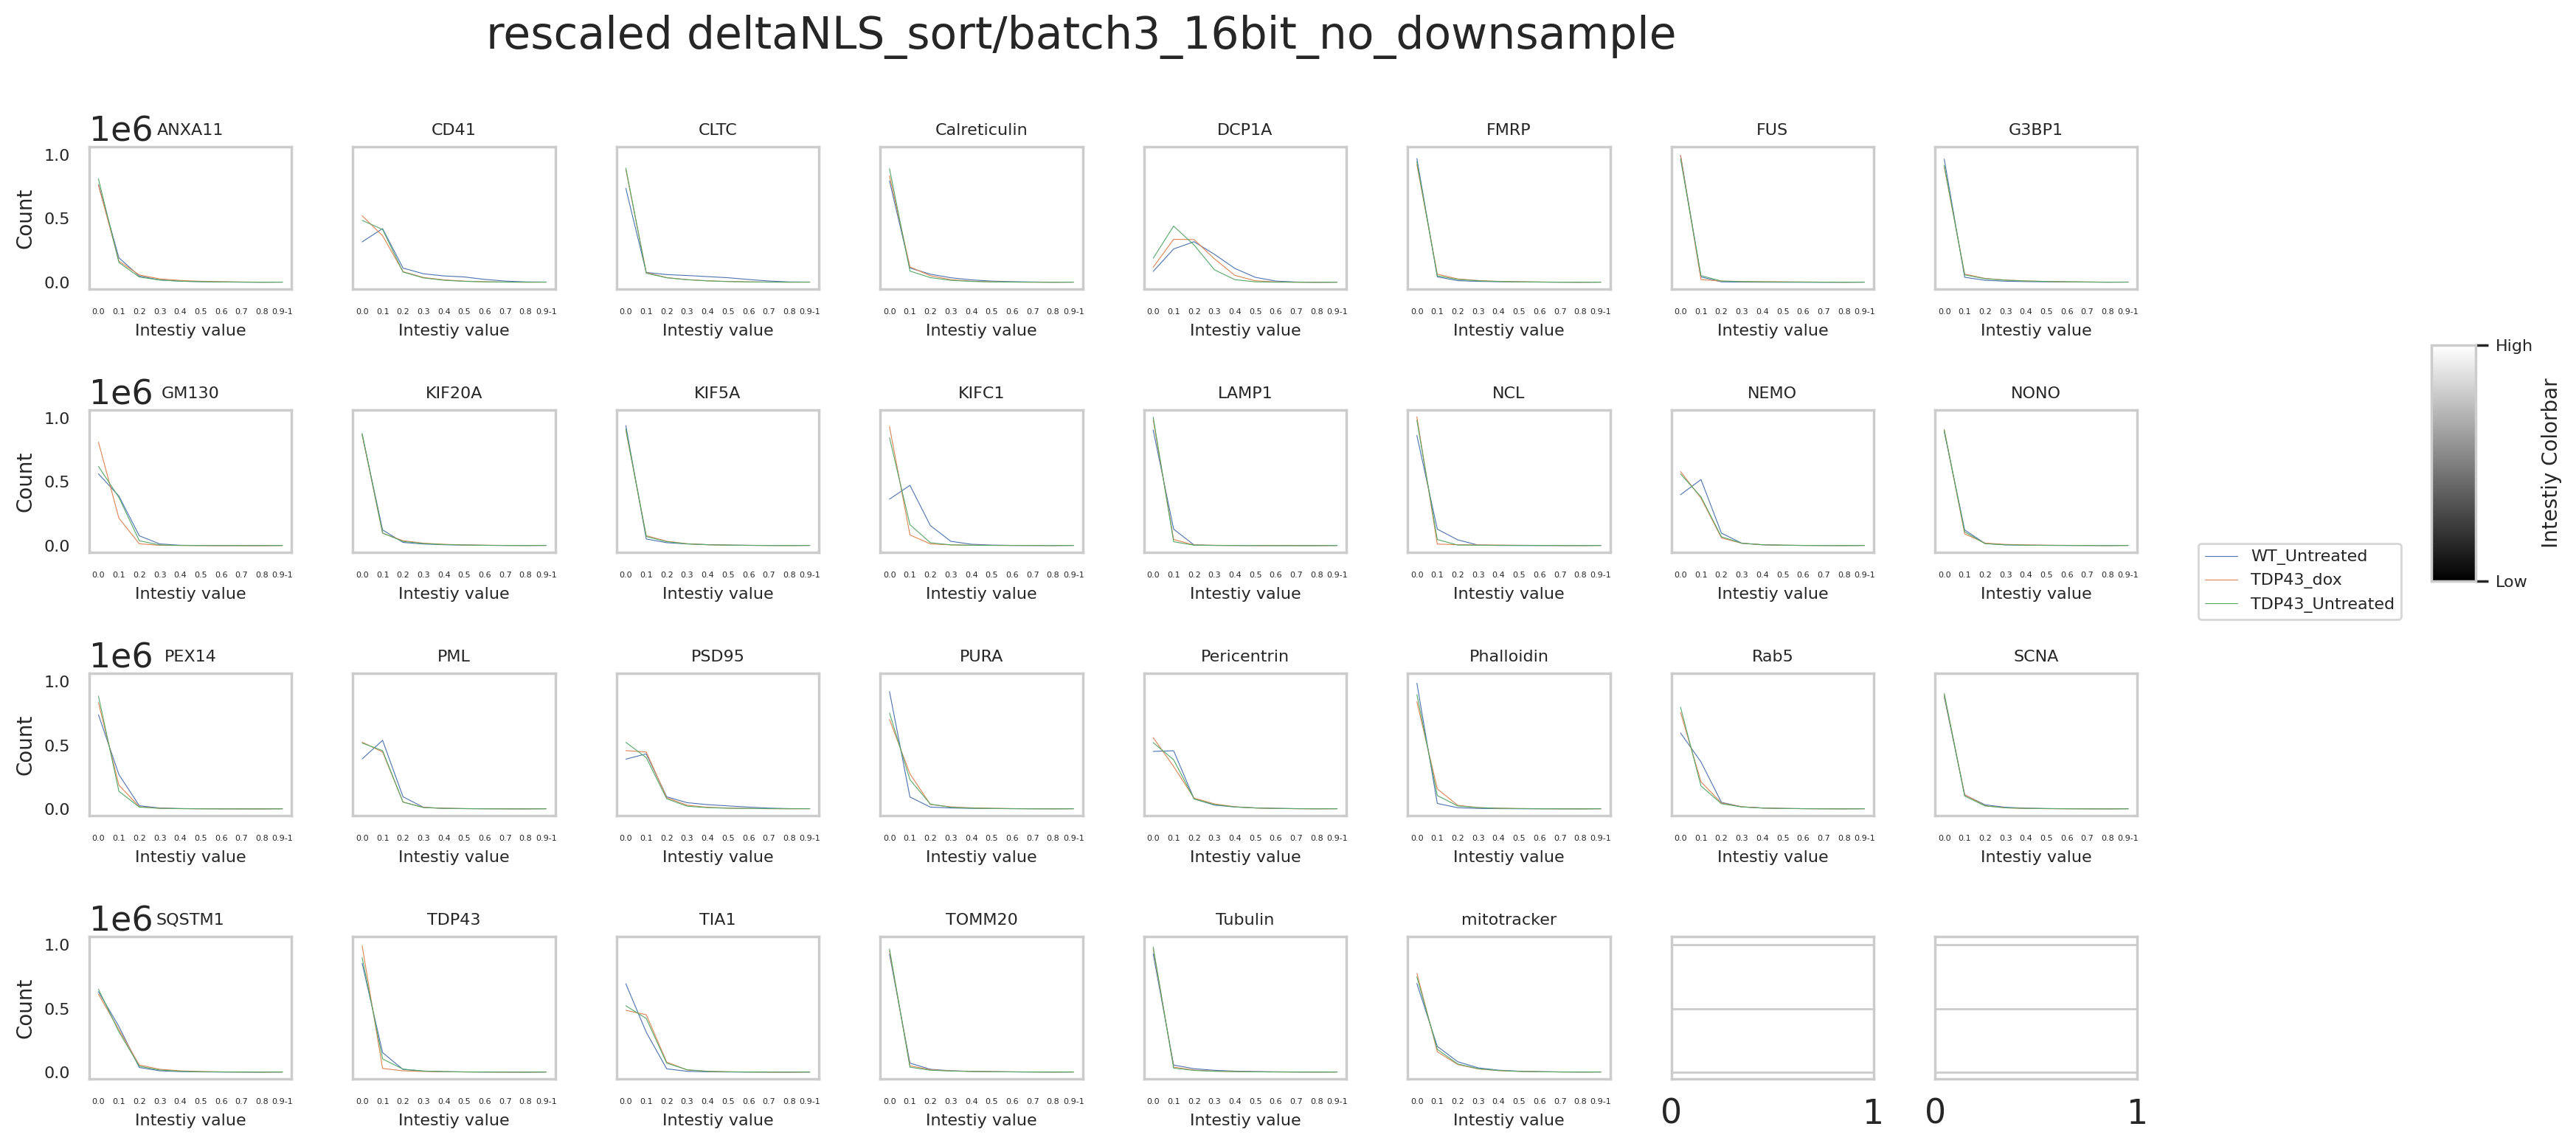

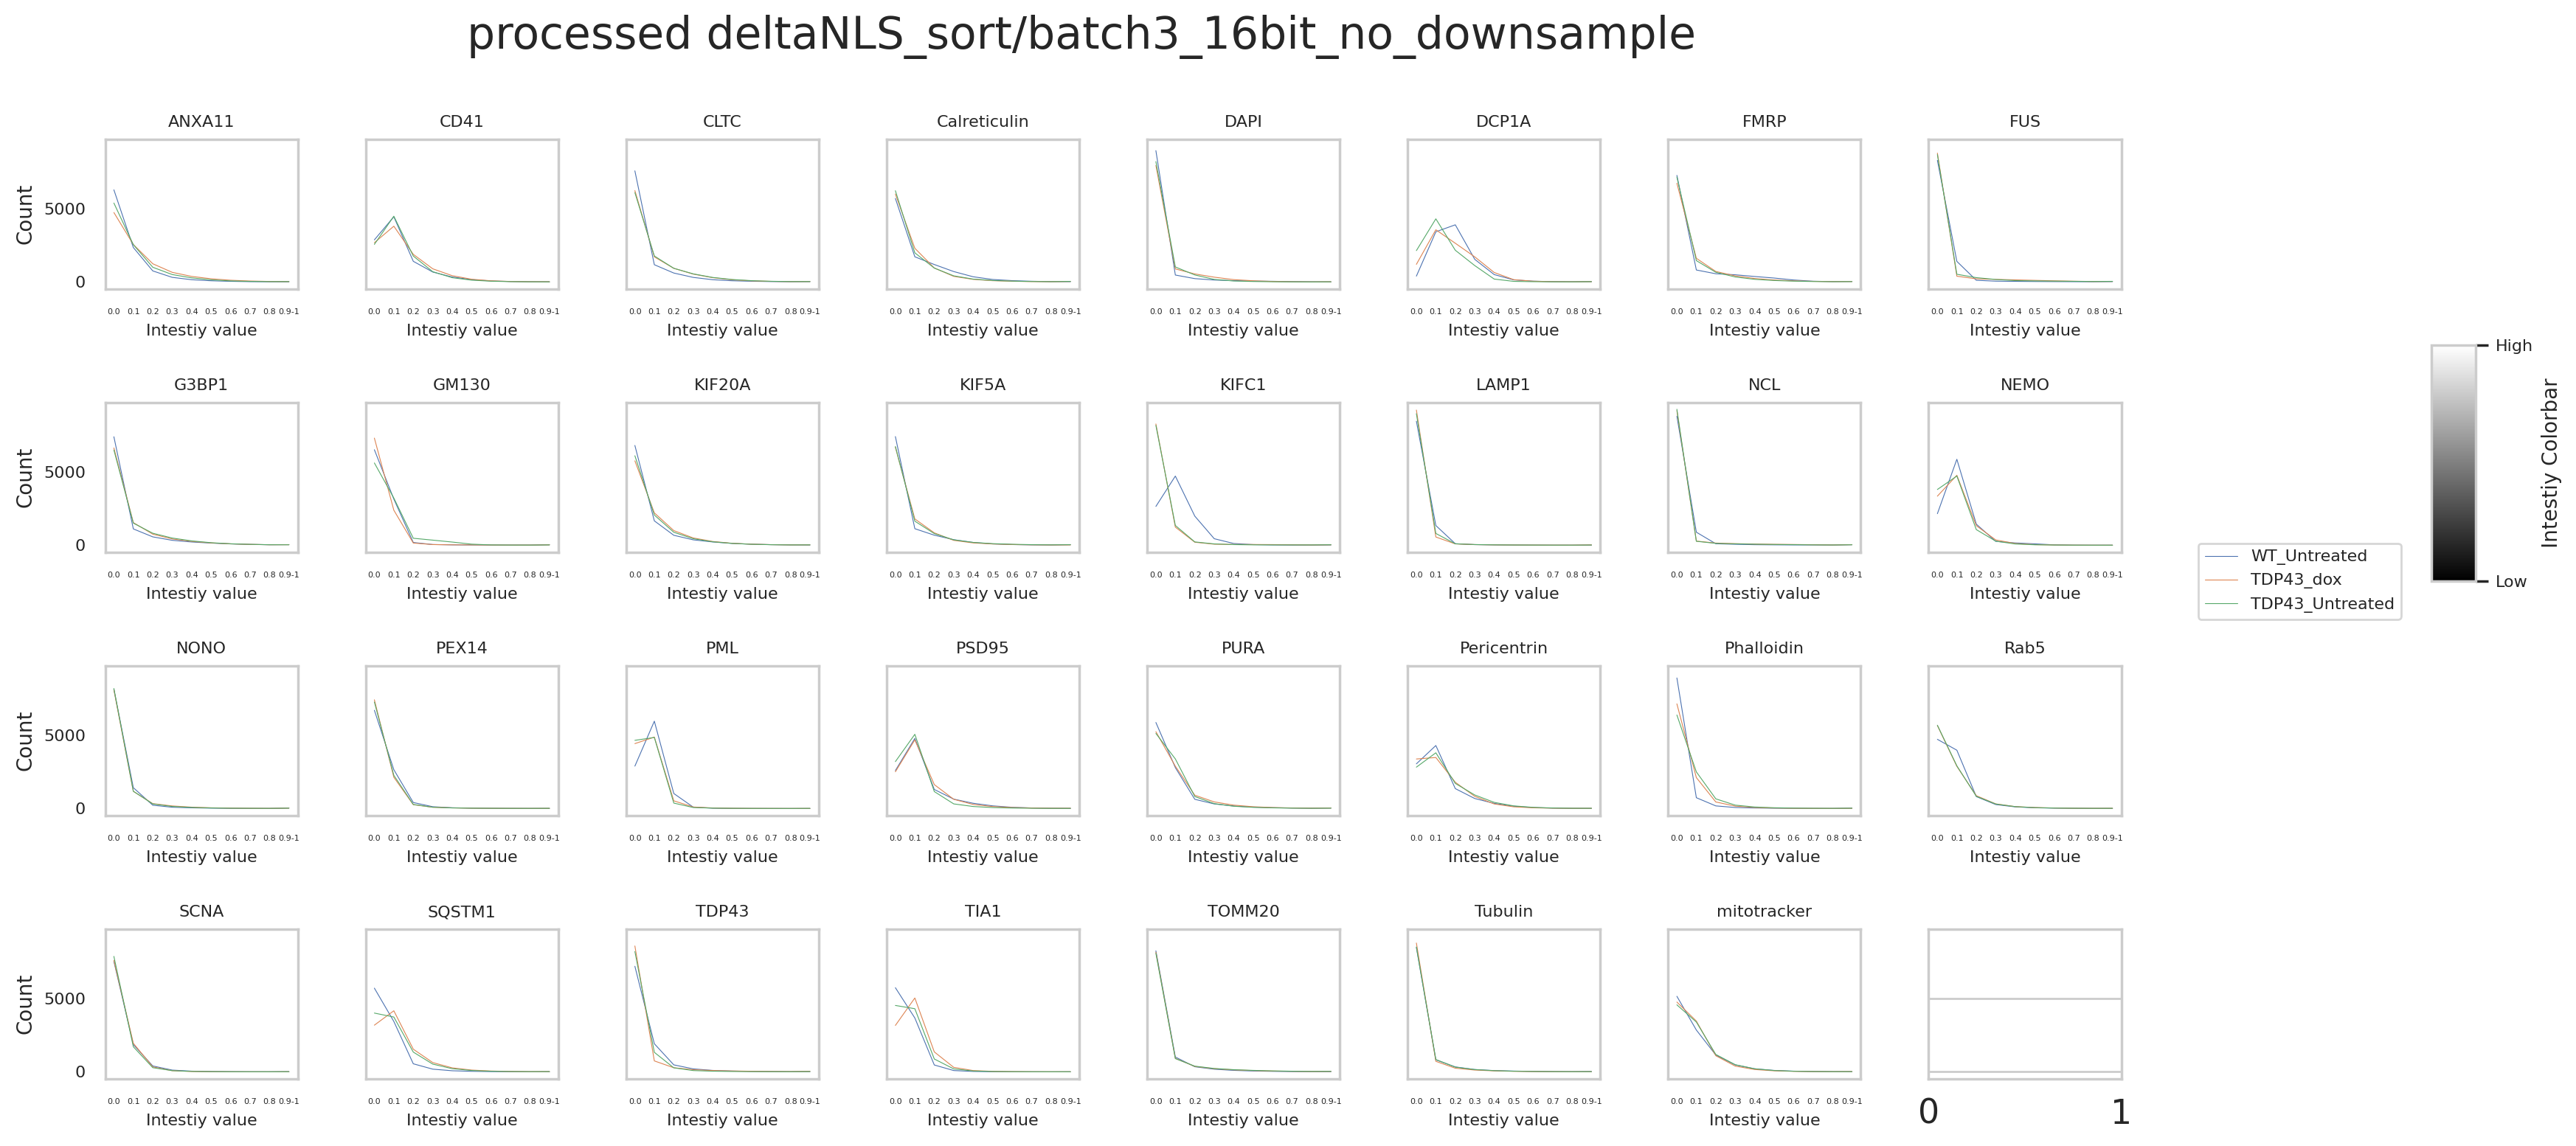

batch4_16bit_no_downsample


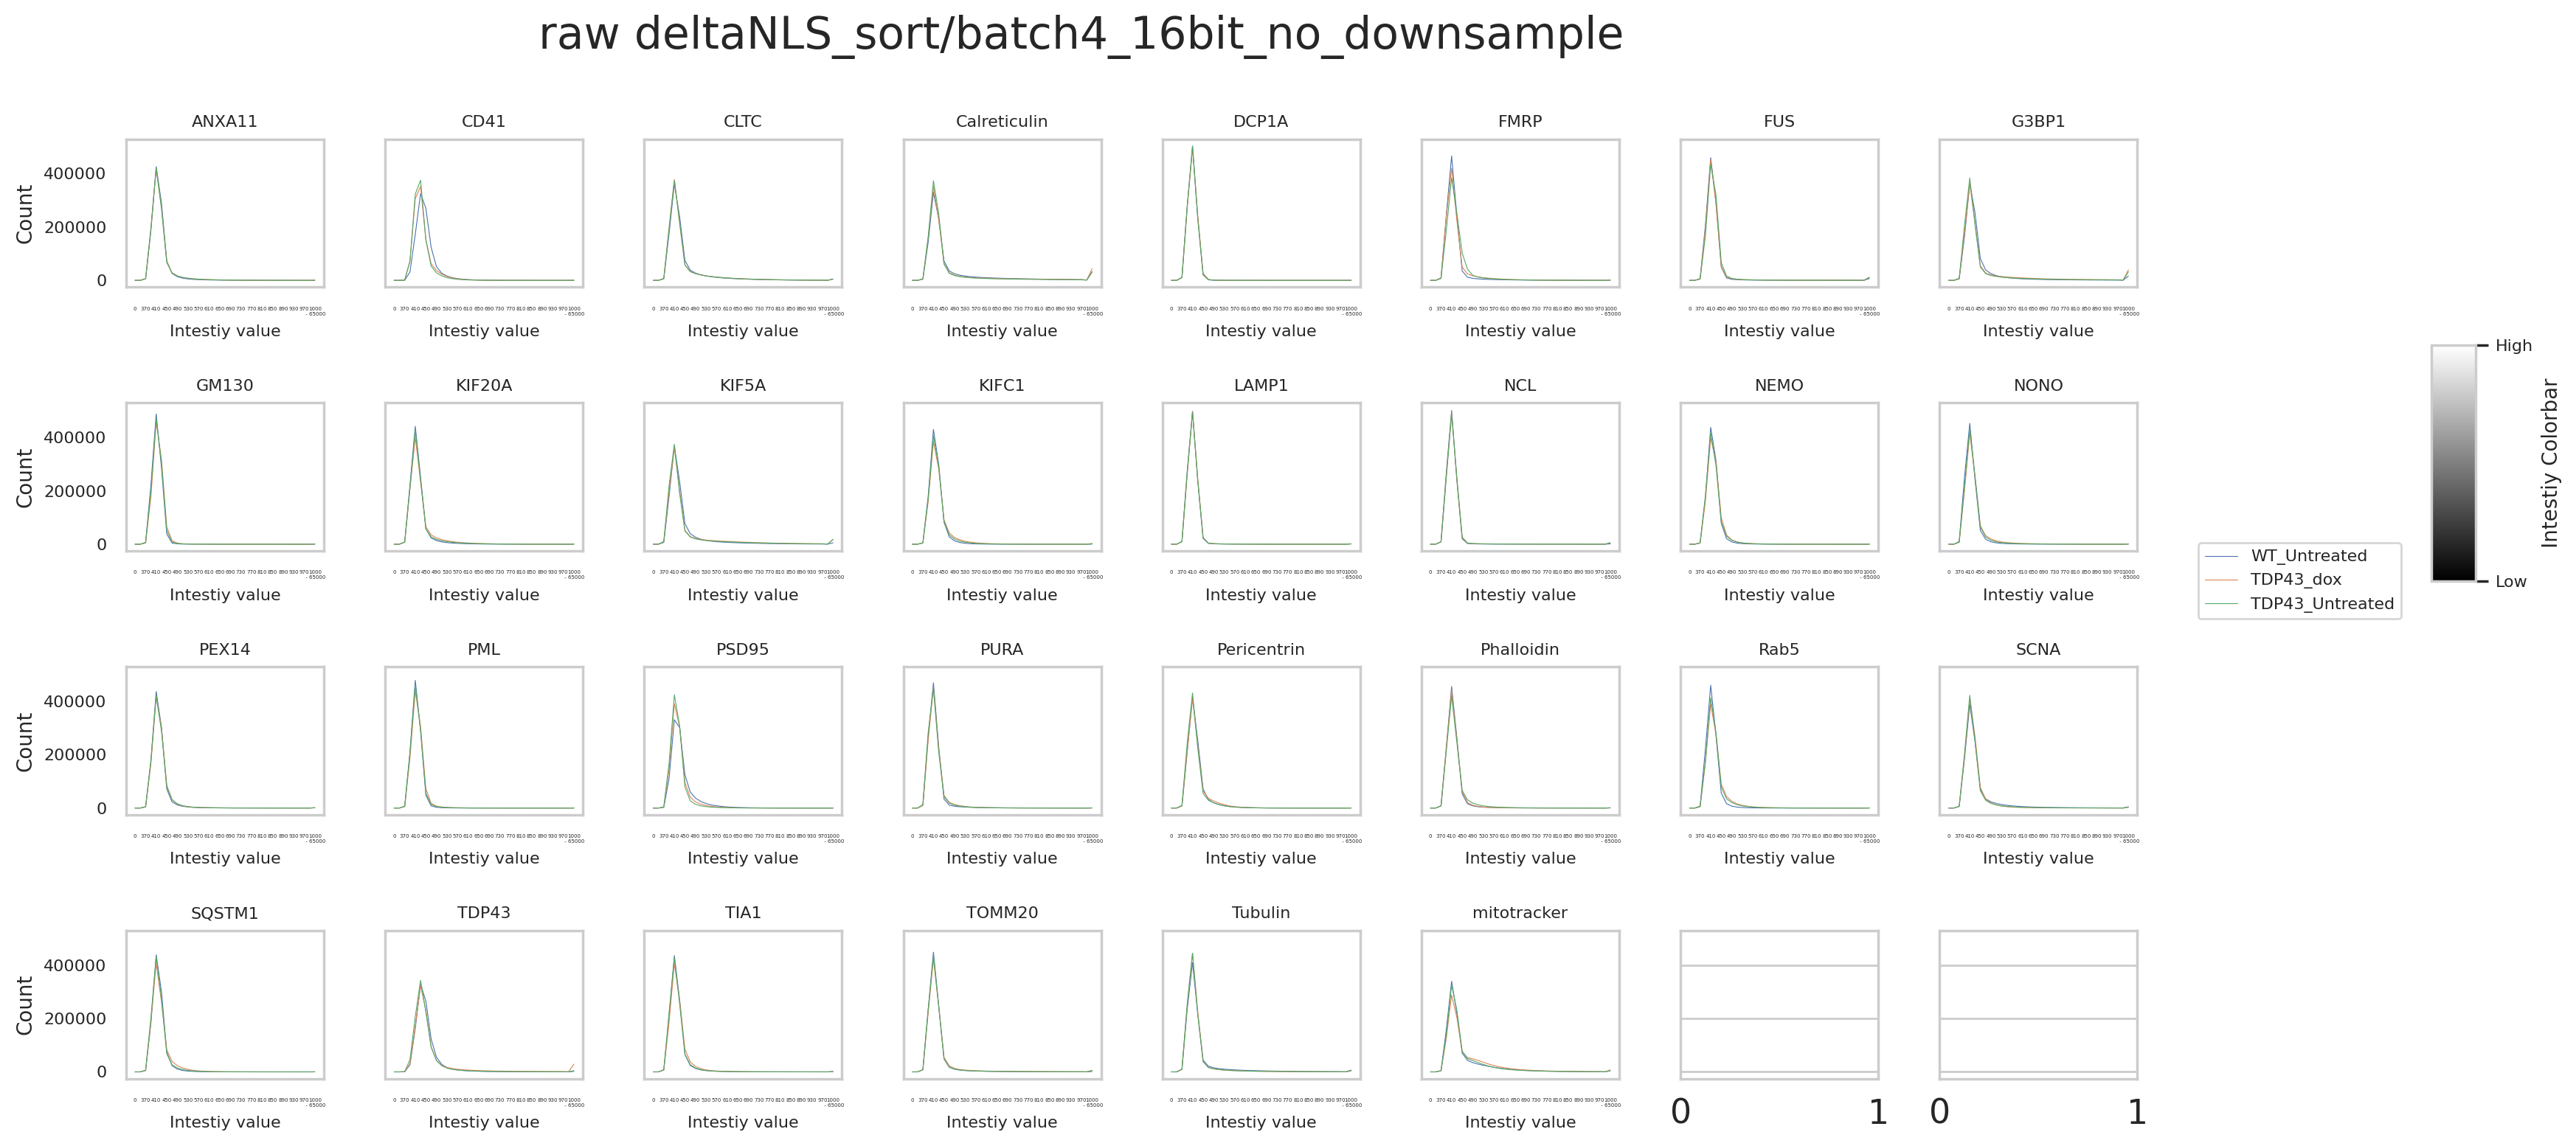

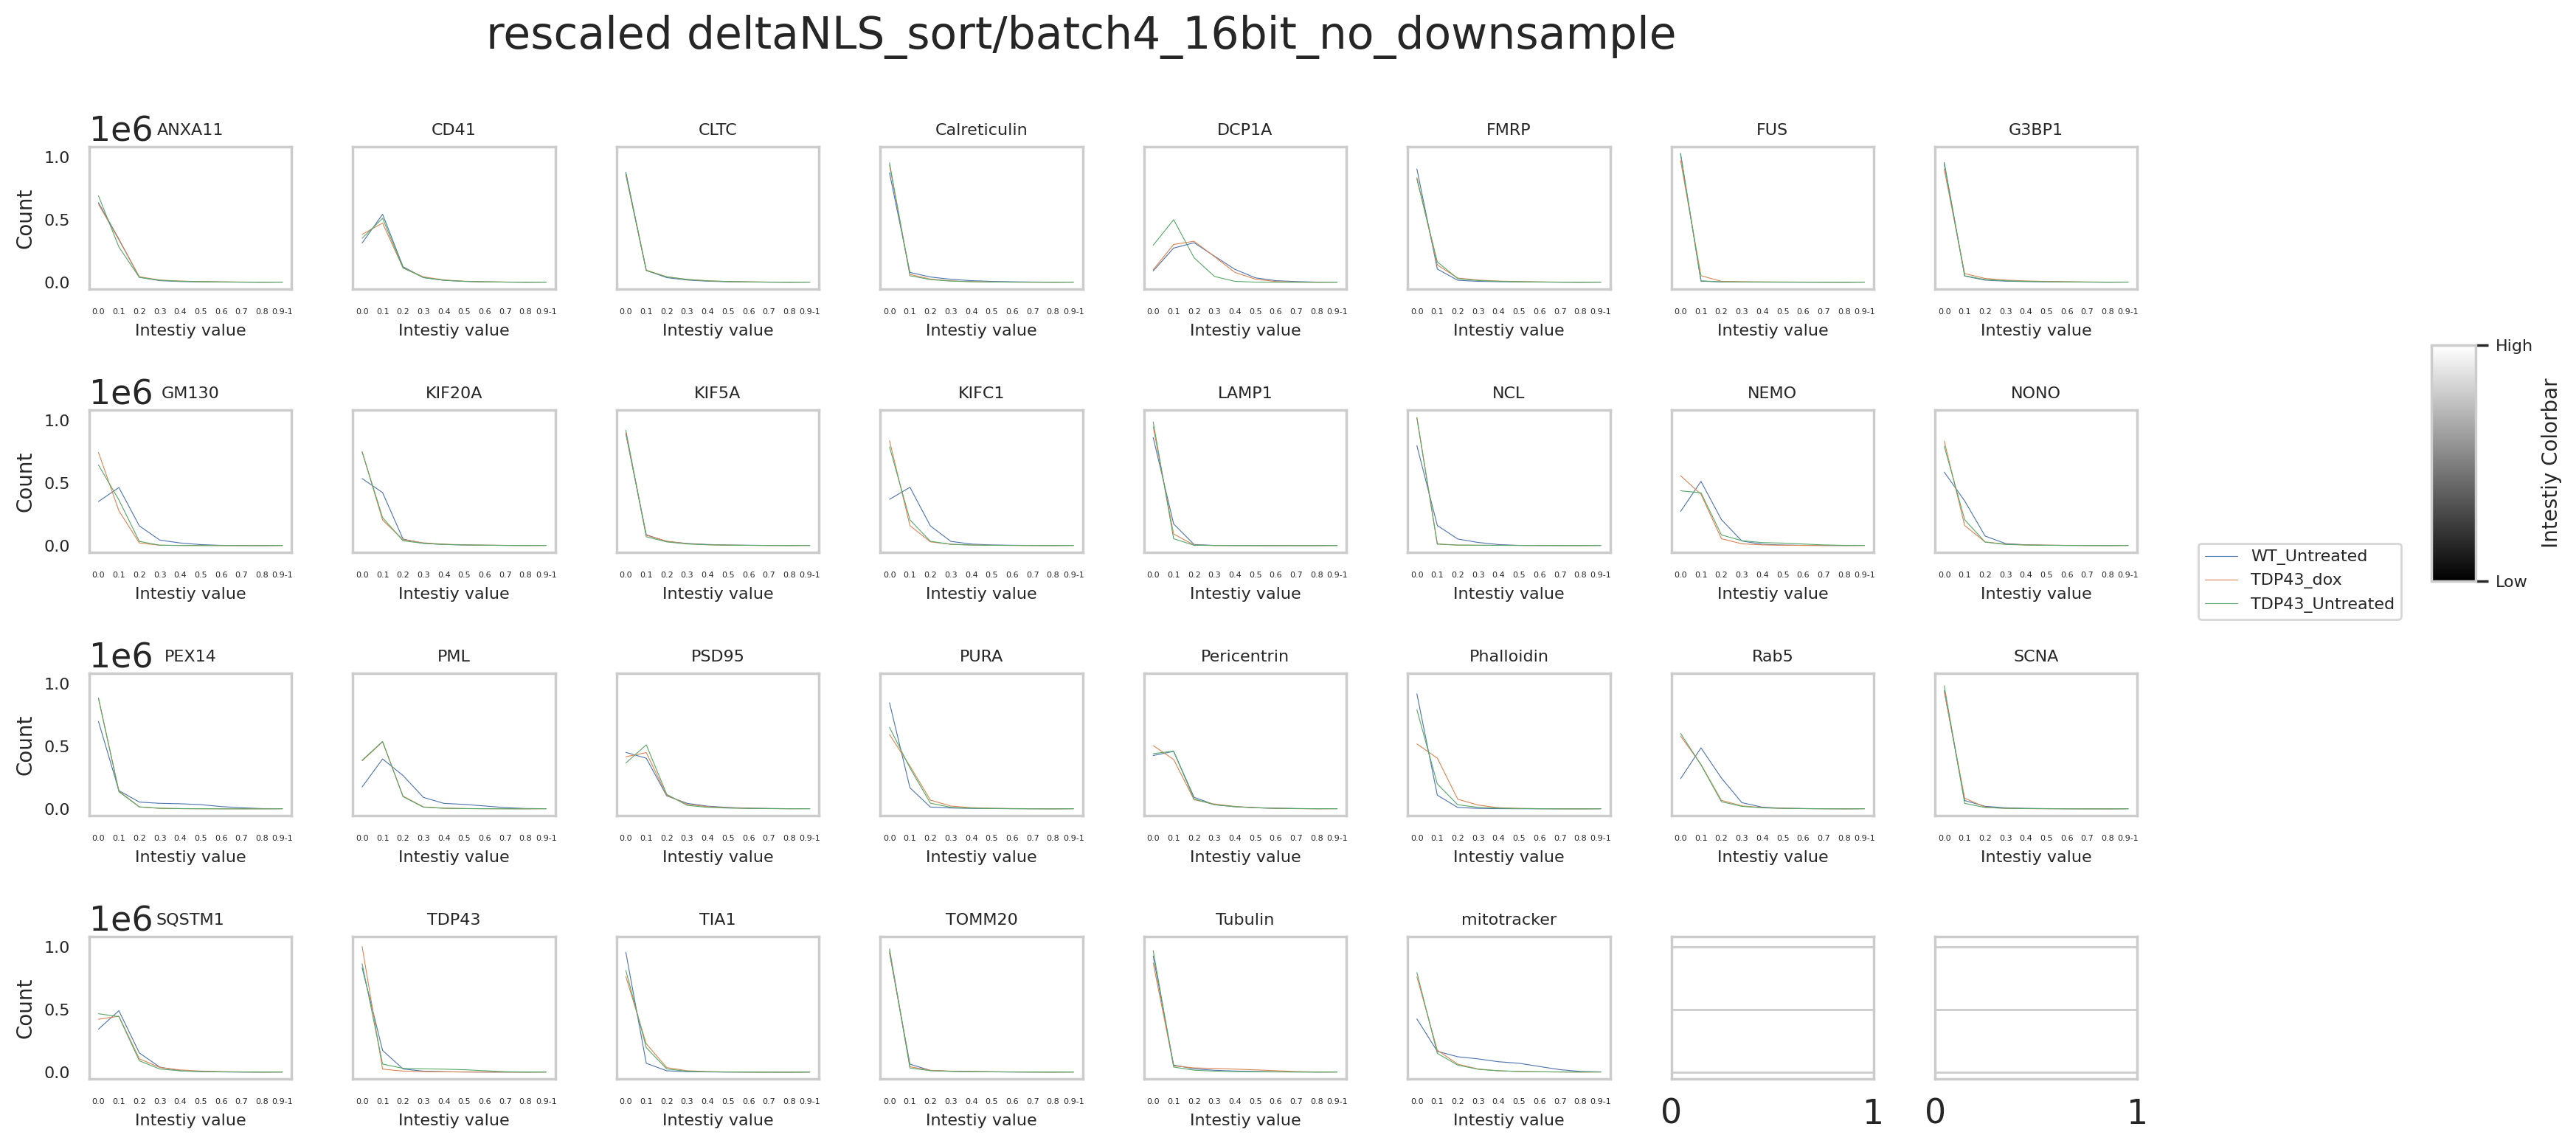

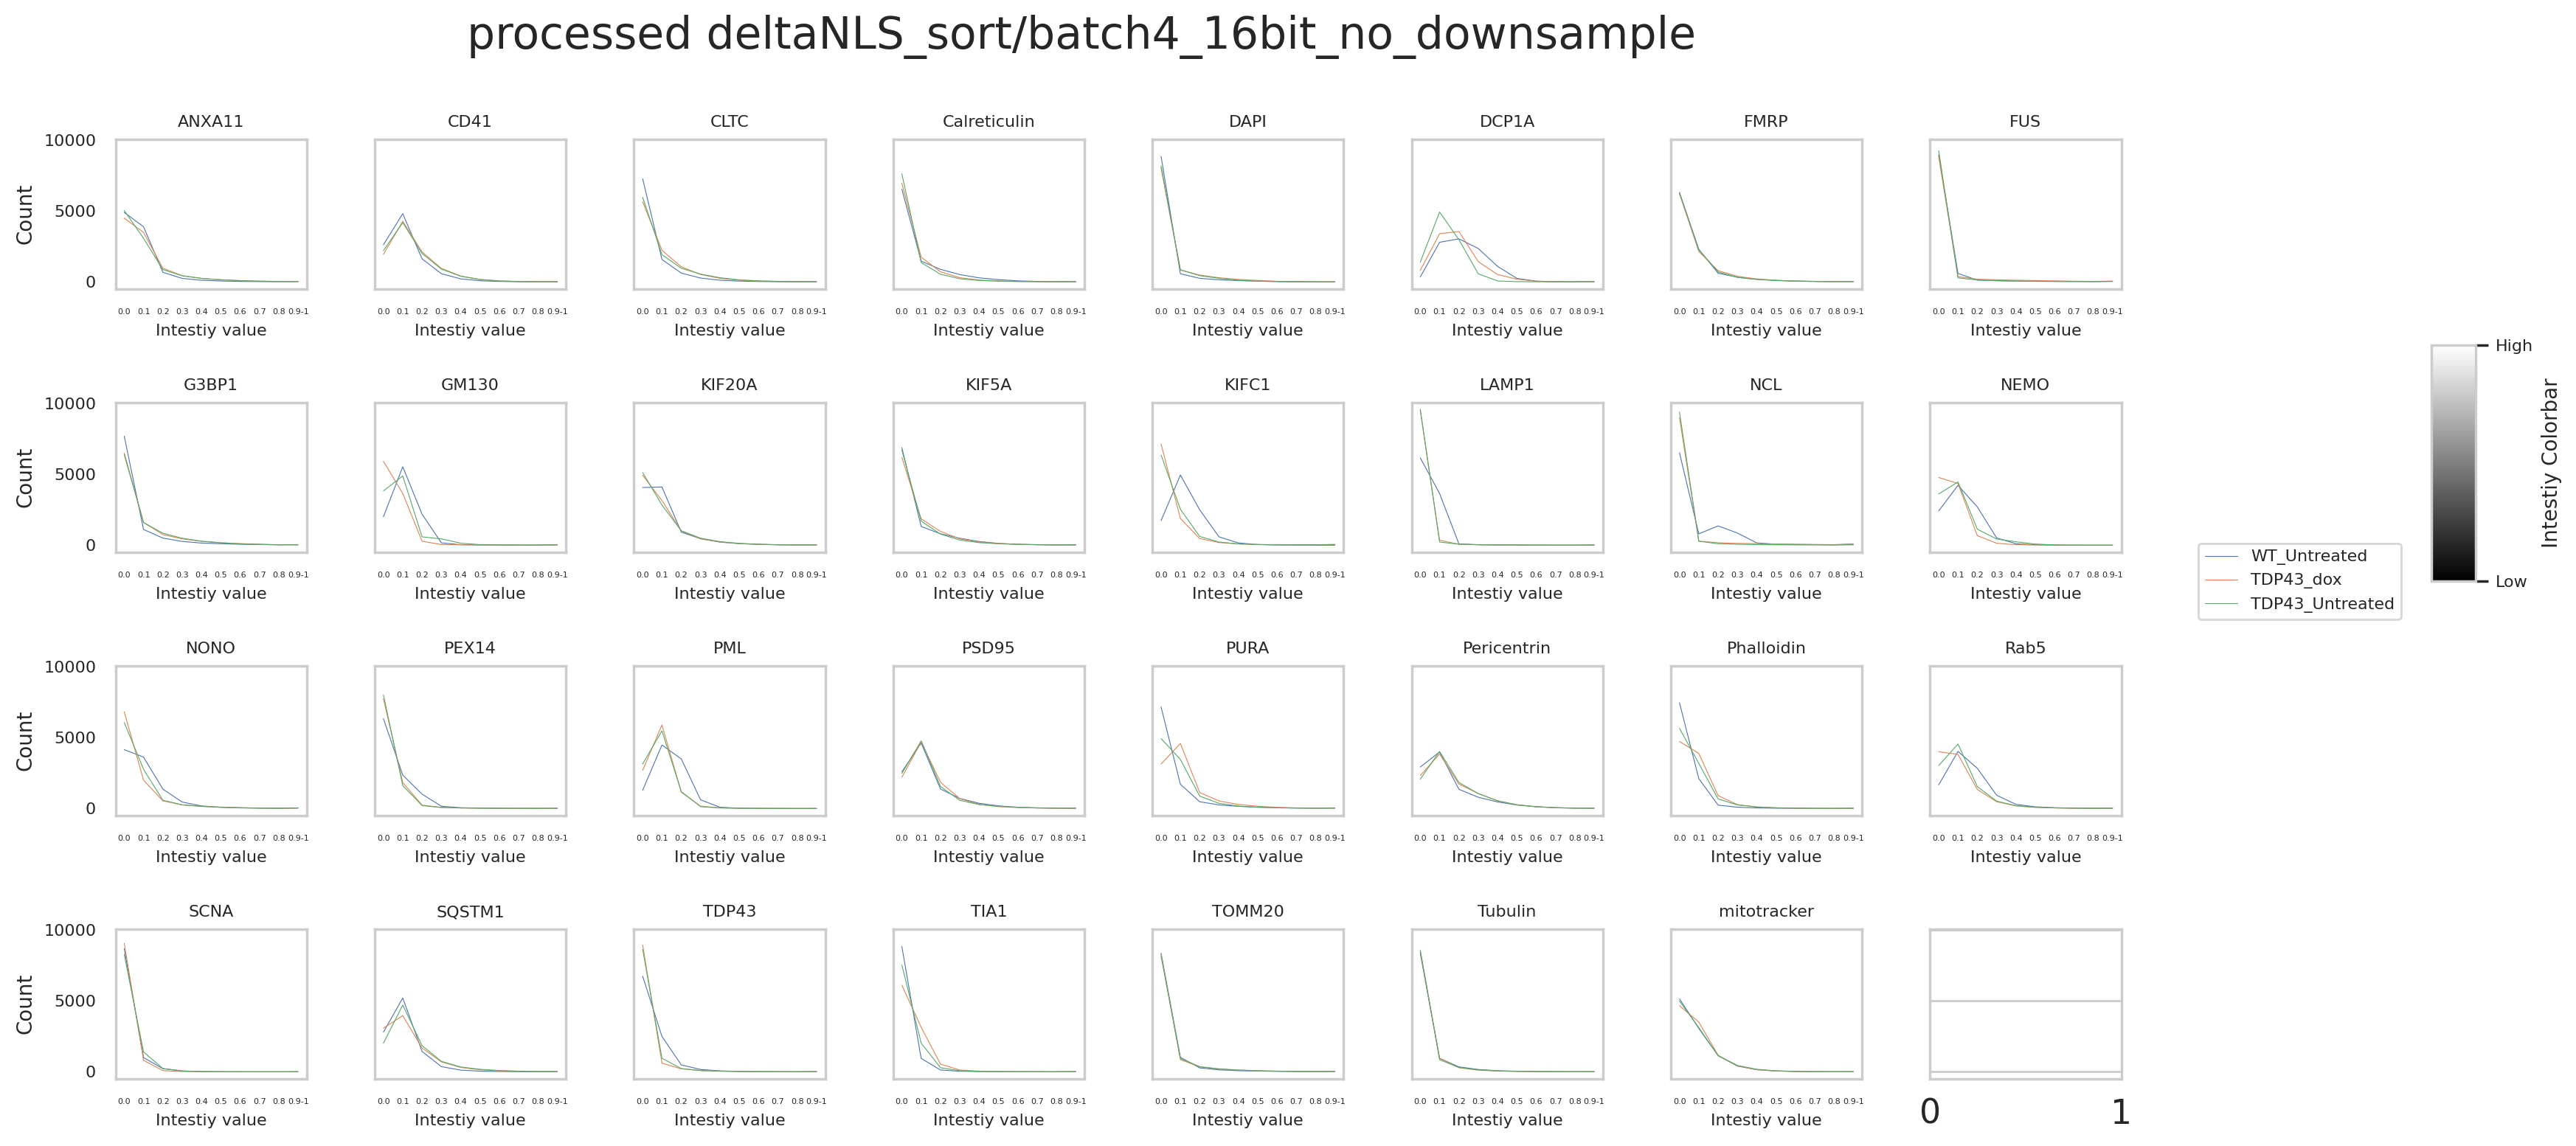

batch5_16bit_no_downsample


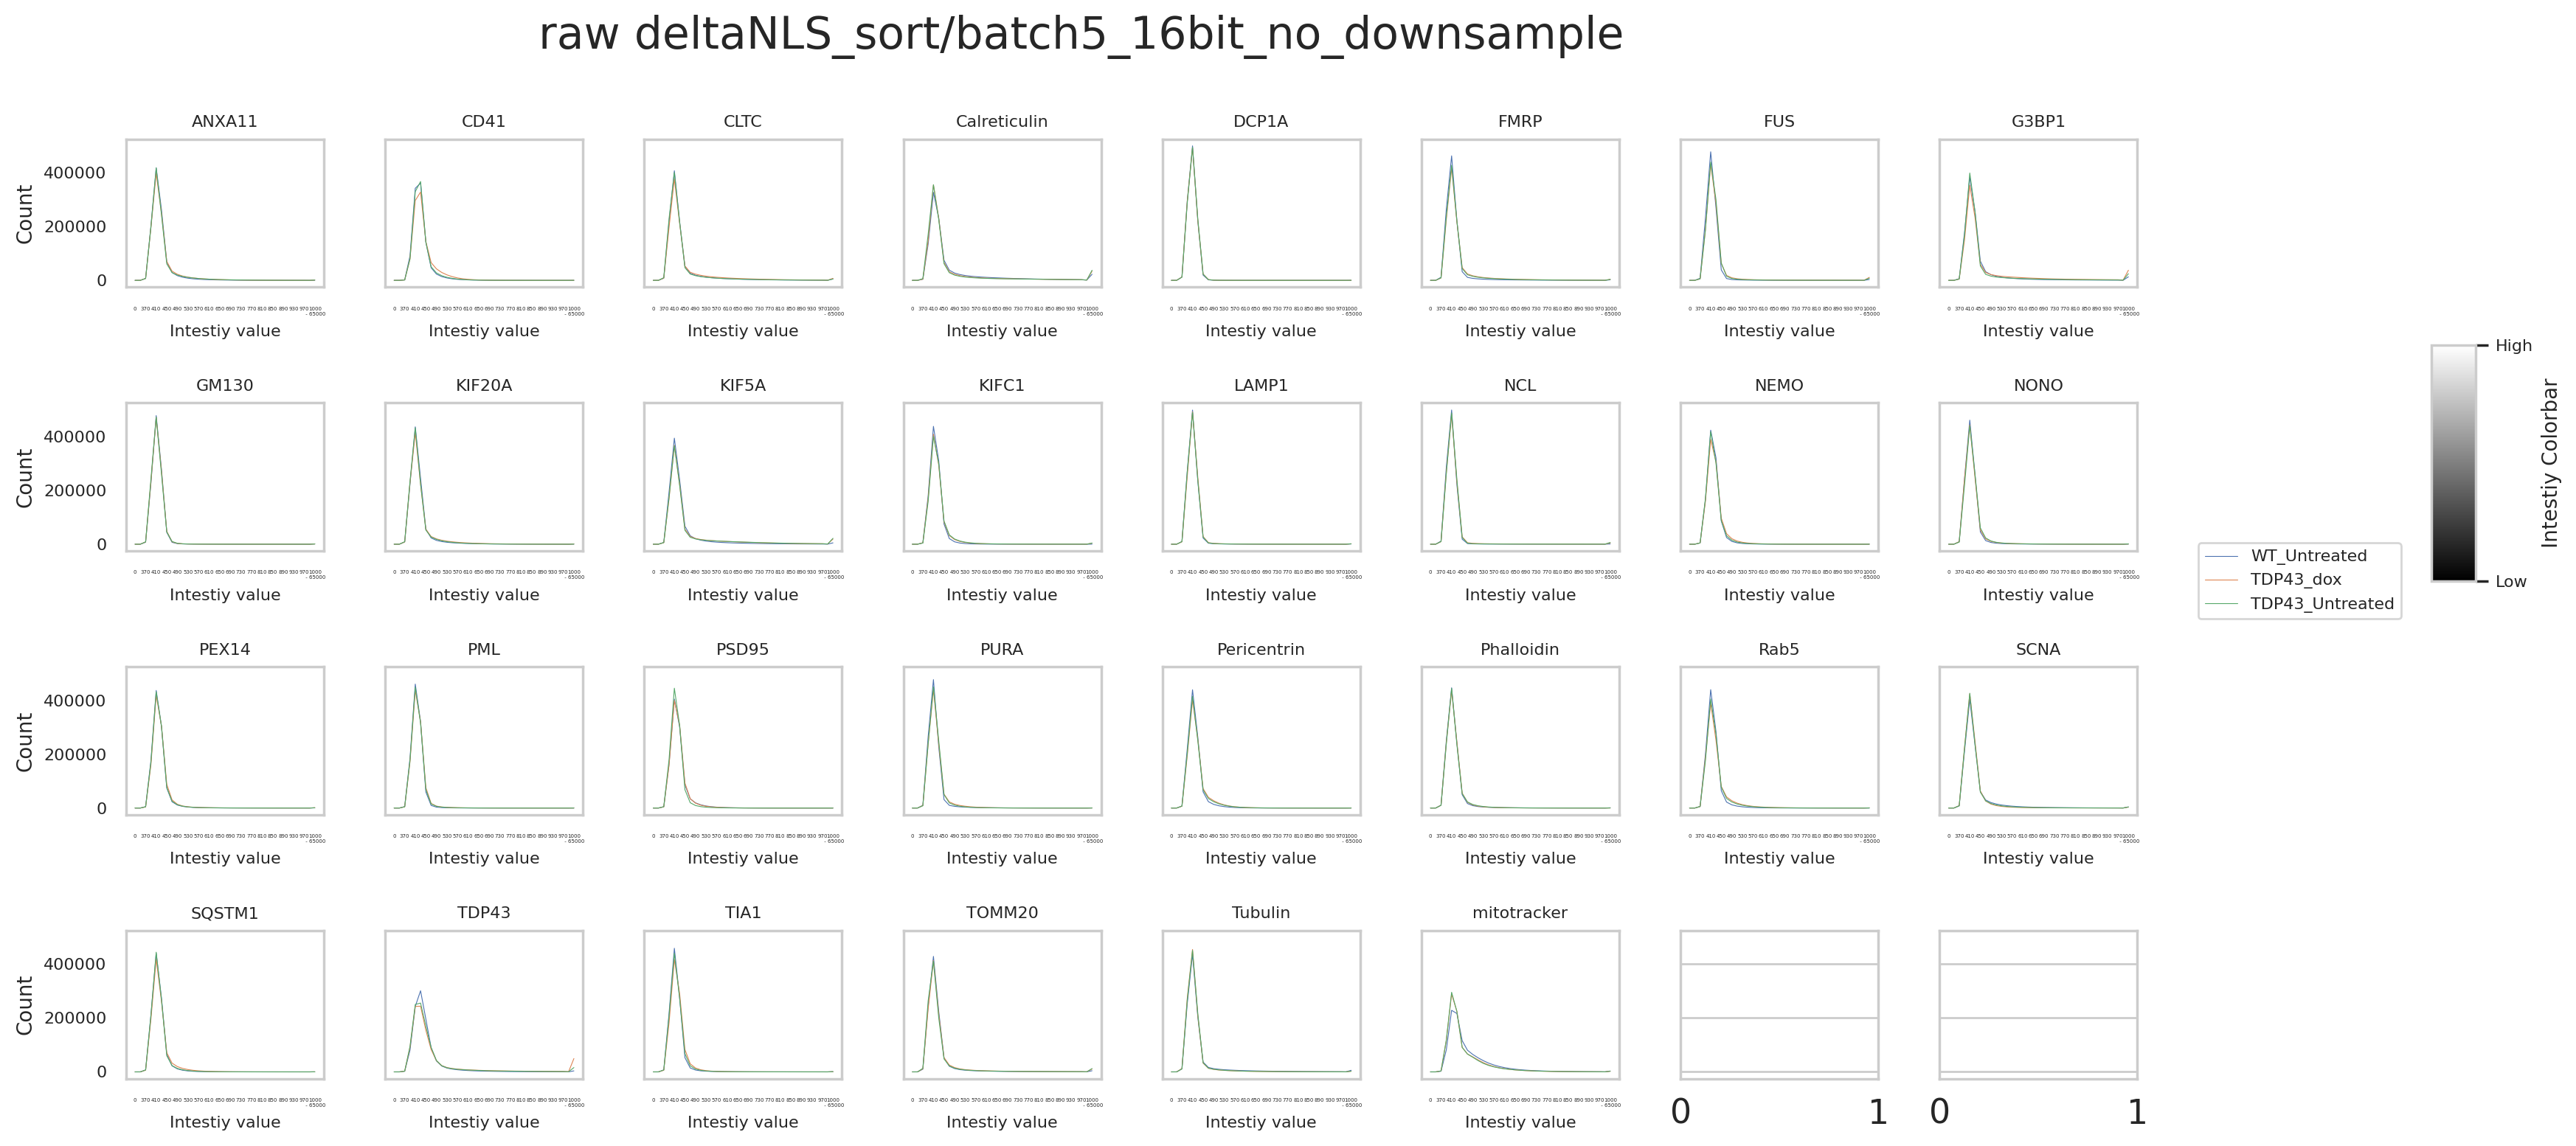

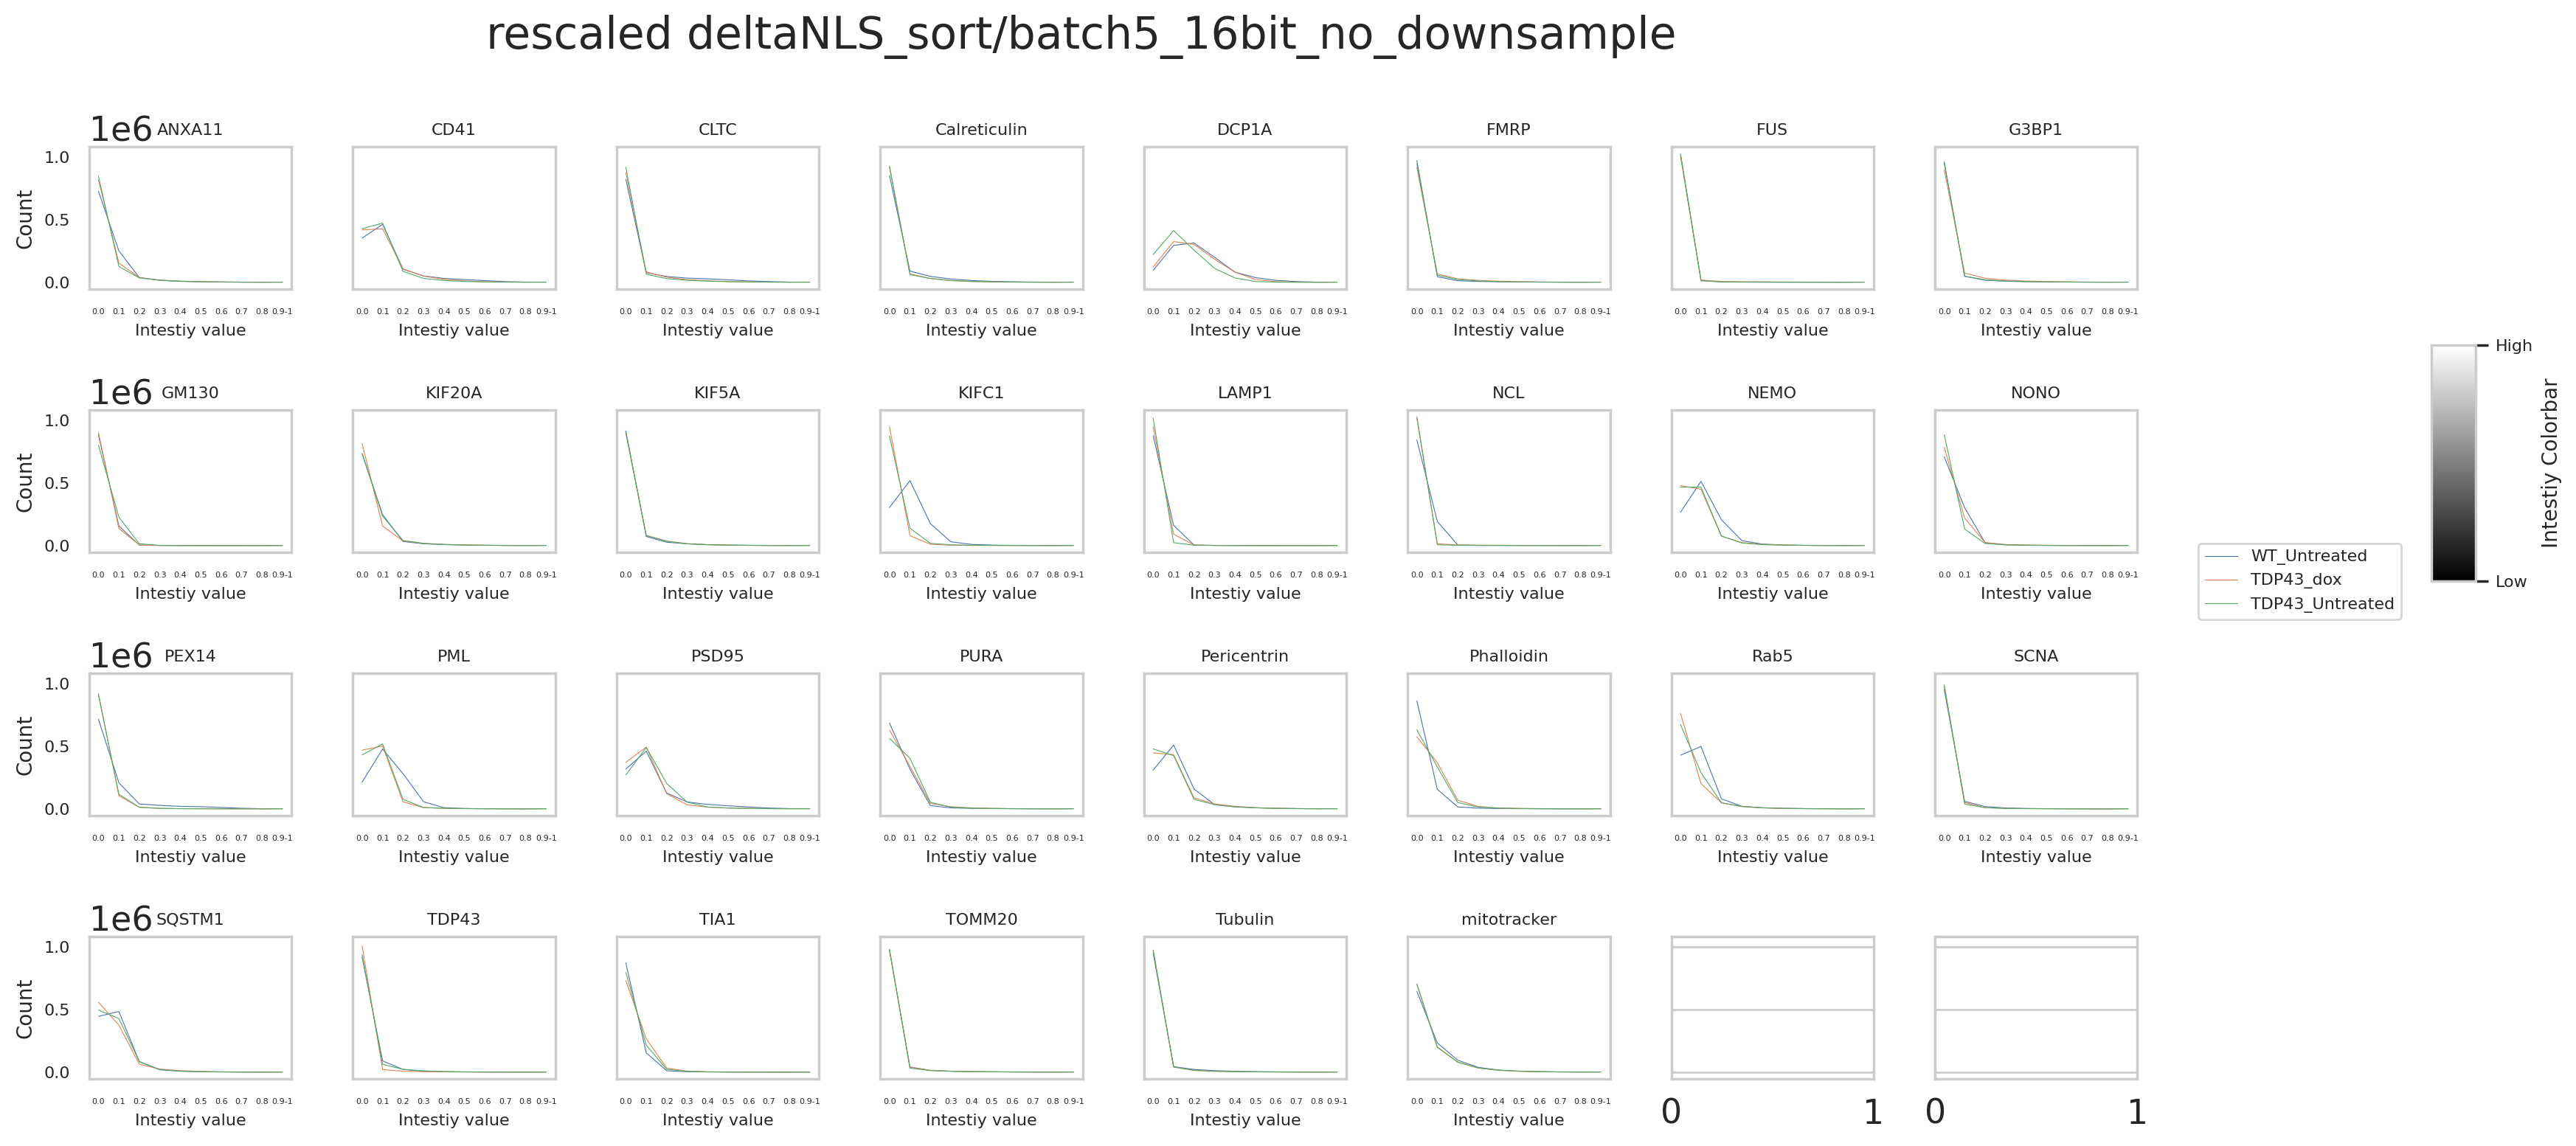

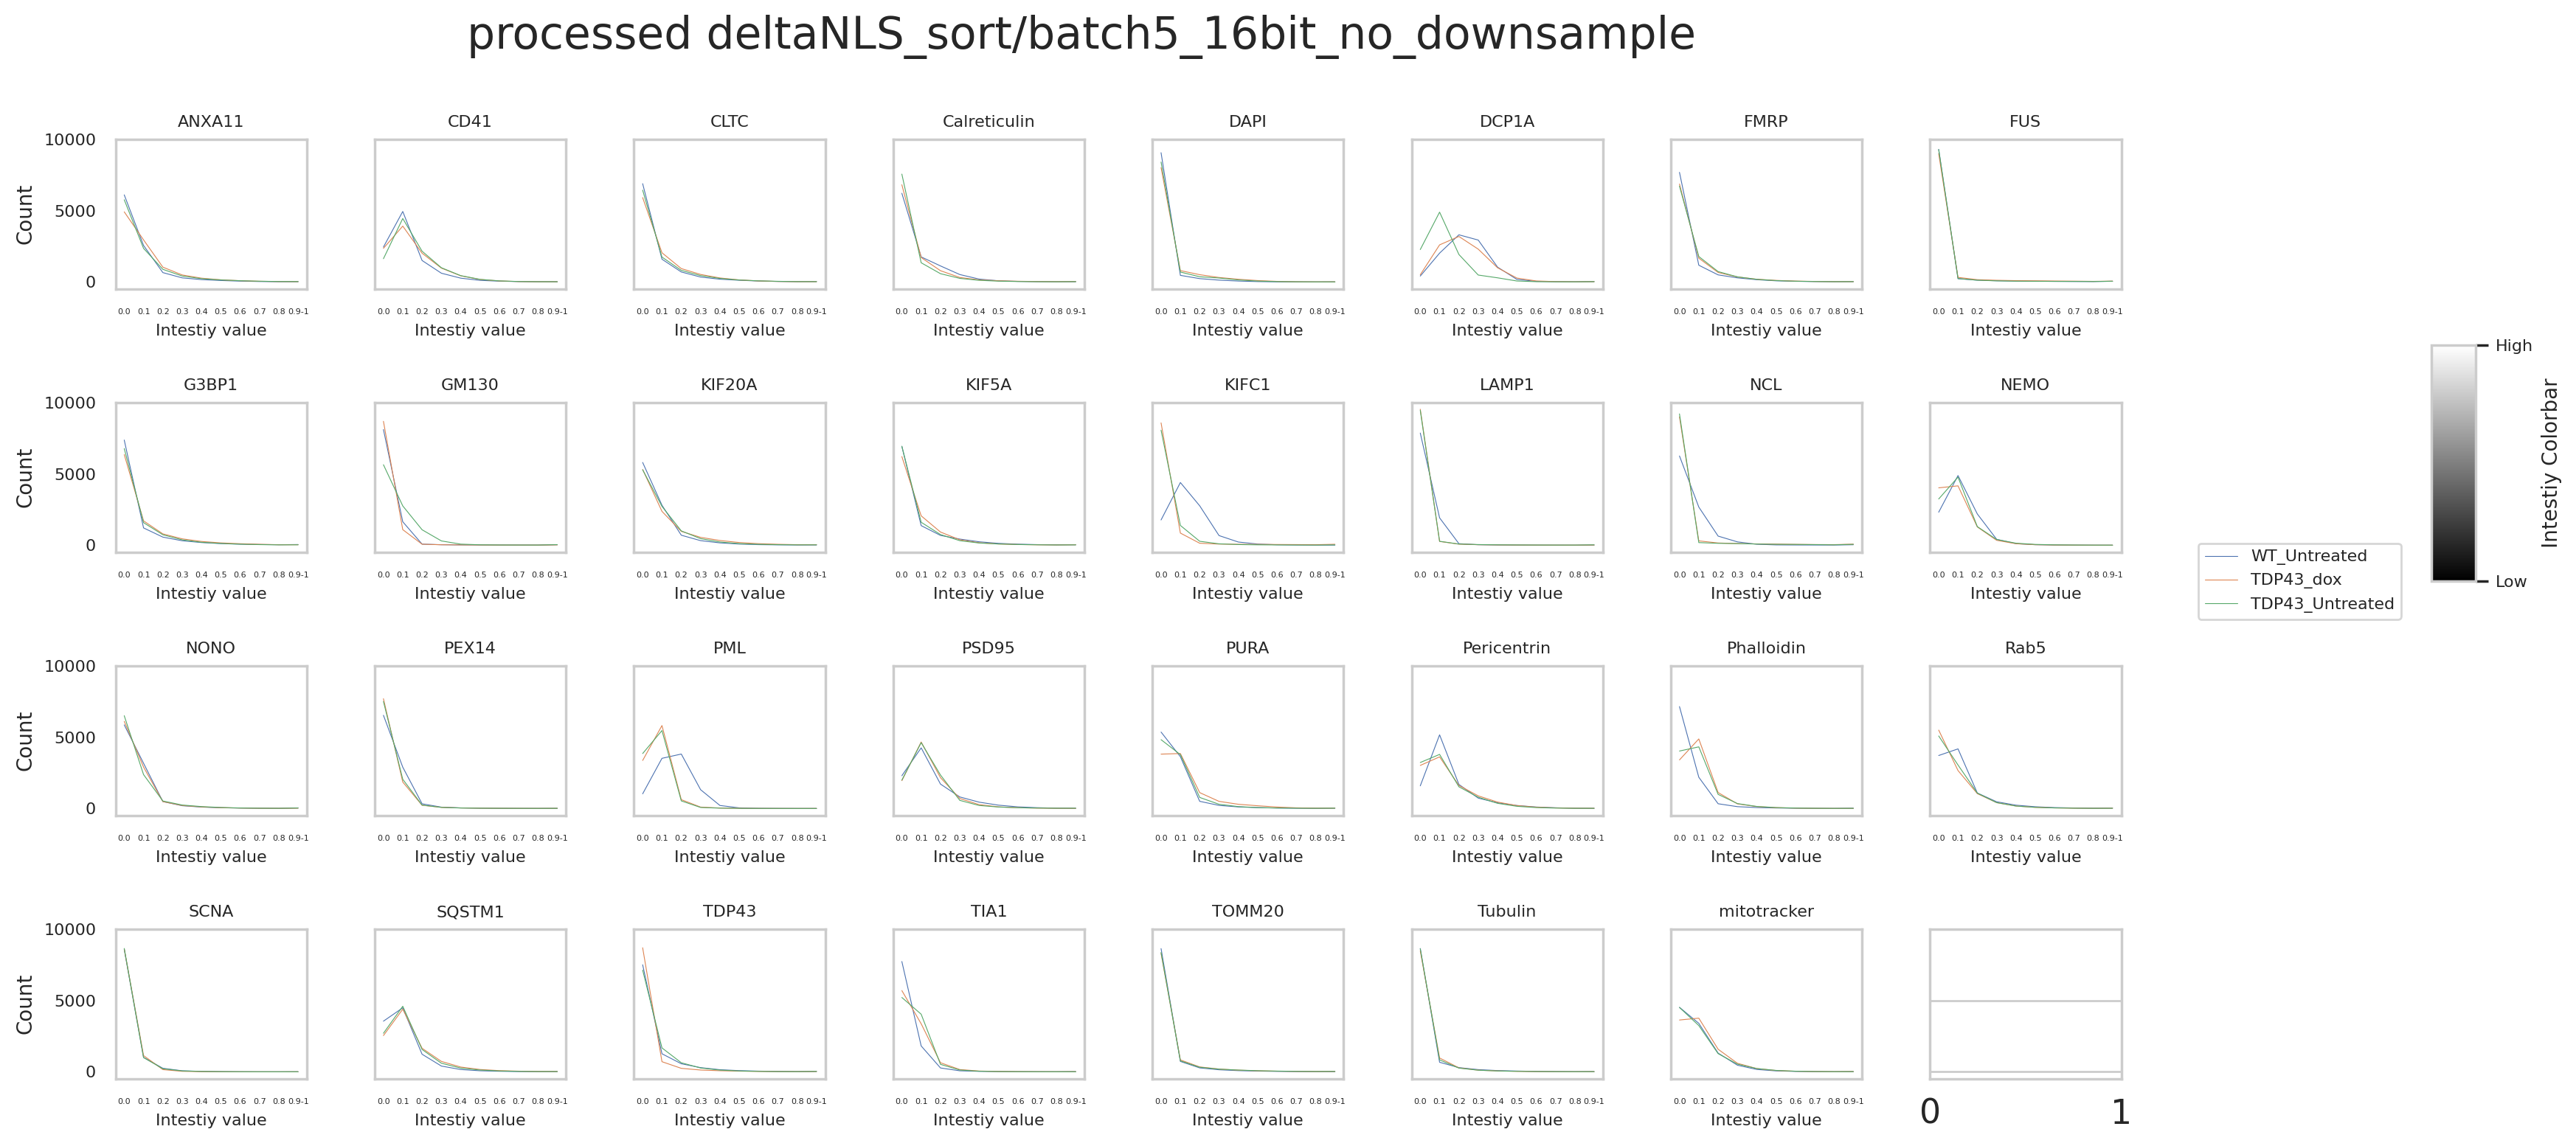

In [18]:
for batch in batches:
    print(batch)
    raw_df = run_calc_hist_new(f'deltaNLS_sort/{batch}',dnls_cell_lines_for_disp,
                      dnls_markers,hist_sample=10,ncols=8, nrows=4,
                               cond_count=2, rep_count=len(reps),
                             sample_size_per_markers=200)
    print("="*30)
    

In [19]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/no_ds/cell_count_stats_analysis_dNLS_no_downsample.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/no_ds/cell_count_stats_analysis_dNLS_no_downsample.ipynb to html
[NbConvertApp] Writing 9791855 bytes to src/preprocessing/notebooks/no_ds/cell_count_stats_analysis_dNLS_no_downsample.html


0